In [1]:
import scanpy as sc
import os
import anndata as ad
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.ticker as mticker
import matplotlib.pyplot as plt
import gseapy as gp

sc.settings.verbosity=0 # verbosity: errors (0), warnings (1), info (2), hints (3)
sc.settings.n_jobs=4
sc.settings.set_figure_params(dpi=100,dpi_save=300, facecolor="white", frameon=False, figsize=(4,4))
plt.rcParams['pdf.fonttype'] = 42
plt.rcParams['ps.fonttype'] = 42

%matplotlib inline




In [2]:

sc.settings.figdir = "sfig5"


In [ ]:
import matplotlib
matplotlib.rcParams['pdf.fonttype'] = 42
matplotlib.rcParams['ps.fonttype'] = 42

# Extended Data Fig 3c-d

In [3]:
adata=sc.read_h5ad('/nfs/team298/ls34/disease_atlas/final_fb_adatas/adata_all_6150_umap5.h5ad.paga2.annotated11')
 


In [4]:
adata_lesional_uncertain = adata[adata.obs["lvl3_annotation_pred"]=="UNCERTAIN_CELLTYPE"]

In [5]:
custom_colors = {
    "F1: Superficial": "#fff4e6",
    "F1: Regenerative": "#fdb663",
    "F2: Universal": "#cfdfff",
    "F2/3: Perivascular": "#78aade",
    "F3: FRC-like": "#fdb3ac",
    "F4: DS_DPEP1+": "#d3efcd",
    "F4: TNN+COCH+": "#80ca80",
    "F4: DP_HHIP+": "#277d48",
    "F5: RAMP1+": "#9d99c8",
    "F5: NGFR+": "#7855b2",
    "F6: Inflammatory myofibroblast": "#00ffff",
    "F7: Myofibroblast": "#5599ff",
    "F8: Fascia-like myofibroblast": "#f48dbb",
    "F_Fascia": "#0000004d"
}

/tmp/ipykernel_729/858860921.py:15: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(
/tmp/ipykernel_729/858860921.py:39: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(value_counts_df['Category'], rotation=90, ha='center')  # Rotate x-ticks


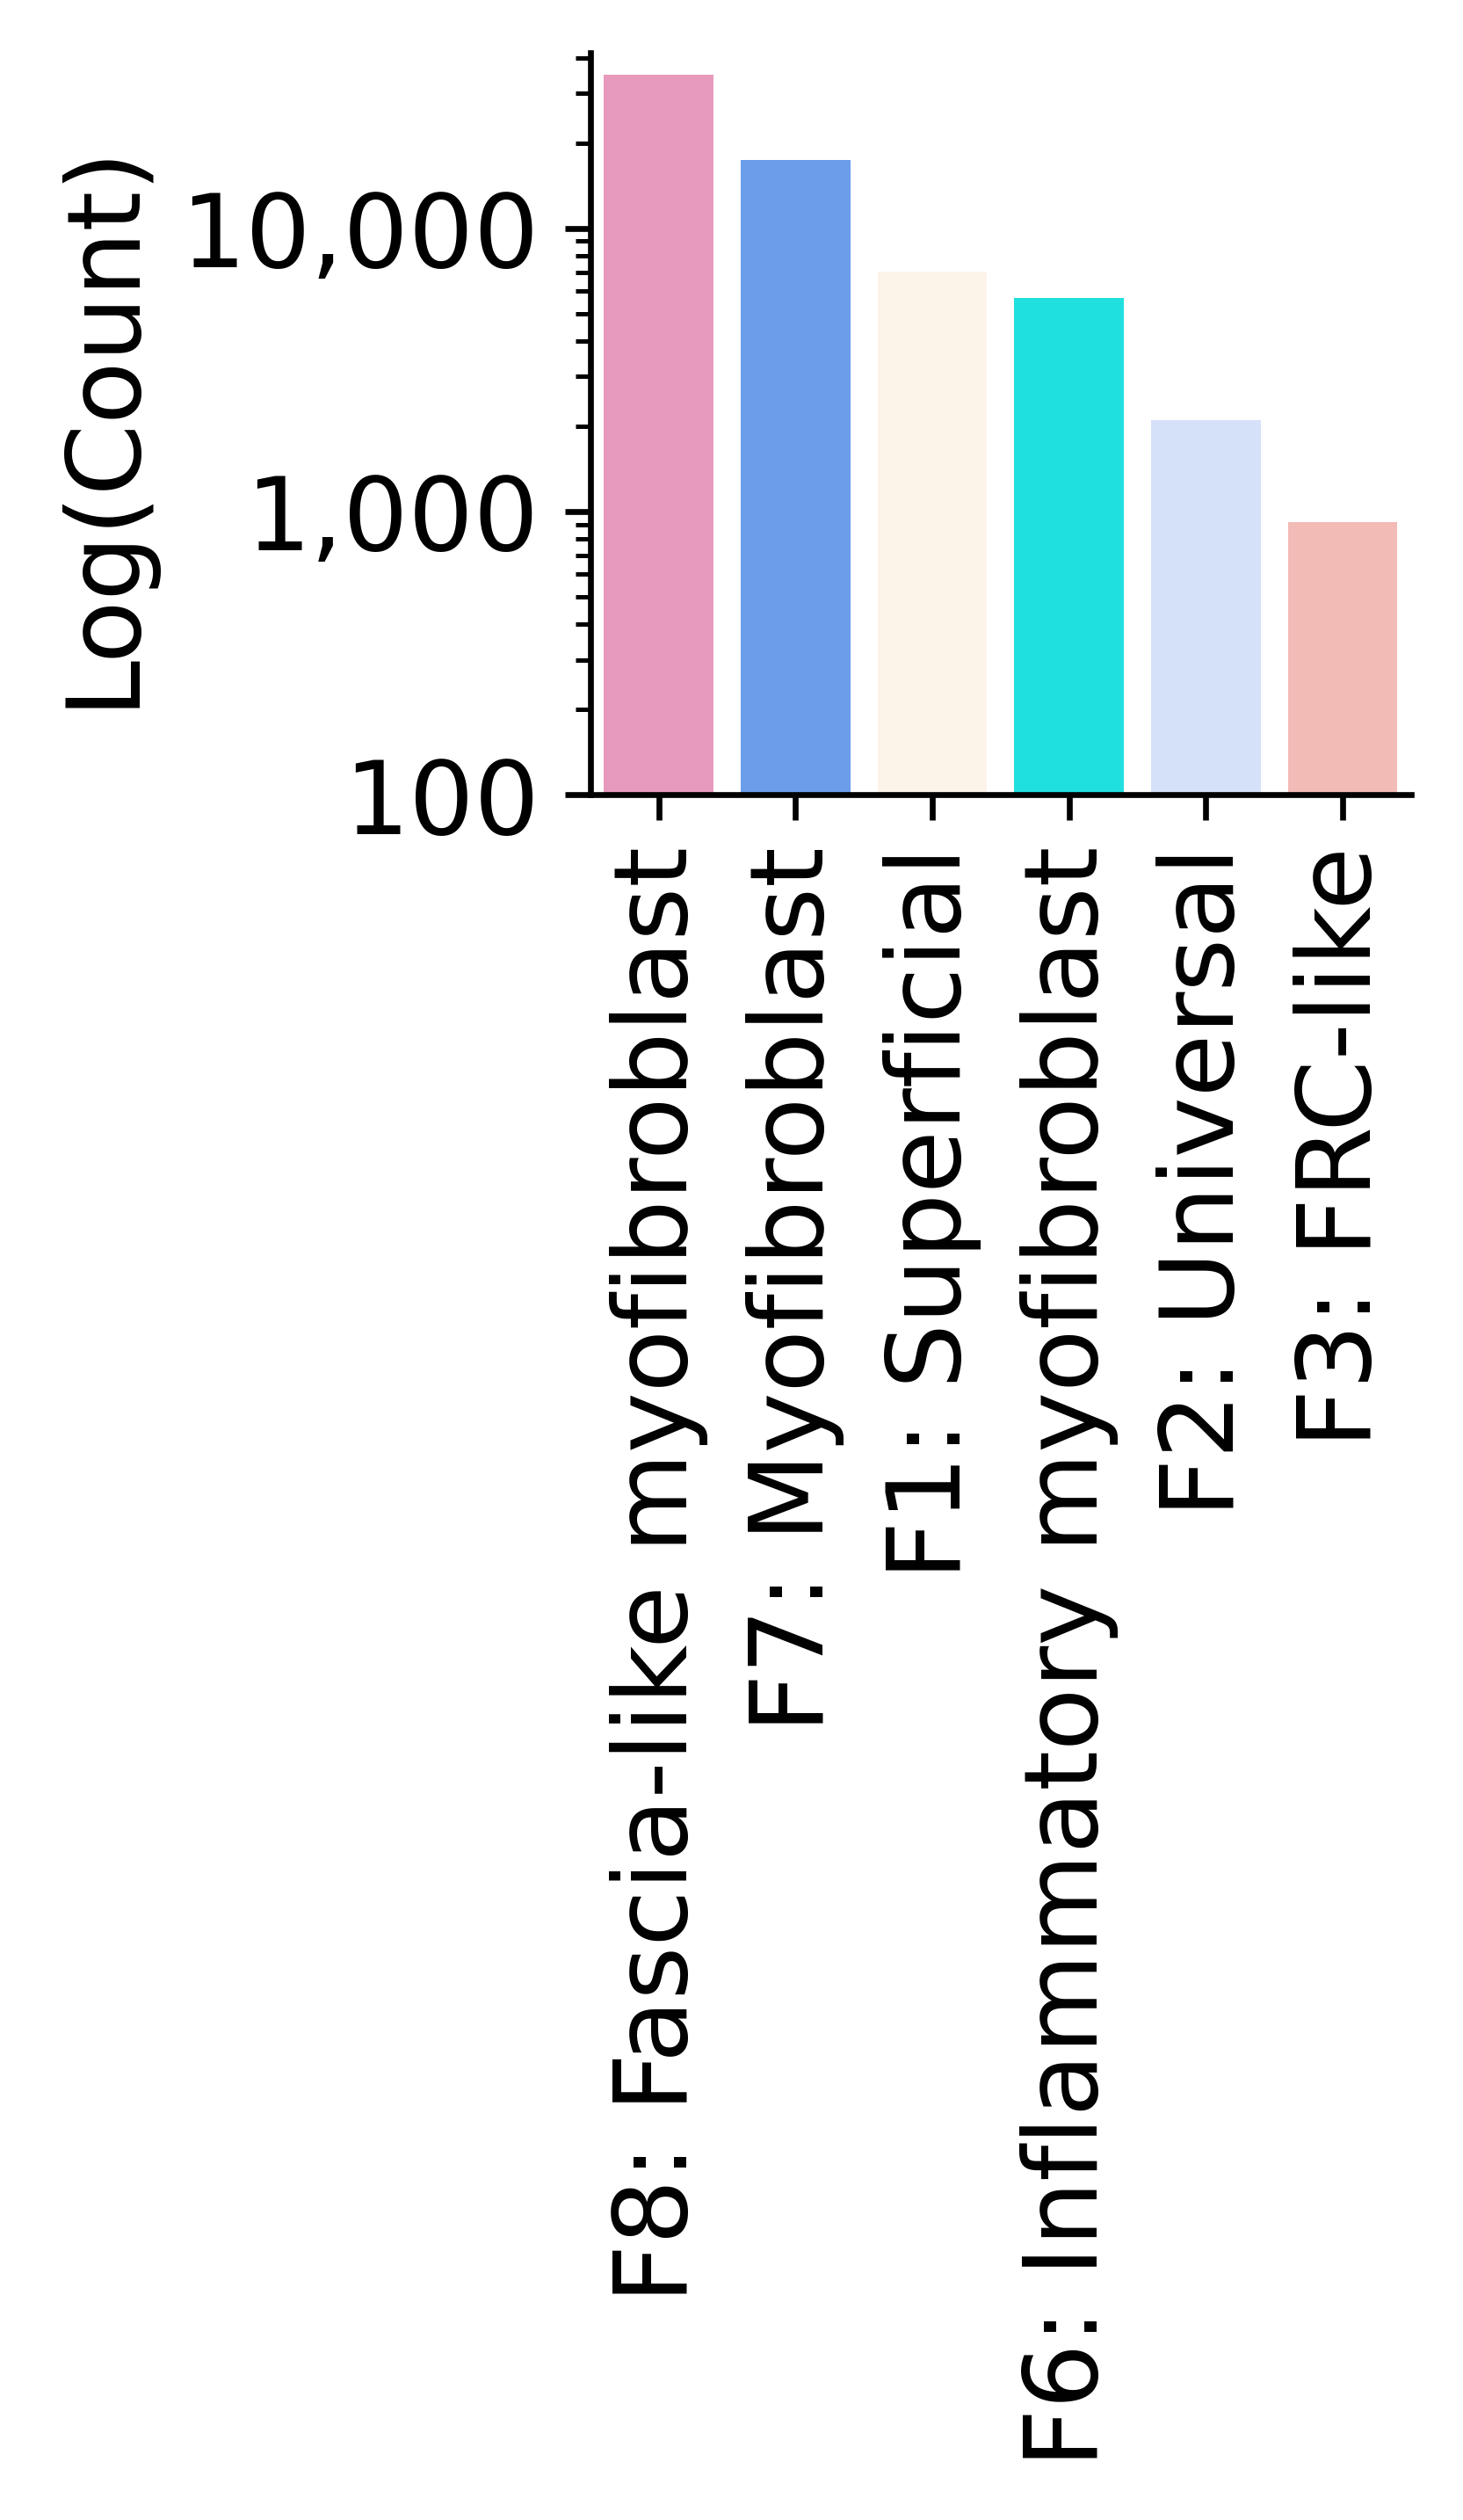

<Figure size 1200x1200 with 0 Axes>

In [6]:
value_counts = adata_lesional_uncertain.obs["test13"].value_counts()

value_counts_df = value_counts.reset_index()
value_counts_df.columns = ['Category', 'Count']
value_counts_df = value_counts_df.sort_values(by='Count', ascending=False)


value_counts_df = value_counts_df.iloc[:6]


value_counts_df['Color'] = value_counts_df['Category'].map(custom_colors)

# Create the bar plot
fig, ax = plt.subplots(figsize=(3, 5))   
sns.barplot(
    data=value_counts_df,
    x='Category',
    y='Count',
    palette=value_counts_df['Color'].tolist(),
    order=value_counts_df['Category'] 
)


ax.set_yscale('log')


ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)


ax.yaxis.set_major_formatter(mticker.FuncFormatter(lambda x, _: f"{int(x):,}"))
plt.ylim(100, None)  # Set the minimum y-axis value to 100, leaving the maximum value unchanged

 
ax.grid(False)   

ax.set_xlabel("")   
ax.set_ylabel("Log(Count)")
ax.set_xticklabels(value_counts_df['Category'], rotation=90, ha='center')  # Rotate x-ticks

plt.tight_layout()

plt.show()
plt.savefig('sfig3/fig3c_supp_uncertainpops.pdf')

In [7]:
import gc
del adata_lesional_uncertain
gc.collect()

938

In [8]:
adata_lesional = adata[adata.obs.Site_status_binary=="Lesional"]


In [9]:
import pickle
pickle_file_path = '/nfs/team298/ls34/fb_dict_lesional.pkl'

with open(pickle_file_path, 'rb') as file:
    LESIONAL_GENES_VSHORT5 = pickle.load(file)
LESIONAL_GENES_VSHORT5   
    

{'F3': ['CCL19', 'CD74', 'CH25H', 'ADAMDEC1', 'CXCL9'],
 'F1': ['COL18A1',
  'COL23A1',
  'COL13A1',
  'NKD2',
  'CRABP1',
  'TNFRSF21',
  'CXCL1'],
 'F1+F6': ['WNT5A', 'COL7A1'],
 'F6': ['CXCL8',
  'CXCL5',
  'CXCL6',
  'CXCL13',
  'IL11',
  'IL24',
  'MMP1',
  'MMP3',
  'IL7R',
  'INHBA',
  'CSF3',
  'TDO2',
  'WWC1',
  'CHI3L1',
  'CCL5',
  'CCL11',
  'FAM167A',
  'HIF1A'],
 'F6+F7': ['WNT2', 'COL10A1', 'LAMP5'],
 'F7': ['NRG1', 'OGN'],
 'F6-F8': ['ACTA2',
  'TAGLN',
  'ASPN',
  'COMP',
  'COL11A1',
  'KIF26B',
  'ZNF469',
  'RUNX2',
  'SULF1',
  'ADAM12',
  'ADAM19',
  'COL8A1',
  'LRRC15',
  'CREB3L1',
  'CTHRC1',
  'CCN4',
  'FABP5',
  'CDH2'],
 'F7+F8': ['C1QTNF3', 'CADM1', 'LRRC17', 'PIEZO2', 'SFRP4', 'KCNMA1'],
 'F8': ['ACAN', 'SCX', 'THBS4', 'ITGA10', 'FGF18', 'PRG4', 'CRTAC1']}

/home/jovyan/my-conda-envs/sko_ls/lib/python3.10/site-packages/scanpy/plotting/_matrixplot.py:143: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  values_df = self.obs_tidy.groupby(level=0).mean()


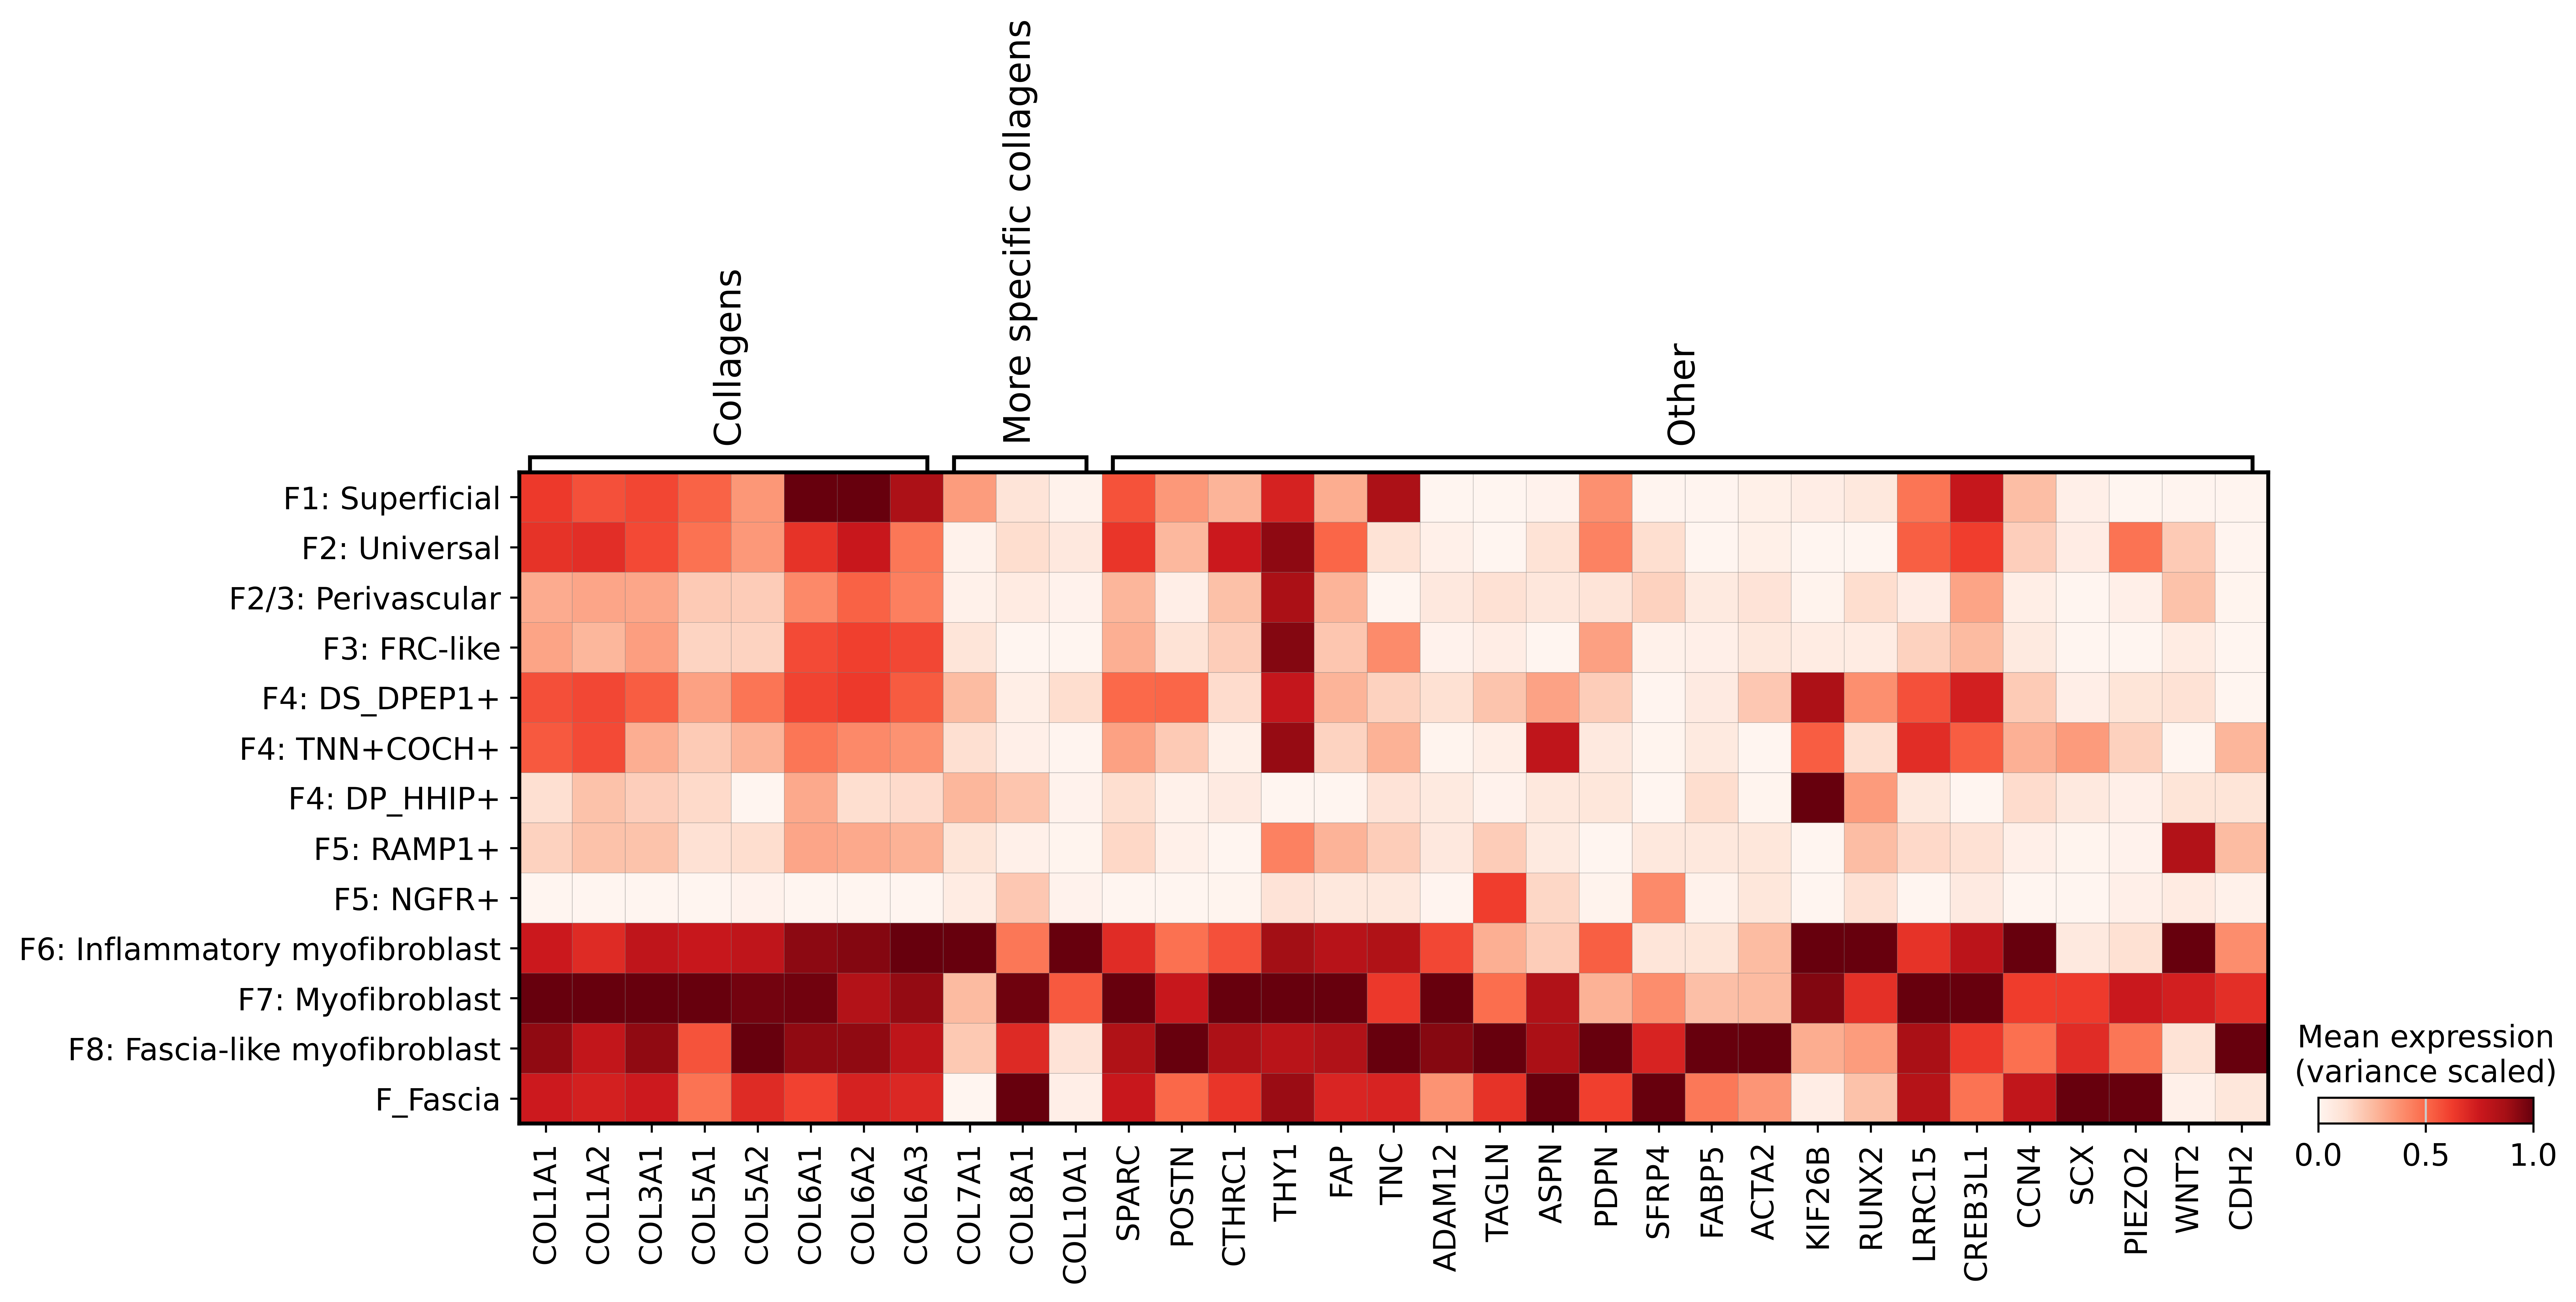

In [10]:
COLLAGENS_VHIGHLYEXPRESSED={'Collagens': [ 'COL1A1',
  'COL1A2',
  #COL2A1',
  'COL3A1' , 
 # 'COL4A1',
  #'COL4A2',
  #'COL4A3',
  #'COL4A4',
  #'COL4A5',
  #'COL4A6',
  'COL5A1',
  'COL5A2',
  #'COL5A3',
  'COL6A1',
  'COL6A2',
  'COL6A3',], "More specific collagens": ['COL7A1',
  'COL8A1', #'PDPN',  ],
                                           "COL10A1", 
                                         ],
                            
                            
#  'COL18A1
                                          "Other":[    'SPARC', 'POSTN', "CTHRC1",'THY1',"FAP", 'TNC',    "ADAM12", "TAGLN","ASPN",'PDPN', "SFRP4",  #"FABP5",  "ACTA2",# "MYH9" 

                      #   "KIF26B", # "ZNF469", # "GUCY1A2",  
                       #     "RUNX2",#  "ADAMTS14",
                                      #"SULF1",
                              # "COL8A1", "LRRC15","CREB3L1",#"CTHRC1", ],
                                            
                             "FABP5",  "ACTA2",# "MYH9" 
                         "KIF26B", # "ZNF469", # "GUCY1A2",  
                            "RUNX2",#  "ADAMTS14",
                                      #"SULF1",
                              "LRRC15","CREB3L1",#"CTHRC1",
                                               "CCN4", 'SCX',"PIEZO2",
 
         "WNT2", 
                      "CDH2",  
              ],
 
                }
    
sc.pl.matrixplot(
    adata_lesional,
COLLAGENS_VHIGHLYEXPRESSED  ,  groupby="test13",  cmap="Reds",colorbar_title='Mean expression\n(variance scaled)', 
    standard_scale="var",
    #dendrogram=True,
     save="3e_myofb_signature.pdf"
) 
 

In [11]:
del adata
del adata_lesional
gc.collect()

23798

In [12]:
# stop

In [15]:
# # original
# #adata_lesional=sc.read_h5ad('/nfs/team298/ls34/fibroblast_atlas/fig1/model_scpoli_allfibroblasts_6150_2/adata_fbs_with_metadata.h5ad.lesionalonly')
# # new 
# adata_lesional=sc.read_h5ad('/nfs/team298/ls34/disease_atlas/final_fb_adatas/adata_all_6150_umap5.h5ad.paga2.annotated9.lesionalonly')
adata_lesional=sc.read_h5ad('/nfs/team298/ls34/disease_atlas/final_fb_adatas/adata_all_6150_umap5.h5ad.paga2.annotated11.lesionalonly')
adata_lesional.obs["lvl3_annotation_pred"].value_counts()

lvl3_annotation_pred
UNCERTAIN_CELLTYPE           69589
F1: Secretory                28818
F3: CCL19                    26089
F4: DPEP1                    22263
F2: Bridge                   17588
F2: Universal (reticular)    13591
F5: SFRP4+                    4026
F5: RAMP1+                    3872
F4: TNN+COCH+                 2543
F_fascia                      1454
F4: DP_HHIP+                   923
Name: count, dtype: int64

In [16]:
# Define the path to your pickle file
pickle_file_path = '/nfs/team298/ls34/fb_dict.pkl'
import pickle
# Open the pickle file and load the dictionary
with open(pickle_file_path, 'rb') as file:
    reynolds_short_final = pickle.load(file)    
# sc.pl.matrixplot(
#     adata_lesional,
#     reynolds_short_final,cmap="Reds",
#     groupby="test13",#vmax=1.2,
#     standard_scale="var", colorbar_title='Mean expression\n(variance scaled)',
#     dendrogram=False,
#      #save="fig3SUPP_matrixplothealthy.png"
# )         
sc.pl.dotplot(
    adata_lesional,
    reynolds_short_final,cmap="Reds",
    groupby="test13",#vmax=1.2,
    standard_scale="var", colorbar_title='Mean expression\n(variance scaled)',
    dendrogram=False,
    save="3a_healthymarkers_in_lesional.pdf"
)         

/home/jovyan/my-conda-envs/sko_ls/lib/python3.10/site-packages/scanpy/plotting/_dotplot.py:168: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  obs_bool.groupby(level=0).sum() / obs_bool.groupby(level=0).count()
/home/jovyan/my-conda-envs/sko_ls/lib/python3.10/site-packages/scanpy/plotting/_dotplot.py:178: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  dot_color_df = self.obs_tidy.groupby(level=0).mean()
/home/jovyan/my-conda-envs/sko_ls/lib/python3.10/site-packages/scanpy/plotting/_dotplot.py:747: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap', 'norm' will be ignored
  dot_ax.scatter(

In [17]:
# sc.pl.dotplot(
#     adata_lesional,
#     reynolds_short_final,
#     groupby="test13",
#     vmax=1.0, standard_scale="var",
#     colorbar_title='Mean expression\n(variance scaled)', 
#     dendrogram=False, dot_max=0.8,
# )

# gsea

In [18]:
adata=adata_lesional
adata.obs['corefb_names2']=adata.obs['test13']


In [19]:
sc.tl.rank_genes_groups(adata, 'corefb_names2', method='t-test', key_added="rank_genes_groups");
df2 = pd.DataFrame(adata.uns['rank_genes_groups']['names'])
df2.head(1)

F1: Superficial F2: Universal F2/3: Perivascular F3: FRC-like F4: DS_DPEP1+  \
0          APCDD1           DCN                CFD         APOE         RPS4X   

  F4: TNN+COCH+ F4: DP_HHIP+ F5: RAMP1+ F5: NGFR+  \
0          COCH        INHBA       APOD      APOD   

  F6: Inflammatory myofibroblast F7: Myofibroblast  \
0                          INHBA            COL1A1   

  F8: Fascia-like myofibroblast F_Fascia  
0                         POSTN     COMP

In [20]:



result = adata.uns['rank_genes_groups']
result
groups = list(df2.columns)
marker_genes = pd.DataFrame({group: result['names'][group] for group in groups})
marker_genes
#groups = ['F1: Superficial_Lesional',
# 'F1: Superficial_Nonlesional',]
groups = [x for x in groups if any(x.startswith(prefix) for prefix in ["F6", "F7", "F8", "F1", "F3"])]
groups
gsea_results = []

for cluster in marker_genes.columns:
    gene_list = marker_genes[cluster].tolist()
    enr = gp.enrichr(gene_list=gene_list[:500],
                     gene_sets= 'GO_Biological_Process_2023',  # You can choose other gene sets here
                     outdir=None,  # Set to None to avoid creating output files
                     cutoff=0.01  # Cutoff for statistical significance
                    )
    enr.results['Cluster'] = cluster
    gsea_results.append(enr.results)

gsea_df = pd.concat(gsea_results)
gsea_df.head(5)
"""
Reactome_2019 
'KEGG_2016',
'Reactome_2019',
'GO_Biological_Process_2018''GO_Cellular_Component_2018''GO_Molecular_Function_2018'
"""

# gsea_results = []

# for cluster in marker_genes.columns:
#     gene_list = marker_genes[cluster].tolist()
#     enr = gp.enrichr(gene_list=gene_list[:6000],
#                      gene_sets=  # You can choose other gene sets here
#                      outdir=None,  # Set to None to avoid creating output files
#                      cutoff=0.05  # Cutoff for statistical significance
#                     )
#     enr.results['Cluster'] = cluster
#     gsea_results.append(enr.results)

# gsea_df = pd.concat(gsea_results)
# gsea_df
# """

# Reactome_2019 
# 'GO_Biological_Process_2018''GO_Cellular_Component_2018''GO_Molecular_Function_2018'
# """


"\nReactome_2019 \n'KEGG_2016',\n'Reactome_2019',\n'GO_Biological_Process_2018''GO_Cellular_Component_2018''GO_Molecular_Function_2018'\n"

In [21]:

gsea_df = gsea_df[gsea_df["Cluster"].isin(groups)]
gsea_df['Cluster'].value_counts()
color_palettes = {
  'F1: Superficial' :  '#ffffe5',  # Light Salmon
   'F1: Superficial_Lesional': '#fece65',  # Dark Orange
    'F2: Universal': '#d1e2f2',  # Dodger Blue
    'F2/3: Perivascular': '#7fb8da',  # Deep Sky Blue
    'F3: FRC-like':  '#fee5d8',  # Tomato Red

    'F4: DS_DPEP1+':  '#e7f5e5',  # Lime Green
    'F4: TNN+COCH+':  '#80ca80',  # Medium Sea Green
    'F4: DP_HHIP+': '#51a46b',  # Sea Green

    'F5: RAMP1+':  '#9e9ac8',  # Medium Purple
    'F5: NGFR+':  '#796eb2',  # Steel Blue
    'F6: Inflammatory myofibroblast': '#05ffff',  # Steel Blue
    'F6: Myofibroblast':  '#55aaff',  # Steel Blue
    'F7: Myofibroblast':  '#55aaff',  # Steel Blue

    'F7: Fascia-like myofibroblast':  '#f48ebe',  # Dark Red
        'F8: Fascia-like myofibroblast':  '#f48ebe',  # Dark Red

    'F_Fascia':  '#454545',  # Gray
}


PLOTTING_VALUE = 'Combined Score' #'Adjusted P-value' #'Combined Score'


top_gsea_df = gsea_df.groupby('Cluster').apply(lambda x: x.nlargest(10, PLOTTING_VALUE)).reset_index(drop=True)


top_gsea_df = top_gsea_df.sort_values(by=['Cluster', PLOTTING_VALUE], ascending=[True, False])


cluster_colors = top_gsea_df['Cluster'].map(color_palettes)


# plt.figure(figsize=(20, 20))
# sns.barplot(x=PLOTTING_VALUE, y='Term', hue='Cluster', data=top_gsea_df, palette=color_palettes, dodge=False)
# plt.title('', fontsize=14)
# plt.xlabel(PLOTTING_VALUE, fontsize=12)
# plt.ylabel('Pathway', fontsize=12)
# plt.xticks(fontsize=10)
# plt.yticks(fontsize=10)
# plt.legend(title='Cluster', bbox_to_anchor=(1.05, 1), loc='upper left', fontsize=10, title_fontsize='13')
# plt.tight_layout()
# plt.show()










/tmp/ipykernel_729/2613978647.py:30: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  top_gsea_df = gsea_df.groupby('Cluster').apply(lambda x: x.nlargest(10, PLOTTING_VALUE)).reset_index(drop=True)


In [ ]:


plt.figure(figsize=(20, 10))
sns.barplot(x=PLOTTING_VALUE, y='Term', hue='Cluster', data=top_gsea_df, palette=color_palettes, dodge=False)

plt.title('', fontsize=14)
plt.xlabel(PLOTTING_VALUE, fontsize=12)
plt.ylabel('Pathway', fontsize=12)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.xlim(right=2000)  

# Remove the top and right border
sns.despine(top=True, right=True)

# Remove background grid
plt.grid(False)

# Adjust legend
plt.legend(
    bbox_to_anchor=(1.05, 1), loc='upper left',
    fontsize=10, title=None, frameon=False  # <- Removes title and box
)

plt.tight_layout()

# Save as "sfig5/gsea_disease.pdf"
plt.savefig("sfig5/3f_gsea_disease.pdf", dpi=300, bbox_inches="tight", format="pdf")

plt.show()

In [ ]:

#adata_nonlesional=sc.read_h5ad('/nfs/team298/ls34/disease_atlas/data2/adata_fbspericytesnonlesional_SCVI_3526_new_neighbor50_ANNOTATED_umap30_leiden_paga3_FINALcoreonly.h5ad_2')
    
#adata_nonlesional=sc.read_h5ad('/nfs/team298/ls34/disease_atlas/final_fb_adatas/adata_fbspericytesnonlesional_SCVI_3526_new_neighbor50_ANNOTATED_umap30_leiden_paga3_FINALcoreonly.h5ad.v2.new')


adata_nonlesional=sc.read_h5ad('/nfs/team298/ls34/disease_atlas/final_fb_adatas/adata_fbspericytesnonlesional_SCVI_3526_new_neighbor50_ANNOTATED_umap30_leiden_paga3_FINALcoreonly.h5ad.v4')
print(adata_nonlesional.shape)
adata_nonlesional=adata_nonlesional[adata_nonlesional.obs["Patient_status"]=="Healthy"]
print(adata_nonlesional.shape)



In [ ]:
# LOSE_SPECIFICTY = ['COMP', 'CTHRC1', 'ASPN', 'COL11A1', 'SFRP4' ]
# sc.pl.matrixplot(
#     adata_lesional,
# LOSE_SPECIFICTY  ,  groupby="test13", vmax=1.2,cmap="Reds",colorbar_title='Mean expression\n(log1p norm)', 
#     save="suppfig3_losespecificty1.png"
#     #standard_scale="var",
#     #dendrogram=True,
   
# ) 

# # sc.pl.matrixplot(
# #     adata_lesional,
# # COLLAGENS_BOTH2  ,  groupby="test13",cmap="Reds",colorbar_title='Mean expression\n(log1p norm)', 
# #     standard_scale="var",
# #     #dendrogram=True,
# # ) 

# #all_values = [item for sublist in LOSE_SPECIFICTY.values() for item in sublist]


# sc.pl.matrixplot(
#     adata_nonlesional,
#     LOSE_SPECIFICTY  ,  
#     groupby="corefb_names2", vmax=1.2,cmap="Reds", colorbar_title='Mean expression\n(log1p norm)', 
#         save="suppfig3_losespecificty2."

#     #standard_scale="var",
#     #dendrogram=True,
# ) 

In [ ]:
LOSE_SPECIFICTY2 = ['COMP', 'CTHRC1', 'ASPN', 'COL11A1', "INHBA", "WNT5A", "CRABP1", 'SFRP4' ]
sc.pl.matrixplot(
    adata_lesional,
LOSE_SPECIFICTY2  ,  groupby="test13", vmax=1.2,cmap="Reds",colorbar_title='Mean expression\n(log1p norm)', 
    save="suppfig3b_losespecificty1_part1.pdf"
    #standard_scale="var",
    #dendrogram=True,
   
) 

# sc.pl.matrixplot(
#     adata_lesional,
# COLLAGENS_BOTH2  ,  groupby="test13",cmap="Reds",colorbar_title='Mean expression\n(log1p norm)', 
#     standard_scale="var",
#     #dendrogram=True,
# ) 

#all_values = [item for sublist in LOSE_SPECIFICTY.values() for item in sublist]


sc.pl.matrixplot(
    adata_nonlesional,
    LOSE_SPECIFICTY2  ,  
    groupby="corefb_names2", vmax=1.2,cmap="Reds", colorbar_title='Mean expression\n(log1p norm)', 
        save="suppfig3b_losespecificty2_part2.pdf"

    #standard_scale="var",
    #dendrogram=True,
) 

In [ ]:
# COLLAGENS_VHIGHLYEXPRESSED={'Collagens': [
#  'COL1A1',
#   'COL1A2',
#   #COL2A1',
#   'COL3A1']}
# COLLAGENS_HIGHLYEXPRESSED={'Collagens': [
#  # 'COL4A1',
#   #'COL4A2',
#   #'COL4A3',
#   #'COL4A4',
#   #'COL4A5',
#   #'COL4A6',
#   'COL5A1',
#   'COL5A2',
#   #'COL5A3',
#   'COL6A1',
#   'COL6A2',
#   'COL6A3',
# #  'COL18A1',
#     'SPARC', 'POSTN', "CTHRC1",'THY1',"FAP", 'TNC',    "ADAM12", "TAGLN","ASPN",'PDPN', "SFRP4"  #"FABP5",  "ACTA2",# "MYH9" 
#                       #   "KIF26B", # "ZNF469", # "GUCY1A2",  
#                        #     "RUNX2",#  "ADAMTS14",
#                                       #"SULF1",
#                               # "COL8A1", "LRRC15","CREB3L1",#"CTHRC1", ],
#                                               ] 
#                           }
                          
# COLLAGENS_LOW_EXPRESSED={    "More specific collagens": ['COL7A1',
#   'COL8A1', #'PDPN',  
#                              "FABP5",  "ACTA2",# "MYH9" 
#                          "KIF26B", # "ZNF469", # "GUCY1A2",  
#                             "RUNX2",#  "ADAMTS14",
#                                       #"SULF1",
#                               "LRRC15","CREB3L1",#"CTHRC1",
#                                                "CCN4", 'SCX',"PIEZO2",
#   ],
                        
#                         }                         
                           
                           
                           

                                         
# OTHER_LOW = {    "Other":     [  "COL10A1", 
  
#          "WNT2", 
#                       "CDH2",  
#               ],
 
#                 }


# # sc.pl.matrixplot(
# #     adata_lesional,
# # COLLAGENS_VHIGHLYEXPRESSED  ,  groupby="test13", vmax=5,cmap="Reds",colorbar_title='Mean expression\n(log1p norm)', 
# #     #standard_scale="var",
# #     #dendrogram=True,
# #      #save="_fig3e_part1.png"
# #          save="myofb_signature_individualpart1.pdf"
# # ) 
# # all_values = [item for sublist in COLLAGENS_HIGHLYEXPRESSED.values() for item in sublist]


# # sc.pl.matrixplot(
# #     adata_lesional,
# # COLLAGENS_HIGHLYEXPRESSED  ,  groupby="test13", vmax=3.8,cmap="Reds",colorbar_title='Mean expression\n(log1p norm)', 
# #     #standard_scale="var",
# #     #dendrogram=True,
# #          save="myofb_signature_individualpart2.pdf"
# # ) 

# # sc.pl.matrixplot(
# #     adata_lesional,
# # COLLAGENS_LOW_EXPRESSED  ,  groupby="test13", vmax=1.2,cmap="Reds",colorbar_title='Mean expression\n(log1p norm)', 
# #     #standard_scale="var",
# #     #dendrogram=True,
# #          save="myofb_signature_individualpart3.pdf"
# # ) 
# # all_values = [item for sublist in COLLAGENS_HIGHLYEXPRESSED.values() for item in sublist]


 

# # sc.pl.matrixplot(
# #     adata_lesional,
# # OTHER_LOW ,  groupby="test13", vmax=0.4,cmap="Reds",colorbar_title='Mean expression\n(log1p norm)', 
# #     #standard_scale="var",
# #     #dendrogram=True,
# #          save="myofb_signature_individualpart4.pdf"
# # ) 

  

In [ ]:
# COLLAGENS_VHIGHLYEXPRESSED_LISTVERSION = [item for sublist in COLLAGENS_VHIGHLYEXPRESSED.values() for item in sublist]
# COLLAGENS_HIGHLYEXPRESSED_LISTVERSION = [item for sublist in COLLAGENS_HIGHLYEXPRESSED.values() for item in sublist]
# COLLAGENS_LOW_EXPRESSED_LISTVERSION = [item for sublist in COLLAGENS_LOW_EXPRESSED.values() for item in sublist]
# COLLAGENS_HIGHLYEXPRESSED_LISTVERSION = [item for sublist in COLLAGENS_HIGHLYEXPRESSED.values() for item in sublist]
# OTHER_LOW_LISTVERSION = [item for sublist in OTHER_LOW.values() for item in sublist]


# sc.pl.matrixplot(
#     adata_nonlesional,
# COLLAGENS_VHIGHLYEXPRESSED_LISTVERSION  ,  groupby="corefb_names2", vmax=5,cmap="Reds",colorbar_title='Mean expression\n(log1p norm)',
#              save="myofb_signature_individualpart1_healthy.pdf"

#     #standard_scale="var",
#     #dendrogram=True,
#      #save="_fig3e_part1.png"
# ) 


# sc.pl.matrixplot(
#     adata_nonlesional,
# COLLAGENS_HIGHLYEXPRESSED_LISTVERSION  ,  groupby="corefb_names2", vmax=3.8,cmap="Reds",colorbar_title='Mean expression\n(log1p norm)', 
#     #standard_scale="var",
#     #dendrogram=True,
#    #  save="_fig3e_part1.png"
#              save="myofb_signature_individualpart2_healthy.pdf"

# ) 

# sc.pl.matrixplot(
#     adata_nonlesional,
# COLLAGENS_LOW_EXPRESSED_LISTVERSION  ,  groupby="corefb_names2", vmax=1.2,cmap="Reds",colorbar_title='Mean expression\n(log1p norm)', 
#     #standard_scale="var",
#     #dendrogram=True,
#     # save="_fig3e_part1.png"
#              save="myofb_signature_individualpart3_healthy.pdf"

# ) 

# sc.pl.matrixplot(
#     adata_nonlesional,
# OTHER_LOW_LISTVERSION ,  groupby="corefb_names2", vmax=0.4,cmap="Reds",colorbar_title='Mean expression\n(log1p norm)', 
#     #standard_scale="var",
#     #dendrogram=True,
#     # save="_fig3e_part2.png"
#              save="myofb_signature_individualpart4_healthy.pdf"

# ) 

 


In [ ]:
# sc.pp.subsample(adata, 0.2)

# scCODA plot

 see separate notebook : extendedfig5_sccoda.ipynb

In [ ]:
STOP

In [ ]:
# degs

In [ ]:
# ADATA_OBJ = adata
# CATEGORY = "test13"

# sc.tl.rank_genes_groups(ADATA_OBJ, CATEGORY, method='t-test', key_added="rank_genes_groups");
# df2 = pd.DataFrame(ADATA_OBJ.uns['rank_genes_groups']['names'])
# for i,x in enumerate(df2.columns):
#     print(i,x)

In [ ]:
# select_population =list(df2.columns)[4] 
# print(select_population)
# genes0 = df2[select_population][:50]
# genes1 = df2[select_population][50:100]
# genes2 = df2[select_population][100:150]
# genes3 = df2[select_population][150:200]
# genes4 = df2[select_population][200:250]
# genes5 = df2[select_population][250:300]
# genes6 = df2[select_population][300:350]
# genes7 = df2[select_population][350:400]
# genes8 = df2[select_population][400:450]
# genes9 = df2[select_population][450:500]
# genes10 = df2[select_population][500:550]
# genes11 = df2[select_population][550:600]
# genes12 = df2[select_population][600:650]
# genes13 = df2[select_population][650:700]
# genes14 = df2[select_population][700:750]
# genes15 = df2[select_population][750:800]



# sc.pl.dotplot(
#     ADATA_OBJ,
#     genes4,
#     groupby=CATEGORY,
#     #standard_scale="var",
#     dendrogram=False,
# ) 
# sc.pl.dotplot(
#     ADATA_OBJ,
#     genes1,
#     groupby=CATEGORY,
#     #standard_scale="var",
#     dendrogram=False,
# ) 

# sc.pl.dotplot(
#     ADATA_OBJ,
#     genes2,
#     groupby=CATEGORY,
# #standard_scale="var",
#     dendrogram=False,
# ) 

# sc.pl.dotplot(
#     ADATA_OBJ,
#     genes3,
#     groupby=CATEGORY,
#    # standard_scale="var",
#     dendrogram=False,
# ) 



In [ ]:
sc.pl.dotplot(
    adata_f3,
    genes0,
    groupby=CATEGORY,
    #standard_scale="var",
    dendrogram=False,
) 
sc.pl.dotplot(
    adata_f3,
    genes1,
    groupby=CATEGORY,
    #standard_scale="var",
    dendrogram=False,
) 

sc.pl.dotplot(
    adata_f3,
    genes2,
    groupby=CATEGORY,
#standard_scale="var",
    dendrogram=False,
) 

sc.pl.dotplot(
    adata_f3,
    genes3,
    groupby=CATEGORY,
   # standard_scale="var",
    dendrogram=False,
) 



In [ ]:
sc.pl.dotplot(
    ADATA_OBJ,
    genes4,
    groupby=CATEGORY,
    #standard_scale="var",
    dendrogram=False,
) 
sc.pl.dotplot(
    ADATA_OBJ,
    genes5,
    groupby=CATEGORY,
    #standard_scale="var",
    dendrogram=False,
) 

sc.pl.dotplot(
    ADATA_OBJ,
    genes6,
    groupby=CATEGORY,
#standard_scale="var",
    dendrogram=False,
) 

sc.pl.dotplot(
    ADATA_OBJ,
    genes7,
    groupby=CATEGORY,
   # standard_scale="var",
    dendrogram=False,
) 



In [ ]:
sc.pl.dotplot(
    ADATA_OBJ,
    genes8,
    groupby=CATEGORY,
    #standard_scale="var",
    dendrogram=False,
) 
sc.pl.dotplot(
    ADATA_OBJ,
    genes9,
    groupby=CATEGORY,
    #standard_scale="var",
    dendrogram=False,
) 

sc.pl.dotplot(
    ADATA_OBJ,
    genes10,
    groupby=CATEGORY,
#standard_scale="var",
    dendrogram=False,
) 

sc.pl.dotplot(
    ADATA_OBJ,
    genes11,
    groupby=CATEGORY,
   # standard_scale="var",
    dendrogram=False,
) 



In [ ]:
import pickle
# Define the path to your pickle file
pickle_file_path = '/nfs/team298/ls34/fb_dict.pkl'

# Open the pickle file and load the dictionary
with open(pickle_file_path, 'rb') as file:
    reynolds_short_final = pickle.load(file)
reynolds_short_final["F3"]

In [ ]:
F3_DEGS = ["PRSS23", "CPXM1", "ADAMDEC1", "CTSA", "COL4A4", "CACNA1C", "CXCL9", ]
sc.pl.dotplot(
    ADATA_OBJ,
    F3_DEGS,
    groupby=CATEGORY,
   # standard_scale="var",
    dendrogram=False,
) 

sc.pl.dotplot(
    adata,
    F3_DEGS,
    groupby="test13",
   # standard_scale="var",
    dendrogram=False,
) 


In [ ]:
import matplotlib.pyplot as plt

# Group and normalize data
grouped_data = adata.obs.groupby(["test13", "Site_status_binary"]).size().unstack(fill_value=0)
proportions_data = grouped_data.div(grouped_data.sum(axis=1), axis=0)  # Normalize by row sums

# Plot stacked bar chart
fig, ax = plt.subplots(figsize=(10, 6))

# Create the stacked bar plot with proportions
proportions_data.plot(kind='bar', stacked=True, ax=ax, colormap='viridis')

# Customize the plot
ax.set_title("Proportions of Site_status_binary by test13")
ax.set_xlabel("test13 Groups")
ax.set_ylabel("Proportion")
ax.legend(title="Site_status_binary", bbox_to_anchor=(1.05, 1), loc='upper left')
plt.xticks(rotation=45, ha="right")
plt.tight_layout()

# Show the plot
plt.show()

In [ ]:

import numpy as np

custom_colors = {'F1: Epithelium-associated': np.array([1.        , 1.        , 0.89803922, 1.        ]),
 'F1: Regenerative': np.array([0.99607843, 0.80915033, 0.39607843, 1.        ]),
 'F2: Universal': np.array([0.81411765, 0.88392157, 0.94980392, 1.        ]),
 'F2/3: Bridge': np.array([0.47294118, 0.71163399, 0.85071895, 1.        ]),
 'F3: FRC-like': np.array([0.99692426, 0.89619377, 0.84890427, 1.        ]),
 'F4: DS_DPEP1+': np.array([0.82745098, 0.93254902, 0.80313725, 1.        ]),
 'F4: TNN+COCH+': np.array([0.50196078, 0.79058824, 0.50143791, 1.        ]),
 'F4: DP_HHIP+': np.array([0.15294118, 0.56183007, 0.28313725, 1.        ]),
 'F5: RAMP1+':np.array([0.6177624 , 0.60213764, 0.78345252, 1.        ]),
 'F5: NGFR+': np.array([0.47320261, 0.43267974, 0.69934641, 1.        ]),
 'F6: Myofibroblast inflammatory': np.array([0., 1., 1., 1.]),
 'F6: Myofibroblast': np.array([0.33333333, 0.66666667, 1.        , 1.        ]),
 'F7: Myofibroblast fascia-like': np.array([0.95686275, 0.55686275, 0.74509804, 1.0]),
 'F_Fascia': np.array([0, 0, 0, 0.3])
                               }
import matplotlib.pyplot as plt

# Group and normalize data
grouped_data = adata.obs.groupby(["Site_status_binary", "test13"]).size().unstack(fill_value=0)
proportions_data = grouped_data.div(grouped_data.sum(axis=1), axis=0)  # Normalize by row sums

# Ensure all `test13` categories are in the custom colors dictionary
categories = proportions_data.columns
colors = [custom_colors.get(cat, [0.5, 0.5, 0.5, 1.0]) for cat in categories]  # Default to gray if missing

# Plot stacked bar chart
fig, ax = plt.subplots(figsize=(10, 6))

# Create the stacked bar plot with proportions and custom colors
proportions_data.plot(kind='bar', stacked=True, ax=ax, color=colors)

# Customize the plot
ax.set_title("Proportions of test13 by Site_status_binary")
ax.set_xlabel("Site_status_binary Groups")
ax.set_ylabel("Proportion")
ax.legend(title="test13", bbox_to_anchor=(1.05, 1), loc='upper left')
plt.xticks(rotation=45, ha="right")
plt.tight_layout()

# Show the plot
plt.show()

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

# Convert NumPy arrays in custom_colors to tuples (ensures compatibility)
custom_colors_tuples = {key: tuple(color) for key, color in custom_colors.items()}

# Get value counts for test13
value_counts = adata_lesional_uncertain.obs["test13"].value_counts()

# Convert the counts to a DataFrame for Seaborn
value_counts_df = value_counts.reset_index()
value_counts_df.columns = ['Category', 'Count']

# Ensure 'Category' is treated as a plain string column
value_counts_df['Category'] = value_counts_df['Category'].astype(str)

# Map custom colors to the 'Category' column
value_counts_df['Color'] = value_counts_df['Category'].map(custom_colors_tuples)

# Verify no NaNs in the color mapping
if value_counts_df['Color'].isnull().any():
    print("Warning: Some categories are missing colors. Check custom_colors dictionary.")

# Create the bar plot with custom colors
plt.figure(figsize=(10, 6))
sns.barplot(
    data=value_counts_df,
    x='Category',
    y='Count',
    palette=value_counts_df['Color'].tolist()  # Use the mapped colors
)

# Set the y-axis to a log scale
plt.yscale('log')

# Customize the plot
plt.title("Value Counts for 'test13' (Log Scale)")
plt.xlabel("Categories")
plt.ylabel("Log(Count)")
plt.xticks(rotation=90)  # Rotate x-axis labels for better readability
plt.tight_layout()

# Show the plot
plt.show()

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Convert NumPy arrays in custom_colors to tuples
custom_colors_tuples = {key: tuple(color) for key, color in custom_colors.items()}

# Get value counts for test13
value_counts = adata_lesional_uncertain.obs["test13"].value_counts()

# Convert the counts to a DataFrame for Seaborn
value_counts_df = value_counts.reset_index()
value_counts_df.columns = ['Category', 'Count']

# Map custom colors to the 'Category' column
value_counts_df['Color'] = value_counts_df['Category'].map(custom_colors_tuples)

# Create the bar plot with custom colors
plt.figure(figsize=(10, 6))
sns.barplot(
    data=value_counts_df,
    x='Category',
    y='Count',
    palette=value_counts_df['Color'].tolist()  # Use the mapped colors
)

# Set the y-axis to a log scale
plt.yscale('log')

# Customize the plot
plt.title("Value Counts for 'test13' (Log Scale)")
plt.xlabel("Categories")
plt.ylabel("Log(Count)")
plt.xticks(rotation=90)  # Rotate x-axis labels for better readability
plt.tight_layout()

# Show the plot
plt.show()

In [ ]:
FOR EACH GROUP IN 

In [ ]:
# try:
#     adata.uns["test13_colors"] = [custom_colors[cat] for cat in adata.obs["test13"].cat.categories]
# except KeyError as e:
#     print(f"Error: Missing color for category {e}")
# sc.settings.set_figure_params(dpi=300, facecolor="white", frameon=False, figsize=(5, 5
#                                                                                  ))
# # Generate the UMAP plot
# sc.pl.umap(
#     adata_lesional,
#     color='cell_type_pred',
#     show=False,
#     frameon=False,
#     legend_loc="on data",
#     legend_fontsize=7,
#     s=15,
#     title='',
#     legend_fontoutline=2
# )


# sc.pl.umap(
#     adata_lesional,
#     color='cell_type_pred',
#     show=False,
#     frameon=False,
#     #legend_loc="on data",
#     legend_fontsize=25,
#     s=10,
#     title='',
#     legend_fontoutline=2
# )

In [ ]:
# try:
#     adata.uns["test13_colors"] = [custom_colors[cat] for cat in adata.obs["test13"].cat.categories]
# except KeyError as e:
#     print(f"Error: Missing color for category {e}")
# sc.settings.set_figure_params(dpi=300, facecolor="white", frameon=False, figsize=(5, 5
#                                                                                  ))
# # Generate the UMAP plot
# sc.pl.umap(
#     adata,
#     color='test13',
#     show=False,
#     frameon=False,
#     legend_loc="on data",
#     legend_fontsize=7,
#     s=15,
#     title='',
#     legend_fontoutline=2
# )


# sc.pl.umap(
#     adata,
#     color='test13',
#     show=False,
#     frameon=False,
#     #legend_loc="on data",
#     legend_fontsize=25,
#     s=10,
#     title='',
#     legend_fontoutline=2
# )

# gene dicts

In [ ]:
import pickle

# Define the path to your pickle file
pickle_file_path = '/nfs/team298/ls34/fb_dict.pkl'

# Open the pickle file and load the dictionary
with open(pickle_file_path, 'rb') as file:
    reynolds_short_final = pickle.load(file)

    
    

In [ ]:
sc.settings.set_figure_params(dpi=300, facecolor="white", frameon=False, figsize=(10,10))


LESIONAL_GENES_VSHORT5 = {    "Shared F1/F3": ["CCL19", "CH25H", "CD74", "CCL2" ,"COL18A1", "COL23A1", "NKD2", "WIF1"  ],
#"F1: Secretory":['SFRP2',    "COL18A1",      "COMP",   "APCDD1", 
#                                           "NKD2",  "WIF1",
#                                           "HSPB3", "RSPO1"
#                                    ],
                          "F1 Regenerative": ['CYP26B1', 'CRABP1', # "IGFBP2", 
                                            'TNFRSF21', 'CXCL1', #'IL32',  'IL1R1',  'ITGA1', #
                                         #  'PDE4B',#"CCL8", #'FZD10', 
                                         #  'GUCY1A1',
                                          # "GGT5"
                                          ],
                         # "F1 Regenerative downregulated": ["WIF1"],
                        "F1+F6": ["WNT5A", "COL7A1"],
    "Myofibroblast inflammatory":    [ "CXCL8", 'CXCL5', "CXCL6",  "CXCL13",    'IL11', "IL24","MMP1", "MMP3", "MMP11" ,
                                      "IL7R",
                                       "CCL7", "CCL11",   
                                      #  "IL7R",  #"CDH6", 
                            #"TENM4","H19", #"TSPAN13","LAMP5" 
                          #"TOX", "NEFH", "FABP5", "LRRC17", "ADAM12", "PLPP4", "FAT3",  #   "SLC24A2", "COL10A1",#  "LAMP5",  
                                     # "EGFL6", #"ALPK2",
                                              #"ITGA10", "ADAMTS14", 
                                           #'STARD4-AS1', #'COL9A3', # "ADAM19", "SIX1", "TNFSF4", 
                                              # "MIR503HG",
                                               
                                           
                                              ],

         "F6 (both)": [  "WNT2", # "WNT4" 
                     "COL10A1", "LAMP5"], #"ZNF469", # "ITGA4",# "TDO2",             
                  
                                 #     "F_Fascia1": ["MYOC", "CCDC3", "COLGALT2", "TMOD1", "GLIPR1"],
                   # "F_Fascia2": ["CDH13", "CRTAC1", "ITGA10"],
                  
                            #"PP": ["LRP1B", "CAPS", "F5", "FGFBP2", "TBX5", "HOXA13", "SOSTDC1"],
               "F6: MyoFb": [ 'NRG1', "OGN"],
                          "MyoFb signature": [ "ACTA2", "TAGLN","ASPN",# "MYH9" 
                         "KIF26B",  "ZNF469", # "GUCY1A2",  
                            "RUNX2",#  "ADAMTS14",
                                      #"SULF1",
                                  "ADAM12",  "COL8A1", "LRRC15","CREB3L1","CTHRC1", "CCN4", "FABP5",     "CDH2"],
                              
                          
                "F6: MyoFb + F7": ["C1QTNF3", "CADM1",      "LRRC17",    "SCX" , "PIEZO2" ,  "SFRP4",  "KCNMA1", ],#"FAT3",
                       
                          "F7": ["ACAN", "PDLIM3",# "TUBB2B", 
                                # 'CD70' ,
                            #     "MEST", #"DRAXIN"
                                ],
                         "F_Fascia":  [ "CCN3",  #"DPP4",
                             #"THBS4",  #"GALNT15",
                                      # "MYOC",# "SCX", 
                                   #  "ITGA10",  "NCAM1","CHAD", #"IL13RA1","IL13RA2",
                            # "CILP2", #"PROCR",# "CHAD",
                                      "PRG4", "CRTAC1",  #"CCN5"# "FGF18", "IL4R"
                                      ], 
                 }
 



In [ ]:
import pickle

# Define your file path
file_path = '/nfs/team298/ls34/fb_dict_lesional.pkl'

# Save the dictionary
with open(file_path, 'wb') as file:
    pickle.dump(LESIONAL_GENES_VSHORT5, file)

print(f"Dictionary saved to {file_path}")

# All lesional genes, all Fbs

In [ ]:
# sc.pl.dotplot(
#     adata_lesional,
#     LESIONAL_GENES_VSHORT5,
#     groupby="test13",
#     vmax=1.0, standard_scale="var",
#     colorbar_title='Mean expression\n(variance scaled)', 
#     dendrogram=False, 
#    # save="_fig3d.png"
# ) 
# sc.pl.dotplot(
#     adata_lesional,
#     LESIONAL_GENES_VSHORT5,
#     groupby="test13",
#     vmax=1.1,colorbar_title='Mean expression\n(log1p norm)', 
#     dendrogram=False,
# ) 
 
    
    

# Only disease populations

In [ ]:
# adata_lesional2=adata_lesional[(adata_lesional.obs["test13"].str.startswith("F1"))|
#                             (adata_lesional.obs["test13"].str.startswith("F6"))|
#                               (adata_lesional.obs["test13"].str.startswith("F7"))|
#                               (adata_lesional.obs["test13"].str.startswith("F_"))
#                              ]
# import pandas as pd

# # Define the desired order for the categories
# desired_order = [
#         'F1: Epithelium-associated',
#     'F1: Regenerative',
#     'F6: Myofibroblast inflammatory',
#     'F6: Myofibroblast',
#     'F7: Myofibroblast fascia-like',
#     'F_Fascia'
# ]

# # Convert 'test13' column to a categorical type with the desired order
# adata_lesional2.obs['test13'] = pd.Categorical(
#     adata_lesional2.obs['test13'],
#     categories=desired_order,
#     ordered=True
# )



In [ ]:
#  sc.pl.dotplot(
#     adata_lesional2,
#     LESIONAL_GENES_VSHORT5,
#     groupby="test13",
#     vmax=1.0, standard_scale="var",
#     colorbar_title='Mean expression\n(variance scaled)', 
#     dendrogram=False,
# ) 
# sc.pl.dotplot(
#     adata_lesional2,
#     LESIONAL_GENES_VSHORT5,
#     groupby="test13",
#     vmax=1.1,colorbar_title='Mean expression\n(log1p norm)', 
#     dendrogram=False,
# ) 
 
    
    

# include F3 in plot

In [ ]:
adata_lesional3=adata_lesional[(adata_lesional.obs["test13"].str.startswith("F3"))|
                            (adata_lesional.obs["test13"].str.startswith("F1"))|
                            (adata_lesional.obs["test13"].str.startswith("F6"))|
                              (adata_lesional.obs["test13"].str.startswith("F7"))|
                              (adata_lesional.obs["test13"].str.startswith("F_"))
                             ]
import pandas as pd

# Define the desired order for the categories
desired_order = ['F3: FRC-like',
        'F1: Epithelium-associated',
    'F1: Regenerative',
    'F6: Myofibroblast inflammatory',
    'F6: Myofibroblast',
    'F7: Myofibroblast fascia-like',
    'F_Fascia'
]

# Convert 'test13' column to a categorical type with the desired order
adata_lesional3.obs['test13'] = pd.Categorical(
    adata_lesional3.obs['test13'],
    categories=desired_order,
    ordered=True
)



In [ ]:
sc.pl.dotplot(
    adata_lesional3,
    LESIONAL_GENES_VSHORT5,
    groupby="test13",
    vmax=1.0, standard_scale="var",
    colorbar_title='Mean expression\n(variance scaled)', 
    dendrogram=False, dot_max=0.8,
    save="_fig3d.png"
    
) 
sc.pl.dotplot(
    adata_lesional3,
    LESIONAL_GENES_VSHORT5,
    groupby="test13", 
    vmax=1.1,colorbar_title='Mean expression\n(log1p norm)', 
    dendrogram=False,
) 

# BROAD GENES

In [ ]:

#adata_nonlesional=sc.read_h5ad('/nfs/team298/ls34/disease_atlas/data2/adata_fbspericytesnonlesional_SCVI_3526_new_neighbor50_ANNOTATED_umap30_leiden_paga3_FINALcoreonly.h5ad_2')
    
import scanpy as sc
adata_nonlesional=sc.read_h5ad('/nfs/team298/ls34/disease_atlas/final_fb_adatas/adata_fbspericytesnonlesional_SCVI_3526_new_neighbor50_ANNOTATED_umap30_leiden_paga3_FINALcoreonly.h5ad.v2.new')
print(adata_nonlesional.shape)
adata_nonlesional=adata_nonlesional[adata_nonlesional.obs["Patient_status"]=="Healthy"]
print(adata_nonlesional.shape)


In [ ]:
COLLAGENS_HIGHLYEXPRESSED={'Collagens': ['COL1A1',
  'COL1A2',
  #COL2A1',
  'COL3A1',
 # 'COL4A1',
  #'COL4A2',
  #'COL4A3',
  #'COL4A4',
  #'COL4A5',
  #'COL4A6',
  'COL5A1',
  'COL5A2',
  #'COL5A3',
  'COL6A1',
  'COL6A2',
  'COL6A3',
  'COL18A1',
],
                           'Disease\nenriched ': ['SPARC', 'THY1',"FAP", 'POSTN','PDPN',  #'CTHRC1', 
                        'TNC', #"ITGAV" #"LRRC15"
                       ],}
                                         
OTHER = {    "Collagens": [    #'COL6A5',
#  'COL6A6', 
                           'COL7A1',
  'COL8A1',
                           #'COL8A2',
  #'COL9A1',
  #'COL9A2',
  #'COL9A3',
#  'COL10A1',
 # 'COL11A1',
  #'COL11A2',
#  'COL12A1',
  #'COL13A1',
 # 'COL14A1',
 # 'COL15A1',
 # 'COL16A1',
  #'COL17A1',

  #'COL19A1',
  #'COL20A1',
#  'COL21A1',
  #'COL22A1',
#  'COL23A1',
#  'COL24A1',
 # 'COL25A1',
  #'COL26A1',
  #'COL27A1',
 # 'COL28A1'
                              ],

                 
    "MyoFb":  [ "ACTA2", "TAGLN","ASPN",# "MYH9" 
                         "KIF26B", # "ZNF469", # "GUCY1A2",  
                            "RUNX2",#  "ADAMTS14",
                                      #"SULF1",
                                  "ADAM12",  "COL8A1", "LRRC15","CREB3L1","CTHRC1", "CCN4", "FABP5",    # "CDH2"
              ],
 
                }

sc.pl.matrixplot(
    adata_lesional,
COLLAGENS_HIGHLYEXPRESSED  ,  groupby="test13", vmax=4,cmap="Reds",colorbar_title='Mean expression\n(log1p norm)', 
    #standard_scale="var",
    #dendrogram=True,
     save="_fig3e_part1.png"
) 
all_values = [item for sublist in COLLAGENS_HIGHLYEXPRESSED.values() for item in sublist]


sc.pl.matrixplot(
    adata_nonlesional,
all_values  ,  groupby="corefb_names2", vmax=4,cmap="Reds",colorbar_title='Mean expression\n(log1p norm)', 
    #standard_scale="var",
    #dendrogram=True,
     save="_fig3e_part4.png"
) 


sc.pl.matrixplot(
    adata_lesional,
OTHER  ,  groupby="test13", vmax=1.2,cmap="Reds",colorbar_title='Mean expression\n(log1p norm)', 
    #standard_scale="var",
    #dendrogram=True,
     save="_fig3e_part2.png"
) 

all_values = [item for sublist in OTHER.values() for item in sublist]


sc.pl.matrixplot(
    adata_nonlesional,
all_values  ,  groupby="corefb_names2", vmax=1.2,cmap="Reds",colorbar_title='Mean expression\n(log1p norm)', 
    #standard_scale="var",
    #dendrogram=True,
     save="_fig3e_part4.png"
) 


In [ ]:
MYOFB = {"Myofb signature": ['ADAM12','ACTA2','CCN4',

'COL8A1',
'RUNX2',
'SCX',

'LRRC15', #"CDH2", 
                             "WNT2", "COL10A1"]}



sc.pl.matrixplot(
    adata_lesional,
MYOFB  ,  groupby="test13", vmax=1.1,cmap="Reds",colorbar_title='Mean expression\n(log1p norm)', 
    #standard_scale="var",
    #dendrogram=True,
     #save="_fig3e_part1.png"
) 
all_values = [item for sublist in MYOFB.values() for item in sublist]


sc.pl.matrixplot(
    adata_nonlesional,
all_values  ,  groupby="corefb_names2", vmax=1.1,cmap="Reds",colorbar_title='Mean expression\n(log1p norm)', 
    #standard_scale="var",
    #dendrogram=True,
     #save="_fig3e_part4.png"
) 



In [ ]:
# COLLAGENS_BOTH2={'Collagens': ['COL1A1',
#   'COL1A2',
#   #COL2A1',
#   'COL3A1',
#  # 'COL4A1',
#   #'COL4A2',
#   #'COL4A3',
#   #'COL4A4',
#   #'COL4A5',
#   #'COL4A6',
#   'COL5A1',
#   'COL5A2',
#   #'COL5A3',
#   'COL6A1',
#   'COL6A2',
#   'COL6A3',
#   'COL6A5',
#   'COL6A6',
#   #'COL7A1',
#   'COL8A1',
#   #'COL8A2',
#   #'COL9A1',
#   #'COL9A2',
#   #'COL9A3',
#   'COL10A1',
#   'COL11A1',
#   #'COL11A2',
#   'COL12A1',
#   #'COL13A1',
#  # 'COL14A1',
#  # 'COL15A1',
#  # 'COL16A1',
#   #'COL17A1',
#   'COL18A1',
#   #'COL19A1',
#   #'COL20A1',
# #  'COL21A1',
#   #'COL22A1',
# #  'COL23A1',
# #  'COL24A1',
#  # 'COL25A1',
#   #'COL26A1',
#   #'COL27A1',
#  # 'COL28A1'
#                               ],
#  'Disease\nenriched ': ['SPARC', 'THY1',"FAP", 'POSTN','PDPN',  #'CTHRC1', 
#                         'TNC', #"ITGAV" #"LRRC15"
#                        ],
                 
#     "MyoFb":  [ "ACTA2", "TAGLN","ASPN",# "MYH9" 
#                          "KIF26B",  "ZNF469", # "GUCY1A2",  
#                             "RUNX2",#  "ADAMTS14",
#                                       #"SULF1",
#                                   "ADAM12",  "COL8A1", "LRRC15","CREB3L1","CTHRC1", "CCN4", "FABP5",     "CDH2"],
 
#                 }

# sc.pl.matrixplot(
#     adata_lesional,
# COLLAGENS_BOTH2  ,  groupby="test13", vmax=3,cmap="Reds",colorbar_title='Mean expression\n(log1p norm)', 
#     #standard_scale="var",
#     #dendrogram=True,
   
# ) 

# sc.pl.matrixplot(
#     adata_lesional,
# COLLAGENS_BOTH2  ,  groupby="test13",cmap="Reds",colorbar_title='Mean expression\n(log1p norm)', 
#     standard_scale="var",
#     #dendrogram=True,
# ) 
# all_values = [item for sublist in COLLAGENS_BOTH2.values() for item in sublist]




    

In [ ]:
# COLLAGENS_BOTH2={'Collagens': ['COL1A1',
#   'COL1A2',
#   #COL2A1',
#   'COL3A1',
#  # 'COL4A1',
#   #'COL4A2',
#   #'COL4A3',
#   #'COL4A4',
#   #'COL4A5',
#   #'COL4A6',
#   'COL5A1',
#   'COL5A2',
#   #'COL5A3',
#   'COL6A1',
#   'COL6A2',
#   'COL6A3',
#   'COL6A5',
#   'COL6A6',
#   #'COL7A1',
#   'COL8A1',
#   #'COL8A2',
#   #'COL9A1',
#   #'COL9A2',
#   #'COL9A3',
#   'COL10A1',
#   'COL11A1',
#   #'COL11A2',
#  # 'COL12A1',
#   #'COL13A1',
#  # 'COL14A1',
#  # 'COL15A1',
#  # 'COL16A1',
#   #'COL17A1',
#   'COL18A1',
#   #'COL19A1',
#   #'COL20A1',
# #  'COL21A1',
#   #'COL22A1',
# #  'COL23A1',
# #  'COL24A1',
# #  'COL25A1',
#   #'COL26A1',
#   #'COL27A1',
#  # 'COL28A1'
#                               ],
#  'Disease\nenriched ': ['SPARC', 'THY1',"FAP", 'POSTN','PDPN',  #'CTHRC1', 
#                         'TNC', #"ITGAV" #"LRRC15"
#                        ],
                 

 
#                 }

# sc.pl.matrixplot(
#     adata_lesional,
# COLLAGENS_BOTH2  ,  groupby="test13", vmax=3.5,cmap="Reds",colorbar_title='Mean expression\n(log1p norm)', 
#     #standard_scale="var",
#     #dendrogram=True,
   
# ) 

# # sc.pl.matrixplot(
# #     adata_lesional,
# # COLLAGENS_BOTH2  ,  groupby="test13",cmap="Reds",colorbar_title='Mean expression\n(log1p norm)', 
# #     standard_scale="var",
# #     #dendrogram=True,
# # ) 
# all_values = [item for sublist in COLLAGENS_BOTH2.values() for item in sublist]



# sc.pl.matrixplot(
#     adata_nonlesional,
#     all_values  ,  
#     groupby="corefb_names2", vmax=3.5,cmap="Reds", colorbar_title='Mean expression\n(log1p norm)', 
#     #standard_scale="var",
#     #dendrogram=True,
# ) 
# # sc.pl.dotplot(
# #     adata_nonlesional,
# #     LESIONAL_GENES_VSHORT5,
# #     groupby="corefb_names2",
# #     vmax=1.1,colorbar_title='Mean expression\n(log1p norm)', 
# #     dendrogram=False,
# # ) 
 
    
    

In [ ]:
# LOW={    "MyoFb":  [ "ACTA2", "TAGLN","ASPN",# "MYH9" 
#                          "KIF26B", # "ZNF469", # "GUCY1A2",  
#                             "RUNX2",#  "ADAMTS14",
#                                       #"SULF1",
#                                   "ADAM12",  "COL8A1", "LRRC15","CREB3L1",#"CTHRC1", 
#                     "CCN4", "FABP5", "SFRP4"   #  "CDH2"
#                    ],}

# sc.pl.matrixplot(
#     adata_lesional,
# LOW  ,  groupby="test13", vmax=1.5,cmap="Reds",colorbar_title='Mean expression\n(log1p norm)', 
#     #standard_scale="var",
#     #dendrogram=True,
   
# ) 

# # sc.pl.matrixplot(
# #     adata_lesional,
# # COLLAGENS_BOTH2  ,  groupby="test13",cmap="Reds",colorbar_title='Mean expression\n(log1p norm)', 
# #     standard_scale="var",
# #     #dendrogram=True,
# # ) 
# all_values = [item for sublist in LOW.values() for item in sublist]



# sc.pl.matrixplot(
#     adata_nonlesional,
#     all_values  ,  
#     groupby="corefb_names2", vmax=1.2,cmap="Reds", colorbar_title='Mean expression\n(log1p norm)', 
#     #standard_scale="var",
#     #dendrogram=True,
# ) 

# supp figure 3a

In [ ]:
LOSE_SPECIFICTY = ['COMP', 'CTHRC1', 'ASPN', 'COL11A1', 'SFRP4' ]
sc.pl.matrixplot(
    adata_lesional,
LOSE_SPECIFICTY  ,  groupby="test13", vmax=1.2,cmap="Reds",colorbar_title='Mean expression\n(log1p norm)', 
    #standard_scale="var",
    #dendrogram=True,
   
) 

# sc.pl.matrixplot(
#     adata_lesional,
# COLLAGENS_BOTH2  ,  groupby="test13",cmap="Reds",colorbar_title='Mean expression\n(log1p norm)', 
#     standard_scale="var",
#     #dendrogram=True,
# ) 

#all_values = [item for sublist in LOSE_SPECIFICTY.values() for item in sublist]


sc.pl.matrixplot(
    adata_nonlesional,
    LOSE_SPECIFICTY  ,  
    groupby="corefb_names2", vmax=1.2,cmap="Reds", colorbar_title='Mean expression\n(log1p norm)', 
    #standard_scale="var",
    #dendrogram=True,
) 

In [ ]:
LOSE_SPECIFICTY = ['COMP', 'CTHRC1', 'ASPN', 'COL11A1', 'SFRP4' ]
sc.pl.dotplot(
    adata_lesional,
LOSE_SPECIFICTY  ,  groupby="test13", vmax=1.2,cmap="Reds",colorbar_title='Mean expression\n(log1p norm)', 
    #standard_scale="var",
    #dendrogram=True,
   
) 

# sc.pl.matrixplot(
#     adata_lesional,
# COLLAGENS_BOTH2  ,  groupby="test13",cmap="Reds",colorbar_title='Mean expression\n(log1p norm)', 
#     standard_scale="var",
#     #dendrogram=True,
# ) 

#all_values = [item for sublist in LOSE_SPECIFICTY.values() for item in sublist]


sc.pl.dotplot(
    adata_nonlesional,
    LOSE_SPECIFICTY  ,  
    groupby="corefb_names2", vmax=1.2,cmap="Reds", colorbar_title='Mean expression\n(log1p norm)', 
    #standard_scale="var",
    #dendrogram=True,
) 

In [ ]:
sc.pl.dotplot(
    adata_lesional,
    "CDH2",
    groupby="test13",
    vmax=0.3,colorbar_title='Mean expression\n(log1p norm)', 
    dot_max=0.2,
   # standard_scale="var",
    dendrogram=False,
) 





In [ ]:



 
sc.pl.dotplot(
    adata_lesional,
    reynolds_short_final,
    groupby="test13",
    vmax=1.1,colorbar_title='Mean expression\n(log1p norm)', 
   # standard_scale="var",
    dendrogram=False,
) 

In [ ]:










adata_i=adata_lesional[adata_lesional.obs["test13"].str.startswith('F7')]
# Step 1: Identify categories in "Patient_status2" with counts greater than 100
status_counts = adata_i.obs["Patient_status2"].value_counts()
statuses_to_keep = status_counts[status_counts > 100].index

# Steadata_ip 2: Filter adata_i based on the identified statuses
adata_i = adata_i[adata_i.obs["Patient_status2"].isin(statuses_to_keep)]
F7 = {    #  "F6: MyoFb + F7": ["C1QTNF3", "CADM1",      "LRRC17",    "SCX" , "PIEZO2" ,  "SFRP4",  "KCNMA1", ],#"FAT3",
                       
                          "F7": ["ACAN", "PDLIM3",# "TUBB2B", 
                                # 'CD70' ,
                            #     "MEST", #"DRAXIN"
                                ],
                         "F_Fascia":  [# "DPP4",
                             #"THBS4",  #"GALNT15",
                                      # "MYOC",# "SCX", 
                                     #"ITGA10",  "NCAM1", 
                             "CCN3",# "CHAD", #"IL13RA1","IL13RA2",
                            # "CILP2", #"PROCR",# "CHAD",
                                      "PRG4", "CRTAC1",  #"CCN5"# "FGF18", "IL4R"
                                      ],}

# Define the custom order
custom_order = ["Dupuytren's", "Keloid scar", "Systemic sclerosis", "Prurigo nodularis", "Basal cell carcinoma"]

# Set the categorical order in adata_i
adata_i.obs["Patient_status2"] = pd.Categorical(adata_i.obs["Patient_status2"], categories=custom_order, ordered=True)

# Plot with the new order
sc.pl.dotplot(
    adata_i,
    F7,
    groupby="Patient_status2",
    vmax=0.8,
    colorbar_title='Mean expression\n(variance scaled)', 
    dendrogram=False,
    dot_max=0.6,
)













In [ ]:
# COLLAGENS_HIGHLYEXPRESSED={'Collagens': ['COL1A1',
#   'COL1A2',
#   #COL2A1',
#   'COL3A1',
#  # 'COL4A1',
#   #'COL4A2',
#   #'COL4A3',
#   #'COL4A4',
#   #'COL4A5',
#   #'COL4A6',
#   'COL5A1',
#   'COL5A2',
#   #'COL5A3',
#   'COL6A1',
#   'COL6A2',
#   'COL6A3',
#   'COL18A1',
# ]}
                                         
# OTHER = {    "Collagens": [    'COL6A5',
#   'COL6A6',  #'COL7A1',
#   'COL8A1',
#                            #'COL8A2',
#   #'COL9A1',
#   #'COL9A2',
#   #'COL9A3',
#   'COL10A1',
#   'COL11A1',
#   #'COL11A2',
#   'COL12A1',
#   #'COL13A1',
#  # 'COL14A1',
#  # 'COL15A1',
#  # 'COL16A1',
#   #'COL17A1',

#   #'COL19A1',
#   #'COL20A1',
# #  'COL21A1',
#   #'COL22A1',
# #  'COL23A1',
# #  'COL24A1',
#  # 'COL25A1',
#   #'COL26A1',
#   #'COL27A1',
#  # 'COL28A1'
#                               ],
#  'Disease\nenriched ': ['SPARC', 'THY1',"FAP", 'POSTN','PDPN',  #'CTHRC1', 
#                         'TNC', #"ITGAV" #"LRRC15"
#                        ],
                 
#     "MyoFb":  [ "ACTA2", "TAGLN","ASPN",# "MYH9" 
#                          "KIF26B", # "ZNF469", # "GUCY1A2",  
#                             "RUNX2",#  "ADAMTS14",
#                                       #"SULF1",
#                                   "ADAM12",  "COL8A1", "LRRC15","CREB3L1","CTHRC1", "CCN4", "FABP5",    # "CDH2"
#               ],
 
#                 }

# sc.pl.matrixplot(
#     adata_nonlesional,
# COLLAGENS_HIGHLYEXPRESSED  ,  groupby="corefb_names2", vmax=6,cmap="Reds",colorbar_title='Mean expression\n(log1p norm)', 
#     #standard_scale="var",
#     #dendrogram=True,
#      save="_fig3e_part3.png"
# ) 

# sc.pl.matrixplot(
#     adata_nonlesional,
# OTHER  ,  groupby="corefb_names2", vmax=2,cmap="Reds",colorbar_title='Mean expression\n(log1p norm)', 
#     #standard_scale="var",
#     #dendrogram=True,
#      save="_fig3e_part4.png"
# ) 
# all_values = [item for sublist in COLLAGENS_BOTH2.values() for item in sublist]




    

In [ ]:
STOP

In [ ]:
# adata_lesional.obs["disease_category"].value_counts()

In [ ]:
adata_lesional3=adata_lesional[(adata_lesional.obs["disease_category"]=="Inflammatory without scarring")|
                               (adata_lesional.obs["disease_category"]=="Inflammatory with\nrisk of scarring")]

In [ ]:
import matplotlib.pyplot as plt

# Calculate the proportion of "F3: CCL19+" cells in each dataset
lesional_proportion = (adata_lesional3.obs["test13"] == "F3: CCL19+").sum() / adata_lesional.shape[0]
nonlesional_proportion = (adata_nonlesional.obs["corefb_names2"] == "F3: CCL19+").sum() / adata_nonlesional.shape[0]

# Create a bar plot to visualize the proportions
labels = ['Lesional', 'Non-Lesional']
proportions = [lesional_proportion, nonlesional_proportion]

plt.bar(labels, proportions, color=['blue', 'orange'])
plt.ylabel('Proportion of F3: CCL19+')
plt.title('Proportion of F3: CCL19+ Cells in Lesional vs Non-Lesional')
plt.show()

In [ ]:
# print("Lesional Proportion:", lesional_proportion)
# print("Lesional SE:", lesional_se)
# print("Lesional 95% CI:", lesional_ci)

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Assuming you have the sample sizes for both datasets
n_lesional = adata_lesional3.shape[0]  # Total number of cells in adata_lesional3
n_nonlesional = adata_nonlesional.shape[0]  # Total number of cells in adata_nonlesional

# Calculate the proportion of "F3: CCL19+" cells in each dataset
lesional_proportion = (adata_lesional3.obs["test13"] == "F3: CCL19+").sum() / n_lesional
nonlesional_proportion = (adata_nonlesional.obs["corefb_names2"] == "F3: CCL19+").sum() / n_nonlesional

# Calculate the standard error (SE) and 95% CI for each proportion
lesional_se = np.sqrt(lesional_proportion * (1 - lesional_proportion) / n_lesional)
nonlesional_se = np.sqrt(nonlesional_proportion * (1 - nonlesional_proportion) / n_nonlesional)

# 95% CIs
lesional_ci = 1.96 * lesional_se
nonlesional_ci = 1.96 * nonlesional_se

# Proportions and error bars
proportions = [lesional_proportion, nonlesional_proportion]
error_bars = [lesional_ci, nonlesional_ci]

# Create the bar plot with error bars
fig, ax = plt.subplots(figsize=(8, 10))  # Increased plot size

# Making the bars thinner with `width`
ax.bar(['Lesional', 'Non-Lesional'], proportions, color='#e60000', yerr=error_bars, capsize=5, width=0.5)  # Thinner bars

# Customize the plot with the same styling as before
ax.set_xticklabels(['Lesional\n(inflammatory)', 'Non-Lesional'], fontsize=40, rotation=90)  # Bigger label text
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.set_xlabel('')
ax.set_ylabel('Proportion F3: CCL19+', fontsize=40)  # Bigger y-axis label text
ax.set_ylim(0, max(proportions) + max(error_bars) + 0.05)  # Set ymax dynamically based on data
ax.set_yticks([0.0, 0.05, 0.1, 0.15, 0.2, 0.25])
ax.set_yticklabels([f'{y:.2f}' for y in ax.get_yticks()], fontsize=40)  # Bigger y-tick labels
ax.set_title('')

# Remove the background grid
ax.grid(False)

# Display the plot
plt.show()

In [ ]:
# import matplotlib.pyplot as plt
# import seaborn as sns
# import numpy as np

# # Assuming you have the sample sizes for both datasets
# n_lesional = adata_lesional3.shape[0]  # Total number of cells in adata_lesional3
# n_nonlesional = adata_nonlesional.shape[0]  # Total number of cells in adata_nonlesional

# # Calculate the proportion of "F3: CCL19+" cells in each dataset
# lesional_proportion = (adata_lesional3.obs["test13"] == "F3: CCL19+").sum() / n_lesional
# nonlesional_proportion = (adata_nonlesional.obs["corefb_names2"] == "F3: CCL19+").sum() / n_nonlesional

# # Calculate the standard error (SE) and 95% CI for each proportion
# lesional_se = np.sqrt(lesional_proportion * (1 - lesional_proportion) / n_lesional)
# nonlesional_se = np.sqrt(nonlesional_proportion * (1 - nonlesional_proportion) / n_nonlesional)

# # 95% CIs
# lesional_ci = 1.96 * lesional_se
# nonlesional_ci = 1.96 * nonlesional_se

# # Proportions and error bars
# proportions = [lesional_proportion, nonlesional_proportion]
# error_bars = [lesional_ci, nonlesional_ci]

# # Step 1: Calculate the proportion of F3: CCL19+ for each donor
# lesional_donor_proportion = adata_lesional3.obs.groupby('DonorID')['test13'].apply(lambda x: (x == "F3: CCL19+").mean())
# nonlesional_donor_proportion = adata_nonlesional.obs.groupby('DonorID')['corefb_names2'].apply(lambda x: (x == "F3: CCL19+").mean())

# # Step 2: Create the plot
# fig, ax = plt.subplots(figsize=(8, 10))

# # Plot the bar plot with error bars, keeping the red color
# bars = plt.bar(['Lesional', 'Non-Lesional'], proportions, color='#e60000', yerr=error_bars, capsize=5, width=0.5, edgecolor='black')

# # Step 3: Plot individual donor dots directly on top of the bars
# # Use jitter (x-axis noise) to scatter the dots nicely over the bars

# # Lesional donor dots (position 0 on x-axis)
# sns.swarmplot(x=[0]*len(lesional_donor_proportion), y=lesional_donor_proportion.values, ax=ax, 
#               color='black', size=6, edgecolor='white', zorder=2)

# # Non-lesional donor dots (position 1 on x-axis)
# sns.swarmplot(x=[1]*len(nonlesional_donor_proportion), y=nonlesional_donor_proportion.values, ax=ax, 
#               color='black', size=6, edgecolor='white', zorder=2)

# # Customize the plot with the same styling as before
# ax.set_xticklabels(['Lesional\n(inflammatory)', 'Non-Lesional'], fontsize=40, rotation=90)
# ax.spines['top'].set_visible(False)
# ax.spines['right'].set_visible(False)
# ax.set_xlabel('')
# ax.set_ylabel('Proportion F3: CCL19+', fontsize=40)
# ax.set_ylim(0, max(proportions) + max(error_bars) + 0.05)
# ax.set_yticks([0.0, 0.05, 0.1, 0.15, 0.2, 0.5])
# ax.set_yticklabels([f'{y:.2f}' for y in ax.get_yticks()], fontsize=40)

# # Remove the background grid
# ax.grid(False)

# # Display the plot
# plt.tight_layout()
# plt.show()

In [ ]:
# import matplotlib.pyplot as plt
# import numpy as np

# # Assuming you have the sample sizes for both datasets
# n_lesional = adata_lesional3.shape[0]  # Total number of cells in adata_lesional3
# n_nonlesional = adata_nonlesional.shape[0]  # Total number of cells in adata_nonlesional

# # Calculate the proportion of "F3: CCL19+" cells in each dataset
# lesional_proportion = (adata_lesional3.obs["test13"] == "F3: CCL19+").sum() / n_lesional
# nonlesional_proportion = (adata_nonlesional.obs["corefb_names2"] == "F3: CCL19+").sum() / n_nonlesional

# # Calculate the standard error (SE) and 95% CI for each proportion
# lesional_se = np.sqrt(lesional_proportion * (1 - lesional_proportion) / n_lesional)
# nonlesional_se = np.sqrt(nonlesional_proportion * (1 - nonlesional_proportion) / n_nonlesional)

# # 95% CIs
# lesional_ci = 1.96 * lesional_se
# nonlesional_ci = 1.96 * nonlesional_se

# # Proportions and error bars
# proportions = [lesional_proportion, nonlesional_proportion]
# error_bars = [lesional_ci, nonlesional_ci]

# # Create the bar plot with error bars
# fig, ax = plt.subplots(figsize=(q0, 8))  # Increased plot size

# ax.bar(['Lesional', 'Non-Lesional'], proportions, color='#e60000', yerr=error_bars, capsize=5)  # Red color

# # Customize the plot with the same styling as before
# ax.set_xticklabels(['Lesional\n(inflammatory)', 'Healthy'], fontsize=30, rotation=90)
# ax.spines['top'].set_visible(False)
# ax.spines['right'].set_visible(False)
# ax.set_xlabel('')
# ax.set_ylabel('Proportion of F3: CCL19+', fontsize=30)
# ax.set_ylim(0, 0.25)
# ax.set_yticks([0.0,   0.1, 0.2])
# ax.set_yticklabels([f'{y:.2f}' for y in ax.get_yticks()], fontsize=30)
# ax.set_title('')

# # Remove the background grid
# ax.grid(False)

# # Display the plot
# plt.show()

In [ ]:
2

# melanoma plots

In [ ]:
adata_i = adata_lesional[adata_lesional.obs["Patient_status2"]=="Cutaneous melanoma"]
adata_i
sc.pl.dotplot(
    adata_i,    
    LESIONAL_GENES_VSHORT5,
    groupby="test13",
    vmax=1.0, standard_scale="var",
    colorbar_title='Mean expression\n(variance scaled)', 
    dendrogram=False,
) 
sc.pl.dotplot(
    adata_i,
    LESIONAL_GENES_VSHORT5,
    groupby="test13",
    vmax=1.1,colorbar_title='Mean expression\n(log1p norm)', 
)
XENIUM_MM = {'F1': ['COL18A1', 'COL23A1', 'COMP', 'APCDD1', 'HSPB3', 'AXIN2'],
 'F1 Regenerative': ['IGFBP2', 'TNFRSF21'],
 'F1+F6': ['WNT5A', 'COL7A1'],
 'F2: Universal': ['CD34', 'PI16', 'DPP4', 'MFAP5', 'CTHRC1', 'CD70', 'LGR5'],
 'F2/3: Bridge': ['CXCL12'],
 'F3': ['CCL19', 'CH25H', 'TNFSF13B', 'IL33', 'IRF8'],
 'Classical MyoFb': [],
 'F6(both)+F7': ['ZNF469',
  'RUNX2',
  'SULF1',
  'ADAM12',
  'LRRC15',
  'CTHRC1',
  'CCN4',
  'ASPN',
  'CDH2'],
 'F6': ['WNT2', 'COL10A1', 'COL25A1'],
 'F6_Chemokine-high': ['CXCL13', 'CXCL5', 'IL11', 'IL24', 'MMP9'],
 'F6: MyoFb + F7': ['SFRP4', 'KCNMA1', 'PIEZO2'],
 'F7': ['NCAM1']}

sc.pl.dotplot(
    adata_i,    
    XENIUM_MM,
    groupby="test13",
    vmax=1.0, standard_scale="var",
    colorbar_title='Mean expression\n(variance scaled)', 
    dendrogram=False,
) 
sc.pl.dotplot(
    adata_i,
    XENIUM_MM,
    groupby="test13",
    vmax=1.1,colorbar_title='Mean expression\n(log1p norm)', 
)

# INDIVIDUAL DISEASES

In [ ]:
# stop

In [ ]:
xtick_order_orig=["Dupuytren's",
 'Keloid scar',
 'Morphoea (pansclerotic)',
 'Systemic sclerosis',
 'Non-keloid scar',
 'Basal cell carcinoma',
 'Squamous cell carcinoma',
 'Acral melanoma',
 'Cutaneous melanoma',
 'Sarcoidosis',
 'Granuloma annulare',
 'Hidradenitis supparativa',
 'Lupus (DLE)',
 'Acne',
 'Psoriasis',
 'Eczema',
 'Prurigo nodularis',
 'Drug reaction: lichenoid',
 'Drug reaction: DRESS',
 'Lupus (SCLE)',
 'Alopecia areata',
  'Erythema migrans',
 'Neurofibroma']
xtick_order_orig



In [ ]:
# adata_i = adata_lesional[adata_lesional.obs["test13"].str.startswith('F6: Myofibroblast')]
# adata_i

In [ ]:
sc.settings.set_figure_params(dpi=300, facecolor="white", frameon=False, figsize=(10,10))

F6_F7_GENES = {     "F6+F7": ["WNT5A", "COL7A1", "ACTA2", "TAGLN", "ZNF469",  "KIF26B",  # "GUCY1A2",  
                            "RUNX2",#  "ADAMTS14",
                                      "SULF1","ADAM12",  "COL8A1", "LRRC15","CREB3L1","CTHRC1", "CCN4", "FABP5", "ASPN",  "CDH2",
                          "WNT2", # "WNT4" 
                     "COL10A1",  "COL25A1", 'NRG1', "OGN", #"ZNF469", # "ITGA4",# "TDO2",             
                       "CXCL13", 'CXCL5',      'IL11', "IL24",    #  "IL7R",  #"CDH6", 
                            #"TENM4","H19", #"TSPAN13","LAMP5" 
                          #"TOX", "NEFH", "FABP5", "LRRC17", "ADAM12", "PLPP4", "FAT3",  #   "SLC24A2", "COL10A1",#  "LAMP5",  
                                     # "EGFL6", #"ALPK2",
                                              #"ITGA10", "ADAMTS14", 
                                           #'STARD4-AS1', #'COL9A3', # "ADAM19", "SIX1", "TNFSF4", 
                                              # "MIR503HG",
                                               
                                          
                                 #     "F_Fascia1": ["MYOC", "CCDC3", "COLGALT2", "TMOD1", "GLIPR1"],
                   # "F_Fascia2": ["CDH13", "CRTAC1", "ITGA10"],
                  
                            #"PP": ["LRP1B", "CAPS", "F5", "FGFBP2", "TBX5", "HOXA13", "SOSTDC1"],
                   "C1QTNF3", "CADM1",       "SFRP4",  "KCNMA1",  "LRRC17",    "SCX" , "PIEZO2" , "ACAN", "PDLIM3",# "TUBB2B", 
                                 "NCAM1",# 'CD70' ,
                                 "MEST", #"DRAXIN"
               "DPP4",  
                                     "ITGA10",  "CDH13",  
                                      "PRG4", "CRTAC1", "CCN3", #"CCN5"# "FGF18", "IL4R"
                             'ANGPT2', 'EGFL6', "PDGFA", "PDGFC", "VEGFA",
       "MMP1", "MMP3","MMP9", "MMP11"
                                      ],
               "Cxcl5_markers": ["CXCL5", "CCL7",# "CCL2", "PDPN"
                                ]
                          
                 }
 
 
    
  
 
    

#F6_GENES = [gene for genes in F6_GENES.values() for gene in genes]

 
    
for x in [ 'F6: Myofibroblast chemokine-high', ]: # 'F1: Superficial regenerative',  'F3: CCL19+',  'F6: Myofibroblast', 
    adata_i = adata_lesional[adata_lesional.obs["test13"] == x]
    print(adata_i.shape)
    # Calculate the counts of cells for each category within adata_i
    counts = pd.Series(adata_i.obs['Patient_status2']).value_counts()

    # Filter out categories with counts <= 50
    filtered_counts = counts[counts > 100]
    filtered_categories = filtered_counts.index.tolist()

    # Update xtick_order to include only categories with more than 50 counts
    xtick_order_filtered = [category for category in xtick_order_orig if category in filtered_categories]

    # Create a new xtick_order with counts appended for this specific plot
    xtick_order_with_counts = [
        f"{category} (n={filtered_counts[category]})"
        for category in xtick_order_filtered
    ]

    # Filter adata_i to include only relevant categories
    adata_i_filtered = adata_i[adata_i.obs['Patient_status2'].isin(filtered_categories)]

    # Replace the original Patient_status2 column with the one including counts
    adata_i_filtered.obs['Patient_status2_with_counts'] = adata_i_filtered.obs['Patient_status2'].map(
        lambda x: f"{x} (n={filtered_counts[x]})"
    )

 
    if x ==  'F6: Myofibroblast chemokine-high' or x.startswith("F7"):
        sc.pl.dotplot(
            adata_i_filtered,
           F6_F7_GENES,
            groupby="Patient_status2_with_counts",
            #vmax=0.4,
            standard_scale="var",colorbar_title='Variance scaled\nexpression',
            
            cmap="Reds",
            #title=f"Lesional_{x}",
            categories_order=xtick_order_with_counts,
            #dendrogram=True
        )
        sc.pl.dotplot(
            adata_i_filtered,
           F6_F7_GENES,
            groupby="Patient_status2_with_counts",
            vmax=1.1,colorbar_title='log1p normalized\nexpression', 
            #standard_scale="var",
            cmap="Reds",
            #title=f"Lesional_{x}",
            categories_order=xtick_order_with_counts,
            #dendrogram=True
        )
        sc.pl.dotplot(
            adata_i_filtered,
           F6_F7_GENES,
            groupby="Patient_status2_with_counts",
            vmax=0.8,colorbar_title='log1p normalized\nexpression', 
            #standard_scale="var",
            cmap="Reds",
            #title=f"Lesional_{x}",
            categories_order=xtick_order_with_counts,
            #dendrogram=True
        )
        sc.pl.matrixplot(
            adata_i_filtered,
           F6_F7_GENES,
            groupby="Patient_status2_with_counts",
            #vmax=0.4,
            standard_scale="var",colorbar_title='Variance scaled\nexpression',
            cmap="Reds",
           # title=f"Lesional_{x}",
            categories_order=xtick_order_with_counts,
            #dendrogram=True
        )
        sc.pl.matrixplot(
            adata_i_filtered,
           F6_F7_GENES,
            groupby="Patient_status2_with_counts",
            vmax=1.1,colorbar_title='log1p normalized\nexpression', 
            #standard_scale="var",
            cmap="Reds",
            #title=f"Lesional_{x}",
            categories_order=xtick_order_with_counts,
            #dendrogram=True
        )

In [ ]:
filtered_categories

In [ ]:
counts = pd.Series(adata_lesional2.obs['Patient_status2']).value_counts()

filtered_counts = counts[counts > 100]
filtered_categories = filtered_counts.index.tolist()

#xtick_order_filtered = [category for category in xtick_order_orig if category in filtered_categories]

xtick_order_with_counts = [
        f"{category} (n={filtered_counts[category]})"
        for category in filtered_categories
    ]

    # Filter adata_i to include only relevant categories
adata_i_filtered = adata_lesional2[adata_lesional2.obs['Patient_status2'].isin(filtered_categories)]

    # Replace the original Patient_status2 column with the one including counts
adata_i_filtered.obs['Patient_status2_with_counts'] = adata_i_filtered.obs['Patient_status2'].map(
        lambda x: f"{x} (n={filtered_counts[x]})"
    )

sc.pl.dotplot(
            adata_i_filtered,
           "CCN3",
            groupby="Patient_status2_with_counts",
            #vmax=0.4,
            standard_scale="var",colorbar_title='Variance scaled\nexpression',
            cmap="Reds",
            #title=f"Lesional_{x}",
            categories_order=xtick_order_with_counts,
            #dendrogram=True
        )
sc.pl.dotplot(
            adata_i_filtered,
           "CCN3",
            groupby="Patient_status2_with_counts",
            #vmax=0.4,
            vmax=1,colorbar_title='Mean expression\n(log1p norm)',
            cmap="Reds",
            #title=f"Lesional_{x}",
            categories_order=xtick_order_with_counts,
            #dendrogram=True
        )

In [ ]:
adata_lesional2=adata_lesional[(adata_lesional.obs["test13"].str.startswith("F7: Myofibroblast fascia-like"))]
#                             (adata_lesional.obs["test13"].str.startswith("F6"))|
#                               (adata_lesional.obs["test13"].str.startswith("F7"))|
#                               (adata_lesional.obs["test13"].str.startswith("F_"))
#                              ]
sc.pl.dotplot(
    adata_lesional2,
    LESIONAL_GENES_VSHORT5,
    groupby="Patient_status2",
    vmax=1.1,colorbar_title='Mean expression\nexpression', 
    dendrogram=False,
) 
 

In [ ]:
sc.settings.set_figure_params(dpi=300, facecolor="white", frameon=False, figsize=(10,10))

CHEMOKINE_HIGH = {     "F6+F7": ["WNT5A", 
    "WNT2", # "WNT4" 
                           
                       "CXCL13", 'CXCL5',"CXCL6", "CXCL8",      'IL11', "IL24", 
       "MMP1", "MMP3","MMP9" ,
                                 #  "IL7R",  #"CDH6", 
                            #"TENM4","H19", #"TSPAN13","LAMP5" 
                          #"TOX", "NEFH", "FABP5", "LRRC17", "ADAM12", "PLPP4", "FAT3",  #   "SLC24A2", "COL10A1",#  "LAMP5",  
                                     # "EGFL6", #"ALPK2",
                                              #"ITGA10", "ADAMTS14", 
                                           #'STARD4-AS1', #'COL9A3', # "ADAM19", "SIX1", "TNFSF4", 
                                              # "MIR503HG",
                                               
                                          
#                                  #     "F_Fascia1": ["MYOC", "CCDC3", "COLGALT2", "TMOD1", "GLIPR1"],
#                    # "F_Fascia2": ["CDH13", "CRTAC1", "ITGA10"],
                  
#                             #"PP": ["LRP1B", "CAPS", "F5", "FGFBP2", "TBX5", "HOXA13", "SOSTDC1"],
#                    "C1QTNF3", "CADM1",       "SFRP4",  "KCNMA1",  "LRRC17",    "SCX" , "PIEZO2" , "ACAN", "PDLIM3",# "TUBB2B", 
#                                  "NCAM1",# 'CD70' ,
#                                  "MEST", #"DRAXIN"
#                "DPP4",  
#                                      "ITGA10",  "CDH13",  
#                                       "PRG4", "CRTAC1", "CCN3", #"CCN5"# "FGF18", "IL4R"
                                      ],
             #  "Cxcl5+ markers\n(mouse)": ["CXCL5", "CCL7", #"CCL2", "PDPN"
              #                            ]
                          
                 }
 
 
    
  
 
    

#F6_GENES = [gene for genes in F6_GENES.values() for gene in genes]

 
    
for x in [ 'F6: Myofibroblast chemokine-high', ]: # 'F1: Superficial regenerative',  'F3: CCL19+',  'F6: Myofibroblast', 
    adata_i = adata_lesional[adata_lesional.obs["test13"] == x]
    print(adata_i.shape)
    # Calculate the counts of cells for each category within adata_i
    counts = pd.Series(adata_i.obs['Patient_status2']).value_counts()

    # Filter out categories with counts <= 50
    filtered_counts = counts[counts > 100]
    filtered_categories = filtered_counts.index.tolist()

    # Update xtick_order to include only categories with more than 50 counts
    xtick_order_filtered = [category for category in xtick_order_orig if category in filtered_categories]

    # Create a new xtick_order with counts appended for this specific plot
    xtick_order_with_counts = [
        f"{category} (n={filtered_counts[category]})"
        for category in xtick_order_filtered
    ]

    # Filter adata_i to include only relevant categories
    adata_i_filtered = adata_i[adata_i.obs['Patient_status2'].isin(filtered_categories)]

    # Replace the original Patient_status2 column with the one including counts
    adata_i_filtered.obs['Patient_status2_with_counts'] = adata_i_filtered.obs['Patient_status2'].map(
        lambda x: f"{x} (n={filtered_counts[x]})"
    )

 
    if x ==  'F6: Myofibroblast chemokine-high' or x.startswith("F7"):
        sc.pl.dotplot(
            adata_i_filtered,
           CHEMOKINE_HIGH,
            groupby="Patient_status2_with_counts",
            #vmax=0.4,
            standard_scale="var",colorbar_title='Variance scaled\nexpression',
            cmap="Reds",
            #title=f"Lesional_{x}",
            categories_order=xtick_order_with_counts,
            #dendrogram=True
        )
        sc.pl.dotplot(
            adata_i_filtered,
           CHEMOKINE_HIGH,
            groupby="Patient_status2_with_counts",
            vmax=1.1,colorbar_title='log1p normalized\nexpression', 
            #standard_scale="var",
            cmap="Reds",
            #title=f"Lesional_{x}",
            categories_order=xtick_order_with_counts,
            #dendrogram=True
        )
        sc.pl.dotplot(
            adata_i_filtered,
           CHEMOKINE_HIGH,
            groupby="Patient_status2_with_counts",
            vmax=0.8,colorbar_title='log1p normalized\nexpression', 
            #standard_scale="var",
            cmap="Reds",
            #title=f"Lesional_{x}",
            categories_order=xtick_order_with_counts,
            #dendrogram=True
        )
        sc.pl.matrixplot(
            adata_i_filtered,
           CHEMOKINE_HIGH,
            groupby="Patient_status2_with_counts",
            #vmax=0.4,
            standard_scale="var",colorbar_title='Variance scaled\nexpression',
            cmap="Reds",
           # title=f"Lesional_{x}",
            categories_order=xtick_order_with_counts,
            #dendrogram=True
        )
        sc.pl.matrixplot(
            adata_i_filtered,
           CHEMOKINE_HIGH,
            groupby="Patient_status2_with_counts",
            vmax=1.1,colorbar_title='log1p normalized\nexpression', 
            #standard_scale="var",
            cmap="Reds",
            #title=f"Lesional_{x}",
            categories_order=xtick_order_with_counts,
            #dendrogram=True
        )

In [ ]:
adata_lesional

In [ ]:
sc.pl.dotplot(
            adata_lesional,
           CHEMOKINE_HIGH,
            groupby="test13",
            #vmax=0.4,
            standard_scale="var",colorbar_title='Variance scaled\nexpression',
            cmap="Reds",
            #title=f"Lesional_{x}",
            #categories_order=xtick_order_with_counts,
            #dendrogram=True
        )
sc.pl.dotplot(
            adata_lesional,
           CHEMOKINE_HIGH,
            groupby="test13",
            vmax=1.1,colorbar_title='log1p normalized\nexpression', 
            #standard_scale="var",
            cmap="Reds",
            #title=f"Lesional_{x}",
            #categories_order=xtick_order_with_counts,
            #dendrogram=True
        )
#         sc.pl.dotplot(
#             adata_i_filtered,
#            CHEMOKINE_HIGH,
#             groupby="Patient_status2_with_counts",
#             vmax=0.8,colorbar_title='log1p normalized\nexpression', 
#             #standard_scale="var",
#             cmap="Reds",
#             #title=f"Lesional_{x}",
#             categories_order=xtick_order_with_counts,
#             #dendrogram=True
#         )
#         sc.pl.matrixplot(
#             adata_i_filtered,
#            CHEMOKINE_HIGH,
#             groupby="Patient_status2_with_counts",
#             #vmax=0.4,
#             standard_scale="var",colorbar_title='Variance scaled\nexpression',
#             cmap="Reds",
#            # title=f"Lesional_{x}",
#             categories_order=xtick_order_with_counts,
#             #dendrogram=True
#         )
#         sc.pl.matrixplot(
#             adata_i_filtered,
#            CHEMOKINE_HIGH,
#             groupby="Patient_status2_with_counts",
#             vmax=1.1,colorbar_title='log1p normalized\nexpression', 
#             #standard_scale="var",
#             cmap="Reds",
#             #title=f"Lesional_{x}",
#             categories_order=xtick_order_with_counts,
#             #dendrogram=True
#         )

In [ ]:
sc.settings.set_figure_params(dpi=300, facecolor="white", frameon=False, figsize=(10,10))

CHEMOKINE_HIGH = {     "F6+F7": ["WNT5A", 
    "WNT2", # "WNT4" 
                           
                       "CXCL13", 'CXCL5', "CXCL6", "CXCL8",     'IL11', "IL24", 
       "MMP1", "MMP3","MMP9" ,
                                 #  "IL7R",  #"CDH6", 
                            #"TENM4","H19", #"TSPAN13","LAMP5" 
                          #"TOX", "NEFH", "FABP5", "LRRC17", "ADAM12", "PLPP4", "FAT3",  #   "SLC24A2", "COL10A1",#  "LAMP5",  
                                     # "EGFL6", #"ALPK2",
                                              #"ITGA10", "ADAMTS14", 
                                           #'STARD4-AS1', #'COL9A3', # "ADAM19", "SIX1", "TNFSF4", 
                                              # "MIR503HG",
                                               
                                          
#                                  #     "F_Fascia1": ["MYOC", "CCDC3", "COLGALT2", "TMOD1", "GLIPR1"],
#                    # "F_Fascia2": ["CDH13", "CRTAC1", "ITGA10"],
                  
#                             #"PP": ["LRP1B", "CAPS", "F5", "FGFBP2", "TBX5", "HOXA13", "SOSTDC1"],
#                    "C1QTNF3", "CADM1",       "SFRP4",  "KCNMA1",  "LRRC17",    "SCX" , "PIEZO2" , "ACAN", "PDLIM3",# "TUBB2B", 
#                                  "NCAM1",# 'CD70' ,
#                                  "MEST", #"DRAXIN"
#                "DPP4",  
#                                      "ITGA10",  "CDH13",  
#                                       "PRG4", "CRTAC1", "CCN3", #"CCN5"# "FGF18", "IL4R"
                                      ],
               "Cxcl5+ markers\n(mouse)": ["CXCL5", "CCL7", 
                                           #"CCL2", "PDPN"
                                          ]
                          
                 }
 
 
    
  
 
    

#F6_GENES = [gene for genes in F6_GENES.values() for gene in genes]

 
    
for x in [ 'F6: Myofibroblast chemokine-high', ]: # 'F1: Superficial regenerative',  'F3: CCL19+',  'F6: Myofibroblast', 
    adata_i = adata_lesional[adata_lesional.obs["test13"] == x]
    print(adata_i.shape)
    # Calculate the counts of cells for each category within adata_i
    counts = pd.Series(adata_i.obs['Patient_status2']).value_counts()

    # Filter out categories with counts <= 50
    filtered_counts = counts[counts > 100]
    filtered_categories = filtered_counts.index.tolist()

    # Update xtick_order to include only categories with more than 50 counts
    xtick_order_filtered = [category for category in xtick_order_orig if category in filtered_categories]

    # Create a new xtick_order with counts appended for this specific plot
    xtick_order_with_counts = [
        f"{category} (n={filtered_counts[category]})"
        for category in xtick_order_filtered
    ]

    # Filter adata_i to include only relevant categories
    adata_i_filtered = adata_i[adata_i.obs['Patient_status2'].isin(filtered_categories)]

    # Replace the original Patient_status2 column with the one including counts
    adata_i_filtered.obs['Patient_status2_with_counts'] = adata_i_filtered.obs['Patient_status2'].map(
        lambda x: f"{x} (n={filtered_counts[x]})"
    )

 
    if x ==  'F6: Myofibroblast chemokine-high' or x.startswith("F7"):
        sc.pl.dotplot(
            adata_i_filtered,
           F6_F7_GENES,
            groupby="Patient_status2_with_counts",
            #vmax=0.4,
            standard_scale="var",colorbar_title='Variance scaled\nexpression',
            cmap="Reds",
            #title=f"Lesional_{x}",
            categories_order=xtick_order_with_counts,
            #dendrogram=True
        )
        sc.pl.dotplot(
            adata_i_filtered,
           F6_F7_GENES,
            groupby="Patient_status2_with_counts",
            vmax=1.1,colorbar_title='log1p normalized\nexpression', 
            #standard_scale="var",
            cmap="Reds",
            #title=f"Lesional_{x}",
            categories_order=xtick_order_with_counts,
            #dendrogram=True
        )
        sc.pl.dotplot(
            adata_i_filtered,
           F6_F7_GENES,
            groupby="Patient_status2_with_counts",
            vmax=0.8,colorbar_title='log1p normalized\nexpression', 
            #standard_scale="var",
            cmap="Reds",
            #title=f"Lesional_{x}",
            categories_order=xtick_order_with_counts,
            #dendrogram=True
        )
        sc.pl.matrixplot(
            adata_i_filtered,
           F6_F7_GENES,
            groupby="Patient_status2_with_counts",
            #vmax=0.4,
            standard_scale="var",colorbar_title='Variance scaled\nexpression',
            cmap="Reds",
           # title=f"Lesional_{x}",
            categories_order=xtick_order_with_counts,
            #dendrogram=True
        )
        sc.pl.matrixplot(
            adata_i_filtered,
           F6_F7_GENES,
            groupby="Patient_status2_with_counts",
            vmax=1.1,colorbar_title='log1p normalized\nexpression', 
            #standard_scale="var",
            cmap="Reds",
            #title=f"Lesional_{x}",
            categories_order=xtick_order_with_counts,
            #dendrogram=True
        )

In [ ]:
adata_le

In [ ]:
reynolds_short_final

In [ ]:
sc.settings.set_figure_params(dpi=300, facecolor="white", frameon=False, figsize=(10,10))

    


 
    
for x in [ 'F1: Superficial']:
    adata_i = adata_nonlesional[adata_nonlesional.obs["corefb_names2"] == x]
    print(adata_i.shape)

 
    sc.pl.dotplot(
            adata_i,
           reynolds_short_final["F1"],
            groupby="Location",
            #vmax=0.4,
            standard_scale="var",colorbar_title='Variance scaled\nexpression',
            cmap="Reds",
            #title=f"Lesional_{x}",
            #categories_order=xtick_order_with_counts,
            #dendrogram=True
        )
    
    sc.pl.dotplot(
            adata_i,
           reynolds_short_final["F1"],
            groupby="Location",
            #vmax=0.4,
            vmax=1.5,colorbar_title='log1p normalized\nexpression', 
            cmap="Reds",
            #title=f"Lesional_{x}",
            #categories_order=xtick_order_with_counts,
            #dendrogram=True
        )
        
    

In [ ]:
sc.settings.set_figure_params(dpi=300, facecolor="white", frameon=False, figsize=(10,10))

CHEMOKINE_HIGH = {     "F6+F7": ["WNT5A", 
    "WNT2", # "WNT4" 
                           
                       "CXCL13", 'CXCL5', "CXCL6", "CXCL8",     'IL11', "IL24", 
       "MMP1", "MMP3","MMP9" ,
                                 #  "IL7R",  #"CDH6", 
                            #"TENM4","H19", #"TSPAN13","LAMP5" 
                          #"TOX", "NEFH", "FABP5", "LRRC17", "ADAM12", "PLPP4", "FAT3",  #   "SLC24A2", "COL10A1",#  "LAMP5",  
                                     # "EGFL6", #"ALPK2",
                                              #"ITGA10", "ADAMTS14", 
                                           #'STARD4-AS1', #'COL9A3', # "ADAM19", "SIX1", "TNFSF4", 
                                              # "MIR503HG",
                                               
                                          
#                                  #     "F_Fascia1": ["MYOC", "CCDC3", "COLGALT2", "TMOD1", "GLIPR1"],
#                    # "F_Fascia2": ["CDH13", "CRTAC1", "ITGA10"],
                  
#                             #"PP": ["LRP1B", "CAPS", "F5", "FGFBP2", "TBX5", "HOXA13", "SOSTDC1"],
#                    "C1QTNF3", "CADM1",       "SFRP4",  "KCNMA1",  "LRRC17",    "SCX" , "PIEZO2" , "ACAN", "PDLIM3",# "TUBB2B", 
#                                  "NCAM1",# 'CD70' ,
#                                  "MEST", #"DRAXIN"
#                "DPP4",  
#                                      "ITGA10",  "CDH13",  
#                                       "PRG4", "CRTAC1", "CCN3", #"CCN5"# "FGF18", "IL4R"
                                      ],
               "Cxcl5+ markers\n(mouse)": ["CXCL5", "CCL7", 
                                           #"CCL2", "PDPN"
                                          ]
                          
                 }
 
 
    
  
 
    

#F6_GENES = [gene for genes in F6_GENES.values() for gene in genes]

 
    
for x in [ 'F6: Myofibroblast chemokine-high', ]: # 'F1: Superficial regenerative',  'F3: CCL19+',  'F6: Myofibroblast', 
    adata_i = adata_lesional[adata_lesional.obs["test13"] == x]
    print(adata_i.shape)
    # Calculate the counts of cells for each category within adata_i
    counts = pd.Series(adata_i.obs['Patient_status2']).value_counts()

    # Filter out categories with counts <= 50
    filtered_counts = counts[counts > 100]
    filtered_categories = filtered_counts.index.tolist()

    # Update xtick_order to include only categories with more than 50 counts
    xtick_order_filtered = [category for category in xtick_order_orig if category in filtered_categories]

    # Create a new xtick_order with counts appended for this specific plot
    xtick_order_with_counts = [
        f"{category} (n={filtered_counts[category]})"
        for category in xtick_order_filtered
    ]

    # Filter adata_i to include only relevant categories
    adata_i_filtered = adata_i[adata_i.obs['Patient_status2'].isin(filtered_categories)]

    # Replace the original Patient_status2 column with the one including counts
    adata_i_filtered.obs['Patient_status2_with_counts'] = adata_i_filtered.obs['Patient_status2'].map(
        lambda x: f"{x} (n={filtered_counts[x]})"
    )

 
    if x ==  'F6: Myofibroblast chemokine-high' or x.startswith("F7"):
        sc.pl.dotplot(
            adata_i_filtered,
           CHEMOKINE_HIGH,
            groupby="Patient_status2_with_counts",
            #vmax=0.4,
            standard_scale="var",colorbar_title='Variance scaled\nexpression',
            cmap="Reds",
            #title=f"Lesional_{x}",
            categories_order=xtick_order_with_counts,
            #dendrogram=True
        )
        sc.pl.dotplot(
            adata_i_filtered,
           CHEMOKINE_HIGH,
            groupby="Patient_status2_with_counts",
            vmax=1.1,colorbar_title='log1p normalized\nexpression', 
            #standard_scale="var",
            cmap="Reds",
            #title=f"Lesional_{x}",
            categories_order=xtick_order_with_counts,
            #dendrogram=True
        )
        sc.pl.dotplot(
            adata_i_filtered,
           CHEMOKINE_HIGH,
            groupby="Patient_status2_with_counts",
            vmax=0.8,colorbar_title='log1p normalized\nexpression', 
            #standard_scale="var",
            cmap="Reds",
            #title=f"Lesional_{x}",
            categories_order=xtick_order_with_counts,
            #dendrogram=True
        )
        sc.pl.matrixplot(
            adata_i_filtered,
           CHEMOKINE_HIGH,
            groupby="Patient_status2_with_counts",
            #vmax=0.4,
            standard_scale="var",colorbar_title='Variance scaled\nexpression',
            cmap="Reds",
           # title=f"Lesional_{x}",
            categories_order=xtick_order_with_counts,
            #dendrogram=True
        )
        sc.pl.matrixplot(
            adata_i_filtered,
           CHEMOKINE_HIGH,
            groupby="Patient_status2_with_counts",
            vmax=1.1,colorbar_title='log1p normalized\nexpression', 
            #standard_scale="var",
            cmap="Reds",
            #title=f"Lesional_{x}",
            categories_order=xtick_order_with_counts,
            #dendrogram=True
        )

In [ ]:
sc.settings.set_figure_params(dpi=300, facecolor="white", frameon=False, figsize=(10,10))

CHEMOKINE_HIGH = {     "F6+F7": [#"WNT5A", 
    "WNT2", # "WNT4" 
                           
                       "CXCL13", 'CXCL5', "CXCL6", "CXCL8",     'IL11', "IL24", 
       "MMP1", "MMP3","MMP9" ,
                                 #  "IL7R",  #"CDH6", 
                            #"TENM4","H19", #"TSPAN13","LAMP5" 
                          #"TOX", "NEFH", "FABP5", "LRRC17", "ADAM12", "PLPP4", "FAT3",  #   "SLC24A2", "COL10A1",#  "LAMP5",  
                                     # "EGFL6", #"ALPK2",
                                              #"ITGA10", "ADAMTS14", 
                                           #'STARD4-AS1', #'COL9A3', # "ADAM19", "SIX1", "TNFSF4", 
                                              # "MIR503HG",
                                               
                                          
#                                  #     "F_Fascia1": ["MYOC", "CCDC3", "COLGALT2", "TMOD1", "GLIPR1"],
#                    # "F_Fascia2": ["CDH13", "CRTAC1", "ITGA10"],
                  
#                             #"PP": ["LRP1B", "CAPS", "F5", "FGFBP2", "TBX5", "HOXA13", "SOSTDC1"],
#                    "C1QTNF3", "CADM1",       "SFRP4",  "KCNMA1",  "LRRC17",    "SCX" , "PIEZO2" , "ACAN", "PDLIM3",# "TUBB2B", 
#                                  "NCAM1",# 'CD70' ,
#                                  "MEST", #"DRAXIN"
#                "DPP4",  
#                                      "ITGA10",  "CDH13",  
#                                       "PRG4", "CRTAC1", "CCN3", #"CCN5"# "FGF18", "IL4R"
                                      ],
               "Cxcl5+ markers\n(mouse)": ["CXCL5", "CCL7", "CCL2", "PDPN", "IL33", "CSF1"]
                          
                 }
 
 
    
  
 
    

#F6_GENES = [gene for genes in F6_GENES.values() for gene in genes]

 
    
for x in [ 'F6: Myofibroblast chemokine-high', ]: # 'F1: Superficial regenerative',  'F3: CCL19+',  'F6: Myofibroblast', 
    adata_i = adata_lesional[adata_lesional.obs["test13"] == x]
    print(adata_i.shape)
    # Calculate the counts of cells for each category within adata_i
    counts = pd.Series(adata_i.obs['Patient_status2']).value_counts()

    # Filter out categories with counts <= 50
    filtered_counts = counts[counts > 100]
    filtered_categories = filtered_counts.index.tolist()

    # Update xtick_order to include only categories with more than 50 counts
    xtick_order_filtered = [category for category in xtick_order_orig if category in filtered_categories]

    # Create a new xtick_order with counts appended for this specific plot
    xtick_order_with_counts = [
        f"{category} (n={filtered_counts[category]})"
        for category in xtick_order_filtered
    ]

    # Filter adata_i to include only relevant categories
    adata_i_filtered = adata_i[adata_i.obs['Patient_status2'].isin(filtered_categories)]

    # Replace the original Patient_status2 column with the one including counts
    adata_i_filtered.obs['Patient_status2_with_counts'] = adata_i_filtered.obs['Patient_status2'].map(
        lambda x: f"{x} (n={filtered_counts[x]})"
    )

 
    if x ==  'F6: Myofibroblast chemokine-high' or x.startswith("F7"):
        sc.pl.dotplot(
            adata_i_filtered,
           CHEMOKINE_HIGH,
            groupby="Patient_status2_with_counts",
            #vmax=0.4,
            standard_scale="var",colorbar_title='Variance scaled\nexpression',
            cmap="Reds",
            #title=f"Lesional_{x}",
            categories_order=xtick_order_with_counts,
            #dendrogram=True
        )
        sc.pl.dotplot(
            adata_i_filtered,
           CHEMOKINE_HIGH,
            groupby="Patient_status2_with_counts",
            vmax=1.1,colorbar_title='log1p normalized\nexpression', 
            #standard_scale="var",
            cmap="Reds",
            #title=f"Lesional_{x}",
            categories_order=xtick_order_with_counts,
            #dendrogram=True
        )
        sc.pl.dotplot(
            adata_i_filtered,
           CHEMOKINE_HIGH,
            groupby="Patient_status2_with_counts",
            vmax=0.8,colorbar_title='log1p normalized\nexpression', 
            #standard_scale="var",
            cmap="Reds",
            #title=f"Lesional_{x}",
            categories_order=xtick_order_with_counts,
            #dendrogram=True
        )
#         sc.pl.matrixplot(
#             adata_i_filtered,
#            CHEMOKINE_HIGH,
#             groupby="Patient_status2_with_counts",
#             #vmax=0.4,
#             standard_scale="var",colorbar_title='Variance scaled\nexpression',
#             cmap="Reds",
#            # title=f"Lesional_{x}",
#             categories_order=xtick_order_with_counts,
#             #dendrogram=True
#         )
#         sc.pl.matrixplot(
#             adata_i_filtered,
#            CHEMOKINE_HIGH,
#             groupby="Patient_status2_with_counts",
#             vmax=1.1,colorbar_title='log1p normalized\nexpression', 
#             #standard_scale="var",
#             cmap="Reds",
#             #title=f"Lesional_{x}",
#             categories_order=xtick_order_with_counts,
#             #dendrogram=True
#         )

In [ ]:
sc.settings.set_figure_params(dpi=300, facecolor="white", frameon=False, figsize=(10,10))

F6_F7_GENES = {     "F6+F7": ["WNT5A", "COL7A1", "ACTA2", "TAGLN", "ZNF469",  "KIF26B",  # "GUCY1A2",  
                            "RUNX2",#  "ADAMTS14",
                                      "SULF1","ADAM12",  "COL8A1", "LRRC15","CREB3L1","CTHRC1", "CCN4", "FABP5", "ASPN",  "CDH2",
                          "WNT2", # "WNT4" 
                     "COL10A1",  "COL25A1", 'NRG1', "OGN", #"ZNF469", # "ITGA4",# "TDO2",             
                       "CXCL13", 'CXCL5',   "CXCL6",   'IL11', "IL24", "CCL7", "CCL11", "CCL2"    #  "IL7R",  #"CDH6", 
                            #"TENM4","H19", #"TSPAN13","LAMP5" 
                          #"TOX", "NEFH", "FABP5", "LRRC17", "ADAM12", "PLPP4", "FAT3",  #   "SLC24A2", "COL10A1",#  "LAMP5",  
                                     # "EGFL6", #"ALPK2",
                                              #"ITGA10", "ADAMTS14", 
                                           #'STARD4-AS1', #'COL9A3', # "ADAM19", "SIX1", "TNFSF4", 
                                              # "MIR503HG",
                                               
                                          
                                 #     "F_Fascia1": ["MYOC", "CCDC3", "COLGALT2", "TMOD1", "GLIPR1"],
                   # "F_Fascia2": ["CDH13", "CRTAC1", "ITGA10"],
                  
                            #"PP": ["LRP1B", "CAPS", "F5", "FGFBP2", "TBX5", "HOXA13", "SOSTDC1"],
                   "C1QTNF3", "CADM1",       "SFRP4",  "KCNMA1",  "LRRC17",    "SCX" , "PIEZO2" , "ACAN", "PDLIM3",# "TUBB2B", 
                                 "NCAM1",# 'CD70' ,
                                 "MEST", #"DRAXIN"
               "DPP4",  
                                     "ITGA10",  "CDH13",  
                                      "PRG4", "CRTAC1", "CCN3", #"CCN5"# "FGF18", "IL4R"
                                      ],
               "Cxcl5_markers": ["CXCL5", "CCL7", "CCL2", "PDPN"]
                          
                 }
 
 
    
  
 
    

#F6_GENES = [gene for genes in F6_GENES.values() for gene in genes]

 
    
for x in [ 'F6: Myofibroblast chemokine-high', ]: # 'F1: Superficial regenerative',  'F3: CCL19+',  'F6: Myofibroblast', 
    adata_i = adata_lesional[adata_lesional.obs["test13"] == x]
    print(adata_i.shape)
    # Calculate the counts of cells for each category within adata_i
    counts = pd.Series(adata_i.obs['Patient_status2']).value_counts()

    # Filter out categories with counts <= 50
    filtered_counts = counts[counts > 100]
    filtered_categories = filtered_counts.index.tolist()

    # Update xtick_order to include only categories with more than 50 counts
    xtick_order_filtered = [category for category in xtick_order_orig if category in filtered_categories]

    # Create a new xtick_order with counts appended for this specific plot
    xtick_order_with_counts = [
        f"{category} (n={filtered_counts[category]})"
        for category in xtick_order_filtered
    ]

    # Filter adata_i to include only relevant categories
    adata_i_filtered = adata_i[adata_i.obs['Patient_status2'].isin(filtered_categories)]

    # Replace the original Patient_status2 column with the one including counts
    adata_i_filtered.obs['Patient_status2_with_counts'] = adata_i_filtered.obs['Patient_status2'].map(
        lambda x: f"{x} (n={filtered_counts[x]})"
    )

 
    if x ==  'F6: Myofibroblast chemokine-high' or x.startswith("F7"):
        sc.pl.dotplot(
            adata_i_filtered,
           F6_F7_GENES,
            groupby="Patient_status2_with_counts",
            #vmax=0.4,
            standard_scale="var",colorbar_title='Variance scaled\nexpression',
            cmap="Reds",
            #title=f"Lesional_{x}",
            categories_order=xtick_order_with_counts,
            #dendrogram=True
        )
        sc.pl.dotplot(
            adata_i_filtered,
           F6_F7_GENES,
            groupby="Patient_status2_with_counts",
            vmax=1.1,colorbar_title='log1p normalizedexpression', 
            #standard_scale="var",
            cmap="Reds",
            #title=f"Lesional_{x}",
            categories_order=xtick_order_with_counts,
            #dendrogram=True
        )
        sc.pl.dotplot(
            adata_i_filtered,
           F6_F7_GENES,
            groupby="Patient_status2_with_counts",
            vmax=0.8,colorbar_title='log1p normalizedexpression', 
            #standard_scale="var",
            cmap="Reds",
            #title=f"Lesional_{x}",
            categories_order=xtick_order_with_counts,
            #dendrogram=True
        )
        sc.pl.matrixplot(
            adata_i_filtered,
           F6_F7_GENES,
            groupby="Patient_status2_with_counts",
            #vmax=0.4,
            standard_scale="var",colorbar_title='Variance scaled\nexpression',
            cmap="Reds",
           # title=f"Lesional_{x}",
            categories_order=xtick_order_with_counts,
            #dendrogram=True
        )
        sc.pl.matrixplot(
            adata_i_filtered,
           F6_F7_GENES,
            groupby="Patient_status2_with_counts",
            vmax=1.1,colorbar_title='log1p normalizedexpression', 
            #standard_scale="var",
            cmap="Reds",
            #title=f"Lesional_{x}",
            categories_order=xtick_order_with_counts,
            #dendrogram=True
        )

In [ ]:


sc.pl.matrixplot(
            adata_i_filtered,
           ['LOXL4', 'TIMP1', 'KITL', 'CSF1'],
            groupby="Patient_status2_with_counts",
            vmax=1.1,colorbar_title='log1p normalizedexpression', 
            #standard_scale="var",
            cmap="Reds",
            #title=f"Lesional_{x}",
            categories_order=xtick_order_with_counts,
            #dendrogram=True
        )

In [ ]:
F6_GENES = {    
#"F1: Secretory":['SFRP2',    "COL18A1",      "COMP",   "APCDD1", 
#                                           "NKD2",  "WIF1",
#                                           "HSPB3", "RSPO1"
#                        
        "F1+F6": [ "WNT5A", "COL7A1",],
       "Classical MyoFb": [ "ACTA2", "TAGLN",# "MYH9" 
                          ],
                  "F6(both)+F7": [ "ZNF469",  "KIF26B",  # "GUCY1A2",  
                            "RUNX2",#  "ADAMTS14",
                                      "SULF1","ADAM12",  "COL8A1", "LRRC15","CREB3L1","CTHRC1", "CCN4", "ASPN", "CDH2",],
    
      "F6(both)": [  "WNT2", # "WNT4" 
                  "COL10A1",],
      "F6_Chemokine-high":    [ "CXCL13", 'CXCL5',      'IL11', "IL24",    #  "IL7R",  #"CDH6", 
                            #"TENM4","H19", #"TSPAN13","LAMP5" 
                          #"TOX", "NEFH", "FABP5", "LRRC17", "ADAM12", "PLPP4", "FAT3",  #   "SLC24A2", "COL10A1",#  "LAMP5",  
                                     # "EGFL6", #"ALPK2",
                                              #"ITGA10", "ADAMTS14", 
                                       #'STARD4-AS1', #'COL9A3', # "ADAM19", "SIX1", "TNFSF4", 
                                              # "MIR503HG",
                                               
                                           
                                              ],
    "F6": [ "OGN","COL25A1", 'NRG1',],
    "F6+F7":[      "C1QTNF3", "CADM1",
                                       "SFRP4",  "KCNMA1",  "LRRC17", #"PLPP4",# "ADAMTS2", #"TNFSF4", "CNN1"
                             # "MIR31HG",
                                   # "RYR2",# "FOXP1", 
                                       "FABP5", #'DLG1',
                            # 'P4HA3',    
                            "SCX" , "PIEZO2" ,#"FAT3",
                            
         ], #"ZNF469", # "ITGA4",# "TDO2",             
                    
                                 #     "F_Fascia1": ["MYOC", "CCDC3", "COLGALT2", "TMOD1", "GLIPR1"],
                   # "F_Fascia2": ["CDH13", "CRTAC1", "ITGA10"],
                  
                            #"PP": ["LRP1B", "CAPS", "F5", "FGFBP2", "TBX5", "HOXA13", "SOSTDC1"],
               
                          "F7": ["ACAN", "PDLIM3",# "TUBB2B", 
                                 "NCAM1",# 'CD70' ,
                                 "MEST", "DRAXIN"],
#                          "F_Fascia":  [ "DPP4",
#                              #"THBS4",  #"GALNT15",
#                                       # "MYOC",# "SCX", 
#                                      "ITGA10",  "CDH13", #"IL13RA1","IL13RA2",
#                             # "CILP2", #"PROCR",# "CHAD",
#                                       "PRG4", "CRTAC1", "CCN3", #"CCN5"# "FGF18", "IL4R"
#                                       ] 
                          
                 }
 
    

F6_GENES = [gene for genes in F6_GENES.values() for gene in genes]

 
    
for x in [ 'F6: Myofibroblast chemokine-high', ]: # 'F1: Superficial regenerative',  'F3: CCL19+',  'F6: Myofibroblast', 
    adata_i = adata_lesional[adata_lesional.obs["test13"] == x]
    print(adata_i.shape)
    # Calculate the counts of cells for each category within adata_i
    counts = pd.Series(adata_i.obs['Patient_status2']).value_counts()

    # Filter out categories with counts <= 50
    filtered_counts = counts[counts > 100]
    filtered_categories = filtered_counts.index.tolist()

    # Update xtick_order to include only categories with more than 50 counts
    xtick_order_filtered = [category for category in xtick_order_orig if category in filtered_categories]

    # Create a new xtick_order with counts appended for this specific plot
    xtick_order_with_counts = [
        f"{category} (n={filtered_counts[category]})"
        for category in xtick_order_filtered
    ]

    # Filter adata_i to include only relevant categories
    adata_i_filtered = adata_i[adata_i.obs['Patient_status2'].isin(filtered_categories)]

    # Replace the original Patient_status2 column with the one including counts
    adata_i_filtered.obs['Patient_status2_with_counts'] = adata_i_filtered.obs['Patient_status2'].map(
        lambda x: f"{x} (n={filtered_counts[x]})"
    )

    if x ==  'F1: Superficial regenerative':
        sc.pl.dotplot(
            adata_i_filtered,
            LESIONAL_GENES_VSHORT5["F1 Regenerative"],
            groupby="Patient_status2_with_counts",
            #vmax=0.4,
            standard_scale="var",
            cmap="Reds",
            title=f"Lesional_{x}",
            categories_order=xtick_order_with_counts,
            #dendrogram=True
        )
        sc.pl.dotplot(
            adata_i_filtered,
            LESIONAL_GENES_VSHORT5["F1 Regenerative"],
            groupby="Patient_status2_with_counts",
            vmax=1.1,
            #standard_scale="var",
            cmap="Reds",
            title=f"Lesional_{x}",
            categories_order=xtick_order_with_counts,
            #dendrogram=True
        )
        sc.pl.dotplot(
            adata_i_filtered,
           F6_GENES,
            groupby="Patient_status2_with_counts",
            #vmax=0.4,
            standard_scale="var",
            cmap="Reds",
            title=f"Lesional_{x}",
            categories_order=xtick_order_with_counts,
            #dendrogram=True
        )
        sc.pl.dotplot(
            adata_i_filtered,
           F6_GENES,
            groupby="Patient_status2_with_counts",
            #vmax=0.4,
            standard_scale="var",
            cmap="Reds",
            title=f"Lesional_{x}",
            categories_order=xtick_order_with_counts,
            swap_axes=True
            #dendrogram=True
        )
    elif x ==  'F3: CCL19+':
        sc.pl.dotplot(
            adata_i_filtered,
            ['ICAM1', 'RBP5', 'TNFSF13B', 'CCL19', 'ADAMDEC1', 'IL33', 'TMEM150C', 'FLT3LG',
               "HLA-DRB5", "ADAMDEC1", "CD200R1", "COX4I2", "TSPAN15"],
            groupby="Patient_status2_with_counts",
            #vmax=0.4,
            standard_scale="var",
            cmap="Reds",
            title=f"Lesional_{x}",
            categories_order=xtick_order_with_counts,
            #dendrogram=True
        )
        sc.pl.dotplot(
            adata_i_filtered,
           F6_GENES,
            groupby="Patient_status2_with_counts",
            #vmax=0.4,
            standard_scale="var",
            cmap="Reds",
            title=f"Lesional_{x}",
            categories_order=xtick_order_with_counts,
            #dendrogram=True
        )
        sc.pl.dotplot(
            adata_i_filtered,
           F6_GENES,
            groupby="Patient_status2_with_counts",
            #vmax=0.4,
            standard_scale="var",
            cmap="Reds",
            title=f"Lesional_{x}",
            categories_order=xtick_order_with_counts,
            swap_axes=True
            #dendrogram=True
        )

    elif x ==  'F6: Myofibroblast chemokine-high':
        sc.pl.dotplot(
            adata_i_filtered,
           F6_GENES,
            groupby="Patient_status2_with_counts",
            #vmax=0.4,
            standard_scale="var",
            cmap="Reds",
            #title=f"Lesional_{x}",
            categories_order=xtick_order_with_counts,
            #dendrogram=True
        )
        sc.pl.dotplot(
            adata_i_filtered,
           F6_GENES,
            groupby="Patient_status2_with_counts",
            vmax=1.1,
            #standard_scale="var",
            cmap="Reds",
            #title=f"Lesional_{x}",
            categories_order=xtick_order_with_counts,
            #dendrogram=True
        )
        sc.pl.dotplot(
            adata_i_filtered,
           F6_GENES,
            groupby="Patient_status2_with_counts",
            #vmax=0.4,
            standard_scale="var",
            cmap="Reds",
           # title=f"Lesional_{x}",
            categories_order=xtick_order_with_counts,
            swap_axes=True
            #dendrogram=True
        )
        sc.pl.matrixplot(
            adata_i_filtered,
           F6_GENES,
            groupby="Patient_status2_with_counts",
            #vmax=0.4,
            standard_scale="var",
            cmap="Reds",
           # title=f"Lesional_{x}",
            categories_order=xtick_order_with_counts,
            #dendrogram=True
        )
        sc.pl.matrixplot(
            adata_i_filtered,
           F6_GENES,
            groupby="Patient_status2_with_counts",
            vmax=1.1,
            #standard_scale="var",
            cmap="Reds",
            #title=f"Lesional_{x}",
            categories_order=xtick_order_with_counts,
            #dendrogram=True
        )

In [ ]:
F3_GENES=     ["CCL19", "CXCL10", "CXCL9", "CD74", "HLA-DRA", "RBP5", "CCL21", "IRF8",
                    "GREM1", "TNFSF13B", "ADAMDEC1", "CXCL14", "IL11"]

          
          
          

F6_GENES = {    
#"F1: Secretory":['SFRP2',    "COL18A1",      "COMP",   "APCDD1", 
#                                           "NKD2",  "WIF1",
#                                           "HSPB3", "RSPO1"
#                        
        "F1+F6": [ "WNT5A", "COL7A1",],
       "Classical MyoFb": [ "ACTA2", "TAGLN",# "MYH9" 
                          ],
                  "F6(both)+F7": [ "ZNF469",  "KIF26B",  # "GUCY1A2",  
                            "RUNX2",#  "ADAMTS14",
                                      "SULF1","ADAM12",  "COL8A1", "LRRC15","CREB3L1","CTHRC1", "CCN4", "ASPN", "CDH2",],
    
      "F6(both)": [  "WNT2", # "WNT4" 
                  "COL10A1",],
      "F6_Chemokine-high":    [ "CXCL13", 'CXCL5',      'IL11', "IL24",    #  "IL7R",  #"CDH6", 
                            #"TENM4","H19", #"TSPAN13","LAMP5" 
                          #"TOX", "NEFH", "FABP5", "LRRC17", "ADAM12", "PLPP4", "FAT3",  #   "SLC24A2", "COL10A1",#  "LAMP5",  
                                     # "EGFL6", #"ALPK2",
                                              #"ITGA10", "ADAMTS14", 
                                       #'STARD4-AS1', #'COL9A3', # "ADAM19", "SIX1", "TNFSF4", 
                                              # "MIR503HG",
                                               
                                           
                                              ],
    "F6": [ "OGN","COL25A1", 'NRG1',],
    "F6+F7":[      "C1QTNF3", "CADM1",
                                       "SFRP4",  "KCNMA1",  "LRRC17", #"PLPP4",# "ADAMTS2", #"TNFSF4", "CNN1"
                             # "MIR31HG",
                                   # "RYR2",# "FOXP1", 
                                       "FABP5", #'DLG1',
                            # 'P4HA3',    
                            "SCX" , "PIEZO2" ,#"FAT3",
                            
         ], #"ZNF469", # "ITGA4",# "TDO2",             
                    
                                 #     "F_Fascia1": ["MYOC", "CCDC3", "COLGALT2", "TMOD1", "GLIPR1"],
                   # "F_Fascia2": ["CDH13", "CRTAC1", "ITGA10"],
                  
                            #"PP": ["LRP1B", "CAPS", "F5", "FGFBP2", "TBX5", "HOXA13", "SOSTDC1"],
               
                       
                          
                 }
 
    

F6_GENES = [gene for genes in F6_GENES.values() for gene in genes]

 
    
for x in [ 'F3: CCL19+', ]: # 'F1: Superficial regenerative',  'F3: CCL19+',  'F6: Myofibroblast', 
    adata_i = adata_lesional[adata_lesional.obs["test13"] == x]
    print(adata_i.shape)
    # Calculate the counts of cells for each category within adata_i
    counts = pd.Series(adata_i.obs['Patient_status2']).value_counts()

    # Filter out categories with counts <= 50
    filtered_counts = counts[counts > 100]
    filtered_categories = filtered_counts.index.tolist()

    # Update xtick_order to include only categories with more than 50 counts
    xtick_order_filtered = [category for category in xtick_order_orig if category in filtered_categories]

    # Create a new xtick_order with counts appended for this specific plot
    xtick_order_with_counts = [
        f"{category} (n={filtered_counts[category]})"
        for category in xtick_order_filtered
    ]

    # Filter adata_i to include only relevant categories
    adata_i_filtered = adata_i[adata_i.obs['Patient_status2'].isin(filtered_categories)]

    # Replace the original Patient_status2 column with the one including counts
    adata_i_filtered.obs['Patient_status2_with_counts'] = adata_i_filtered.obs['Patient_status2'].map(
        lambda x: f"{x} (n={filtered_counts[x]})"
    )

    if x ==  'F1: Superficial regenerative':
        sc.pl.dotplot(
            adata_i_filtered,
            LESIONAL_GENES_VSHORT5["F1 Regenerative"],
            groupby="Patient_status2_with_counts",
            #vmax=0.4,
            standard_scale="var",
            cmap="Reds",
            title=f"Lesional_{x}",
            categories_order=xtick_order_with_counts,
            #dendrogram=True
        )
        sc.pl.dotplot(
            adata_i_filtered,
            LESIONAL_GENES_VSHORT5["F1 Regenerative"],
            groupby="Patient_status2_with_counts",
            vmax=1.1,
            #standard_scale="var",
            cmap="Reds",
            title=f"Lesional_{x}",
            categories_order=xtick_order_with_counts,
            #dendrogram=True
        )
        sc.pl.dotplot(
            adata_i_filtered,
           F6_GENES,
            groupby="Patient_status2_with_counts",
            #vmax=0.4,
            standard_scale="var",
            cmap="Reds",
            title=f"Lesional_{x}",
            categories_order=xtick_order_with_counts,
            #dendrogram=True
        )
        sc.pl.dotplot(
            adata_i_filtered,
           F6_GENES,
            groupby="Patient_status2_with_counts",
            #vmax=0.4,
            standard_scale="var",
            cmap="Reds",
            title=f"Lesional_{x}",
            categories_order=xtick_order_with_counts,
            swap_axes=True
            #dendrogram=True
        )
    elif x ==  'F3: CCL19+':
        sc.pl.dotplot(
            adata_i_filtered,
            F3_GENES,
            groupby="Patient_status2_with_counts",
            #vmax=0.4,
            standard_scale="var",
            cmap="Reds",
            title=f"Lesional_{x}",
            categories_order=xtick_order_with_counts,
            #dendrogram=True
        )
        sc.pl.dotplot(
            adata_i_filtered,
            F3_GENES,
            groupby="Patient_status2_with_counts",
            vmax=1.1,
            #standard_scale="var",
            cmap="Reds",
            title=f"Lesional_{x}",
            categories_order=xtick_order_with_counts,
            #dendrogram=True
        )
        sc.pl.dotplot(
            adata_i_filtered,
           F6_GENES,
            groupby="Patient_status2_with_counts",
            #vmax=0.4,
            standard_scale="var",
            cmap="Reds",
            title=f"Lesional_{x}",
            categories_order=xtick_order_with_counts,
            #dendrogram=True
        )
        sc.pl.dotplot(
            adata_i_filtered,
           F6_GENES,
            groupby="Patient_status2_with_counts",
            #vmax=0.4,
            standard_scale="var",
            cmap="Reds",
            title=f"Lesional_{x}",
            categories_order=xtick_order_with_counts,
            swap_axes=True
            #dendrogram=True
        )

    elif x ==  'F6: Myofibroblast chemokine-high':
        sc.pl.dotplot(
            adata_i_filtered,
           F6_GENES,
            groupby="Patient_status2_with_counts",
            #vmax=0.4,
            standard_scale="var",
            cmap="Reds",
            #title=f"Lesional_{x}",
            categories_order=xtick_order_with_counts,
            #dendrogram=True
        )
        sc.pl.dotplot(
            adata_i_filtered,
           F6_GENES,
            groupby="Patient_status2_with_counts",
            vmax=2,
            #standard_scale="var",
            cmap="Reds",
            #title=f"Lesional_{x}",
            categories_order=xtick_order_with_counts,
            #dendrogram=True
        )
        sc.pl.dotplot(
            adata_i_filtered,
           F6_GENES,
            groupby="Patient_status2_with_counts",
            vmax=1.1,
            #standard_scale="var",
            cmap="Reds",
            #title=f"Lesional_{x}",
            categories_order=xtick_order_with_counts,
            #dendrogram=True
        )
        sc.pl.dotplot(
            adata_i_filtered,
           F6_GENES,
            groupby="Patient_status2_with_counts",
            #vmax=0.4,
            standard_scale="var",
            cmap="Reds",
           # title=f"Lesional_{x}",
            categories_order=xtick_order_with_counts,
            swap_axes=True
            #dendrogram=True
        )
        sc.pl.matrixplot(
            adata_i_filtered,
           F6_GENES,
            groupby="Patient_status2_with_counts",
            #vmax=0.4,
            standard_scale="var",
            cmap="Reds",
           # title=f"Lesional_{x}",
            categories_order=xtick_order_with_counts,
            #dendrogram=True
        )
        sc.pl.matrixplot(
            adata_i_filtered,
           F6_GENES,
            groupby="Patient_status2_with_counts",
            vmax=1.1,
            #standard_scale="var",
            cmap="Reds",
            #title=f"Lesional_{x}",
            categories_order=xtick_order_with_counts,
            #dendrogram=True
        )

In [ ]:
F3_GENES=     ["CCL19", "CXCL10", "CXCL9", "CD74", "HLA-DRA", "RBP5", "CCL21", "IRF8",
                    "GREM1", "TNFSF13B", "ADAMDEC1", "CXCL14", "IL11"]

          
          
          

F6_GENES = {    
#"F1: Secretory":['SFRP2',    "COL18A1",      "COMP",   "APCDD1", 
#                                           "NKD2",  "WIF1",
#                                           "HSPB3", "RSPO1"
#                        
        "F1+F6": [ "WNT5A", "COL7A1",],
       "Classical MyoFb": [ "ACTA2", "TAGLN",# "MYH9" 
                          ],
                  "F6(both)+F7": [ "ZNF469",  "KIF26B",  # "GUCY1A2",  
                            "RUNX2",#  "ADAMTS14",
                                      "SULF1","ADAM12",  "COL8A1", "LRRC15","CREB3L1","CTHRC1", "CCN4", "ASPN", "CDH2",],
    
      "F6(both)": [  "WNT2", # "WNT4" 
                  "COL10A1",],
      "F6_Chemokine-high":    [ "CXCL13", 'CXCL5',      'IL11', "IL24",    #  "IL7R",  #"CDH6", 
                            #"TENM4","H19", #"TSPAN13","LAMP5" 
                          #"TOX", "NEFH", "FABP5", "LRRC17", "ADAM12", "PLPP4", "FAT3",  #   "SLC24A2", "COL10A1",#  "LAMP5",  
                                     # "EGFL6", #"ALPK2",
                                              #"ITGA10", "ADAMTS14", 
                                       #'STARD4-AS1', #'COL9A3', # "ADAM19", "SIX1", "TNFSF4", 
                                              # "MIR503HG",
                                               
                                           
                                              ],
    "F6": [ "OGN","COL25A1", 'NRG1',],
    "F6+F7":[      "C1QTNF3", "CADM1",
                                       "SFRP4",  "KCNMA1",  "LRRC17", #"PLPP4",# "ADAMTS2", #"TNFSF4", "CNN1"
                             # "MIR31HG",
                                   # "RYR2",# "FOXP1", 
                                       "FABP5", #'DLG1',
                            # 'P4HA3',    
                            "SCX" , "PIEZO2" ,#"FAT3",
                            
         ], #"ZNF469", # "ITGA4",# "TDO2",             
                    
                                 #     "F_Fascia1": ["MYOC", "CCDC3", "COLGALT2", "TMOD1", "GLIPR1"],
                   # "F_Fascia2": ["CDH13", "CRTAC1", "ITGA10"],
                  
                            #"PP": ["LRP1B", "CAPS", "F5", "FGFBP2", "TBX5", "HOXA13", "SOSTDC1"],
               
                         "F7": ["ACAN", "PDLIM3",# "TUBB2B", 
                                 "NCAM1",# 'CD70' ,
                                 "MEST", #"DRAXIN"
                               ],
                          
                 }
 
    

#F6_GENES = [gene for genes in F6_GENES.values() for gene in genes]

 
    
for x in [ 'F7: Myofibroblast fascia-like',   'F6: Myofibroblast',   'F6: Myofibroblast chemokine-high',  ]: # 'F1: Superficial regenerative',  'F3: CCL19+',
    adata_i = adata_lesional[adata_lesional.obs["test13"] == x]
    print(adata_i.shape)
    # Calculate the counts of cells for each category within adata_i
    counts = pd.Series(adata_i.obs['Patient_status2']).value_counts()

    # Filter out categories with counts <= 50
    filtered_counts = counts[counts > 1]
    filtered_categories = filtered_counts.index.tolist()
    filtered_categories=["Dupuytren's",
             'Keloid scar',
             'Systemic sclerosis',
             'Basal cell carcinoma',
             'Prurigo nodularis']
    # Update xtick_order to include only categories with more than 50 counts
    xtick_order_filtered = [category for category in xtick_order_orig if category in filtered_categories]

    # Create a new xtick_order with counts appended for this specific plot
    xtick_order_with_counts = [
        f"{category} (n={filtered_counts[category]})"
        for category in xtick_order_filtered
    ]

    # Filter adata_i to include only relevant categories
    adata_i_filtered = adata_i[adata_i.obs['Patient_status2'].isin(filtered_categories)]

    # Replace the original Patient_status2 column with the one including counts
    adata_i_filtered.obs['Patient_status2_with_counts'] = adata_i_filtered.obs['Patient_status2'].map(
        lambda x: f"{x} (n={filtered_counts[x]})"
    )

 
  
#     sc.pl.dotplot(
#             adata_i_filtered,
#             F3_GENES,
#             groupby="Patient_status2_with_counts",
#             #vmax=0.4,
#             standard_scale="var",
#             cmap="Reds",
#             title=f"Lesional_{x}",
#             categories_order=xtick_order_with_counts,
#             #dendrogram=True
#         )
#     sc.pl.dotplot(
#             adata_i_filtered,
#             "CDH2",
#             groupby="Patient_status2_with_counts",
#             vmax=1.1,
#             #standard_scale="var",
#             cmap="Reds",
#             title=f"Lesional_{x}",
#             categories_order=xtick_order_with_counts,
#             #dendrogram=True
#         )
#     sc.pl.dotplot(
#             adata_i_filtered,
#             "CDH2",
#             groupby="Patient_status2_with_counts",
#             #vmax=0.4,
#             standard_scale="var",
#             cmap="Reds",
#             title=f"Lesional_{x}",
#             categories_order=xtick_order_with_counts,
#             #dendrogram=True
#         )
#     sc.pl.dotplot(
#             adata_i_filtered,
#             ["CDH2","ACAN","MEST"],
#             groupby="Patient_status2_with_counts",
#             vmax=0.5,
#             #standard_scale="var",
#             cmap="Reds",
#             title=f"Lesional_{x}",
#             categories_order=xtick_order_with_counts,
#             dot_max=0.2
#            # swap_axes=True
#             #dendrogram=True
#         )
    sc.pl.dotplot(
            adata_i_filtered,
            ["CDH2"],
            groupby="Patient_status2_with_counts",
            vmax=0.5,
            #standard_scale="var",
            cmap="Reds",
            title=f"Lesional_{x}",
            categories_order=xtick_order_with_counts,
            dot_max=0.2
           # swap_axes=True
            #dendrogram=True
        )
     

In [ ]:
F3_GENES=     ["CCL19", "CXCL10", "CXCL9", "CD74", "HLA-DRA", "RBP5", "CCL21", "IRF8",
                    "GREM1", "TNFSF13B", "ADAMDEC1", "CXCL14", "IL11"]

          
          
          

F6_GENES = {    
#"F1: Secretory":['SFRP2',    "COL18A1",      "COMP",   "APCDD1", 
#                                           "NKD2",  "WIF1",
#                                           "HSPB3", "RSPO1"
#                        
        "F1+F6": [ "WNT5A", "COL7A1",],
       "Classical MyoFb": [ "ACTA2", "TAGLN",# "MYH9" 
                          ],
                  "F6(both)+F7": [ "ZNF469",  "KIF26B",  # "GUCY1A2",  
                            "RUNX2",#  "ADAMTS14",
                                      "SULF1","ADAM12",  "COL8A1", "LRRC15","CREB3L1","CTHRC1", "CCN4", "ASPN", "CDH2",],
    
      "F6(both)": [  "WNT2", # "WNT4" 
                  "COL10A1",],
      "F6_Chemokine-high":    [ "CXCL13", 'CXCL5',      'IL11', "IL24",    #  "IL7R",  #"CDH6", 
                            #"TENM4","H19", #"TSPAN13","LAMP5" 
                          #"TOX", "NEFH", "FABP5", "LRRC17", "ADAM12", "PLPP4", "FAT3",  #   "SLC24A2", "COL10A1",#  "LAMP5",  
                                     # "EGFL6", #"ALPK2",
                                              #"ITGA10", "ADAMTS14", 
                                       #'STARD4-AS1', #'COL9A3', # "ADAM19", "SIX1", "TNFSF4", 
                                              # "MIR503HG",
                                               
                                           
                                              ],
    "F6": [ "OGN","COL25A1", 'NRG1',],
    "F6+F7":[      "C1QTNF3", "CADM1",
                                       "SFRP4",  "KCNMA1",  "LRRC17", #"PLPP4",# "ADAMTS2", #"TNFSF4", "CNN1"
                             # "MIR31HG",
                                   # "RYR2",# "FOXP1", 
                                       "FABP5", #'DLG1',
                            # 'P4HA3',    
                            "SCX" , "PIEZO2" ,#"FAT3",
                            
         ], #"ZNF469", # "ITGA4",# "TDO2",             
                    
                                 #     "F_Fascia1": ["MYOC", "CCDC3", "COLGALT2", "TMOD1", "GLIPR1"],
                   # "F_Fascia2": ["CDH13", "CRTAC1", "ITGA10"],
                  
                            #"PP": ["LRP1B", "CAPS", "F5", "FGFBP2", "TBX5", "HOXA13", "SOSTDC1"],
               
                         "F7": ["ACAN", "PDLIM3",# "TUBB2B", 
                                 "NCAM1",# 'CD70' ,
                                 "MEST", #"DRAXIN"
                               ],
                          
                 }
 
    
CXCL5_GENES={"Cxcl5+ mouse\n(Buechler et al.)": ["CXCL5", "CCL7", "CCL2", "PDPN", "CCL8", "IL11", "CXCL8", "IL24", "IL13RA2",
                                                "WNT2", "WNT2B", "WNT5A", "WNT5B", "WNT4", "WNT10A"]}
#F6_GENES = [gene for genes in F6_GENES.values() for gene in genes]

 
    
for x in [    'F6: Myofibroblast chemokine-high',  ]: # 'F1: Superficial regenerative',  'F3: CCL19+',
    adata_i = adata_lesional[adata_lesional.obs["test13"] == x]
    print(adata_i.shape)
    # Calculate the counts of cells for each category within adata_i
    counts = pd.Series(adata_i.obs['Patient_status2']).value_counts()

    # Filter out categories with counts <= 50
    filtered_counts = counts[counts > 100]
    filtered_categories = filtered_counts.index.tolist()
#     filtered_categories=["Dupuytren's",
#              'Keloid scar',
#              'Systemic sclerosis',
#              'Basal cell carcinoma',
#              'Prurigo nodularis']
    # Update xtick_order to include only categories with more than 50 counts
    xtick_order_filtered = [category for category in xtick_order_orig if category in filtered_categories]

    # Create a new xtick_order with counts appended for this specific plot
    xtick_order_with_counts = [
        f"{category} (n={filtered_counts[category]})"
        for category in xtick_order_filtered
    ]

    # Filter adata_i to include only relevant categories
    adata_i_filtered = adata_i[adata_i.obs['Patient_status2'].isin(filtered_categories)]

    # Replace the original Patient_status2 column with the one including counts
    adata_i_filtered.obs['Patient_status2_with_counts'] = adata_i_filtered.obs['Patient_status2'].map(
        lambda x: f"{x} (n={filtered_counts[x]})"
    )

 
  
    sc.pl.dotplot(
            adata_i_filtered,
            CXCL5_GENES,
            groupby="Patient_status2_with_counts",
            #vmax=0.4,
            standard_scale="var",
            cmap="Reds",
            title="",
            categories_order=xtick_order_with_counts,
            #dendrogram=True
        )
    sc.pl.dotplot(
            adata_i_filtered,
            CXCL5_GENES,
            groupby="Patient_status2_with_counts",
            vmax=0.8,
            #standard_scale="var",
            cmap="Reds",
            title="",
            categories_order=xtick_order_with_counts,
            #dendrogram=True
        )
#     sc.pl.dotplot(
#             adata_i_filtered,
#             "CDH2",
#             groupby="Patient_status2_with_counts",
#             vmax=1.1,
#             #standard_scale="var",
#             cmap="Reds",
#             title=f"Lesional_{x}",
#             categories_order=xtick_order_with_counts,
#             #dendrogram=True
#         )
#     sc.pl.dotplot(
#             adata_i_filtered,
#             "CDH2",
#             groupby="Patient_status2_with_counts",
#             #vmax=0.4,
#             standard_scale="var",
#             cmap="Reds",
#             title=f"Lesional_{x}",
#             categories_order=xtick_order_with_counts,
#             #dendrogram=True
#         )
#     sc.pl.dotplot(
#             adata_i_filtered,
#             ["CDH2","ACAN","MEST"],
#             groupby="Patient_status2_with_counts",
#             vmax=0.5,
#             #standard_scale="var",
#             cmap="Reds",
#             title=f"Lesional_{x}",
#             categories_order=xtick_order_with_counts,
#             dot_max=0.2
#            # swap_axes=True
#             #dendrogram=True
#         )
#     sc.pl.dotplot(
#             adata_i_filtered,
#             ["CDH2"],
#             groupby="Patient_status2_with_counts",
#             vmax=0.5,
#             #standard_scale="var",
#             cmap="Reds",
#             title=f"Lesional_{x}",
#             categories_order=xtick_order_with_counts,
#             dot_max=0.2
#            # swap_axes=True
#             #dendrogram=True
#         )
     

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import scanpy as sc
sc.settings.set_figure_params(dpi=200, facecolor="white", frameon=False, figsize=(10,10))

# Define the fibroblast populations and the gene of interest
fibroblast_populations = ['F7: Myofibroblast fascia-like', 'F6: Myofibroblast', 'F6: Myofibroblast chemokine-high']
gene_of_interest = "CDH2"

# Create an empty list to store the proportions
proportions_list = []

# Loop through each fibroblast population and calculate the proportion of CDH2 expression
for population in fibroblast_populations:
    # Filter the data for the current fibroblast population
    adata_i = adata_lesional[adata_lesional.obs["test13"] == population]
    
    # Calculate the total number of cells and the number of cells expressing CDH2
    total_cells = adata_i.shape[0]
    cdh2_positive_cells = (adata_i[:, gene_of_interest].X > 0).sum()
    
    # Calculate the proportion of CDH2 expression
    proportion = cdh2_positive_cells / total_cells
    
    # Store the result in the list
    proportions_list.append({"Fibroblast Population": population, "Proportion of CDH2 Expression": proportion})

# Convert the list to a DataFrame
proportions_df = pd.DataFrame(proportions_list)

# Define custom colors for the bars
custom_colors = ['#f48ebe', '#55aaff', '#1ce3ff']

# Plot the proportions as a bar chart
plt.figure(figsize=(8, 6))
ax = proportions_df.set_index("Fibroblast Population")["Proportion of CDH2 Expression"].plot(kind='bar', color=custom_colors)

# Customize the plot
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.grid(False)  # Remove the background grid
plt.xticks(rotation=90, fontsize=12)
plt.yticks(fontsize=12)
plt.ylabel("Proportion of CDH2 Expression")
plt.xlabel("Fibroblast Population")
plt.tight_layout()

# Show the plot
plt.show()

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import scipy.stats as stats
import scanpy as sc

# Define the fibroblast populations and the gene of interest
fibroblast_populations = ['F7: Myofibroblast fascia-like', 'F6: Myofibroblast', 'F6: Myofibroblast chemokine-high']
gene_of_interest = "CDH2"

# Create an empty list to store the proportions and confidence intervals
proportions_list = []
ci_lower_list = []
ci_upper_list = []

# Loop through each fibroblast population and calculate the proportion of CDH2 expression
for population in fibroblast_populations:
    # Filter the data for the current fibroblast population
    adata_i = adata_lesional[adata_lesional.obs["test13"] == population]
    
    # Calculate the total number of cells and the number of cells expressing CDH2
    total_cells = adata_i.shape[0]
    cdh2_positive_cells = (adata_i[:, gene_of_interest].X > 0).sum()
    
    # Calculate the proportion of CDH2 expression
    proportion = cdh2_positive_cells / total_cells
    
    # Calculate the 95% confidence interval using a binomial proportion confidence interval
    ci_low, ci_upp = stats.binom.interval(0.95, total_cells, proportion, loc=0)
    ci_low /= total_cells
    ci_upp /= total_cells
    
    # Store the results
    proportions_list.append(proportion)
    ci_lower_list.append(proportion - ci_low)
    ci_upper_list.append(ci_upp - proportion)

# Convert the results to a DataFrame
proportions_df = pd.DataFrame({
    "Fibroblast Population": fibroblast_populations,
    "Proportion of CDH2 Expression": proportions_list,
    "CI Lower": ci_lower_list,
    "CI Upper": ci_upper_list
})

# Define custom colors for the bars
custom_colors = ['#f48ebe', '#55aaff', '#1ce3ff']

# Plot the proportions as a bar chart with error bars
#plt.figure(figsize=(4, 6))
ax = proportions_df.set_index("Fibroblast Population")["Proportion of CDH2 Expression"].plot(
    kind='bar', 
    color=custom_colors, 
    yerr=[proportions_df["CI Lower"].values, proportions_df["CI Upper"].values],
    capsize=4,  # Add caps to the error bars
    error_kw=dict(ecolor='black', lw=1.5)  # Customize error bars appearance
)

# Customize the plot
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.grid(False)  # Remove the background grid
plt.xticks(rotation=90, fontsize=12)
plt.yticks(fontsize=12)
plt.xlabel("")  # Remove the x-axis label
plt.ylabel("Proportion of CDH2 Expression")

# Adjust layout to avoid cutting off labels
#plt.tight_layout()

# Perform statistical testing (example: t-tests between the first group and the others)
p_values = []
for i in range(1, len(fibroblast_populations)):
    adata1 = adata_lesional[adata_lesional.obs["test13"] == fibroblast_populations[0]][:, gene_of_interest].X.toarray().flatten()
    adata2 = adata_lesional[adata_lesional.obs["test13"] == fibroblast_populations[i]][:, gene_of_interest].X.toarray().flatten()
    p_val = stats.ttest_ind(adata1, adata2, equal_var=False).pvalue
    p_values.append(p_val)

# Annotate the plot with statistical significance
for i, p_val in enumerate(p_values):
    if p_val < 0.001:
        sig = '***'
    elif p_val < 0.01:
        sig = '**'
    elif p_val < 0.05:
        sig = '*'
    else:
        sig = 'ns'  # not significant

    # Add annotation above the bar
    ax.text(i + 1, proportions_df["Proportion of CDH2 Expression"].iloc[i + 1] + proportions_df["CI Upper"].iloc[i + 1] + 0.01, 
            sig, ha='center', va='bottom', fontsize=14, color='black')

# Show the plot
plt.show()

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import scipy.stats as stats
import scanpy as sc

# Define the fibroblast populations and the gene of interest
fibroblast_populations = ['F7: Myofibroblast fascia-like', 'F6: Myofibroblast', 'F6: Myofibroblast chemokine-high']
gene_of_interest = "CDH2"

# Create an empty list to store the proportions and confidence intervals
proportions_list = []
ci_lower_list = []
ci_upper_list = []

# Loop through each fibroblast population and calculate the proportion of CDH2 expression
for population in fibroblast_populations:
    # Filter the data for the current fibroblast population
    adata_i = adata_lesional[adata_lesional.obs["test13"] == population]
    
    # Calculate the total number of cells and the number of cells expressing CDH2
    total_cells = adata_i.shape[0]
    cdh2_positive_cells = (adata_i[:, gene_of_interest].X > 0).sum()
    
    # Calculate the proportion of CDH2 expression
    proportion = cdh2_positive_cells / total_cells
    
    # Calculate the 95% confidence interval using a binomial proportion confidence interval
    ci_low, ci_upp = stats.binom.interval(0.95, total_cells, proportion, loc=0)
    ci_low /= total_cells
    ci_upp /= total_cells
    
    # Store the results
    proportions_list.append(proportion)
    ci_lower_list.append(proportion - ci_low)
    ci_upper_list.append(ci_upp - proportion)

# Convert the results to a DataFrame
proportions_df = pd.DataFrame({
    "Fibroblast Population": fibroblast_populations,
    "Proportion of CDH2 Expression": proportions_list,
    "CI Lower": ci_lower_list,
    "CI Upper": ci_upper_list
})

# Define custom colors for the bars
custom_colors = ['#f48ebe', '#55aaff', '#1ce3ff']

# Plot the proportions as a bar chart with error bars
plt.figure(figsize=(4, 6))
ax = proportions_df.set_index("Fibroblast Population")["Proportion of CDH2 Expression"].plot(
    kind='bar', 
    color=custom_colors, 
    yerr=[proportions_df["CI Lower"].values, proportions_df["CI Upper"].values],
    capsize=4,  # Add caps to the error bars
    error_kw=dict(ecolor='black', lw=1.5)  # Customize error bars appearance
)

# Add the title "PRO"
#plt.title("PRO", fontsize=16, fontweight='bold')

# Customize the plot
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.grid(False)  # Remove the background grid
plt.xticks(rotation=90, fontsize=12)
plt.yticks(fontsize=12)
plt.xlabel("")  # Remove the x-axis label
plt.ylabel("Proportion of CDH2 Expression")

# Set the y-axis limit to a maximum of 0.15
plt.ylim(0, 0.15)

# Perform pairwise statistical testing and add horizontal lines
num_bars = len(fibroblast_populations)
line_height = 0.02  # Initial height for lines above bars
for i in range(num_bars):
    for j in range(i + 1, num_bars):
        adata1 = adata_lesional[adata_lesional.obs["test13"] == fibroblast_populations[i]][:, gene_of_interest].X.toarray().flatten()
        adata2 = adata_lesional[adata_lesional.obs["test13"] == fibroblast_populations[j]][:, gene_of_interest].X.toarray().flatten()
        p_val = stats.ttest_ind(adata1, adata2, equal_var=False).pvalue
        
        # Assign significance levels
        if p_val < 0.001:
            sig = '***'
        elif p_val < 0.01:
            sig = '**'
        elif p_val < 0.05:
            sig = '*'
        else:
            sig = ''  # no significance
        
        if sig:
            # Determine the y position for the horizontal line and stars
            y_max = max(proportions_df["Proportion of CDH2 Expression"].iloc[i], 
                        proportions_df["Proportion of CDH2 Expression"].iloc[j]) + 0.01 + line_height
            
            # Add a horizontal line
            plt.plot([i, j], [y_max, y_max], lw=1.5, color='black')
            
            # Add the significance star(s) at the center of the line
            ax.text((i + j) / 2, y_max + 0.005, sig, ha='center', va='bottom', fontsize=14, color='black')
            
            # Increment the line height for the next comparison
            line_height += 0.02

# Adjust layout to avoid cutting off labels
plt.tight_layout()

# Show the plot
plt.show()

In [ ]:
 filtered_categories

In [ ]:
F3_GENES=     ["CCL19", "CXCL10", "CXCL9", "CD74", "HLA-DRA", "RBP5", "CCL21", "IRF8",
                    "GREM1", "TNFSF13B", "ADAMDEC1", "CXCL14", "IL11"]

          
          
          

F6_GENES = {    
#"F1: Secretory":['SFRP2',    "COL18A1",      "COMP",   "APCDD1", 
#                                           "NKD2",  "WIF1",
#                                           "HSPB3", "RSPO1"
#                        
        "F1+F6": [ "WNT5A", "COL7A1",],
       "Classical MyoFb": [ "ACTA2", "TAGLN",# "MYH9" 
                          ],
                  "F6(both)+F7": [ "ZNF469",  "KIF26B",  # "GUCY1A2",  
                            "RUNX2",#  "ADAMTS14",
                                      "SULF1","ADAM12",  "COL8A1", "LRRC15","CREB3L1","CTHRC1", "CCN4", "ASPN", "CDH2",],
    
      "F6(both)": [  "WNT2", # "WNT4" 
                  "COL10A1",],
      "F6_Chemokine-high":    [ "CXCL13", 'CXCL5',      'IL11', "IL24",    #  "IL7R",  #"CDH6", 
                            #"TENM4","H19", #"TSPAN13","LAMP5" 
                          #"TOX", "NEFH", "FABP5", "LRRC17", "ADAM12", "PLPP4", "FAT3",  #   "SLC24A2", "COL10A1",#  "LAMP5",  
                                     # "EGFL6", #"ALPK2",
                                              #"ITGA10", "ADAMTS14", 
                                       #'STARD4-AS1', #'COL9A3', # "ADAM19", "SIX1", "TNFSF4", 
                                              # "MIR503HG",
                                               
                                           
                                              ],
    "F6": [ "OGN","COL25A1", 'NRG1',],
    "F6+F7":[      "C1QTNF3", "CADM1",
                                       "SFRP4",  "KCNMA1",  "LRRC17", #"PLPP4",# "ADAMTS2", #"TNFSF4", "CNN1"
                             # "MIR31HG",
                                   # "RYR2",# "FOXP1", 
                                       "FABP5", #'DLG1',
                            # 'P4HA3',    
                            "SCX" , "PIEZO2" ,#"FAT3",
                            
         ], #"ZNF469", # "ITGA4",# "TDO2",             
                    
                                 #     "F_Fascia1": ["MYOC", "CCDC3", "COLGALT2", "TMOD1", "GLIPR1"],
                   # "F_Fascia2": ["CDH13", "CRTAC1", "ITGA10"],
                  
                            #"PP": ["LRP1B", "CAPS", "F5", "FGFBP2", "TBX5", "HOXA13", "SOSTDC1"],
               
                         "F7": ["ACAN", "PDLIM3",# "TUBB2B", 
                                 "NCAM1",# 'CD70' ,
                                 "MEST", #"DRAXIN"
                               ],
                          
                 }
 
    

#F6_GENES = [gene for genes in F6_GENES.values() for gene in genes]

 
    
for x in [ 'F7: Myofibroblast fascia-like',   'F6: Myofibroblast',  ]: # 'F1: Superficial regenerative',  'F3: CCL19+',
    adata_i = adata_lesional[adata_lesional.obs["test13"] == x]
    print(adata_i.shape)
    # Calculate the counts of cells for each category within adata_i
    counts = pd.Series(adata_i.obs['Patient_status2']).value_counts()

    # Filter out categories with counts <= 50
    filtered_counts = counts[counts > 100]
    filtered_categories = filtered_counts.index.tolist()

    # Update xtick_order to include only categories with more than 50 counts
    xtick_order_filtered = [category for category in xtick_order_orig if category in filtered_categories]

    # Create a new xtick_order with counts appended for this specific plot
    xtick_order_with_counts = [
        f"{category} (n={filtered_counts[category]})"
        for category in xtick_order_filtered
    ]

    # Filter adata_i to include only relevant categories
    adata_i_filtered = adata_i[adata_i.obs['Patient_status2'].isin(filtered_categories)]

    # Replace the original Patient_status2 column with the one including counts
    adata_i_filtered.obs['Patient_status2_with_counts'] = adata_i_filtered.obs['Patient_status2'].map(
        lambda x: f"{x} (n={filtered_counts[x]})"
    )

    if x ==  'F1: Superficial regenerative':
        sc.pl.dotplot(
            adata_i_filtered,
            LESIONAL_GENES_VSHORT5["F1 Regenerative"],
            groupby="Patient_status2_with_counts",
            #vmax=0.4,
            standard_scale="var",
            cmap="Reds",
            title=f"Lesional_{x}",
            categories_order=xtick_order_with_counts,
            #dendrogram=True
        )
        sc.pl.dotplot(
            adata_i_filtered,
            LESIONAL_GENES_VSHORT5["F1 Regenerative"],
            groupby="Patient_status2_with_counts",
            vmax=1.1,
            #standard_scale="var",
            cmap="Reds",
            title=f"Lesional_{x}",
            categories_order=xtick_order_with_counts,
            #dendrogram=True
        )
        sc.pl.dotplot(
            adata_i_filtered,
           F6_GENES,
            groupby="Patient_status2_with_counts",
            #vmax=0.4,
            standard_scale="var",
            cmap="Reds",
            title=f"Lesional_{x}",
            categories_order=xtick_order_with_counts,
            #dendrogram=True
        )
        sc.pl.dotplot(
            adata_i_filtered,
           F6_GENES,
            groupby="Patient_status2_with_counts",
            #vmax=0.4,
            standard_scale="var",
            cmap="Reds",
            title=f"Lesional_{x}",
            categories_order=xtick_order_with_counts,
            swap_axes=True
            #dendrogram=True
        )
    elif x ==  'F3: CCL19+':
        sc.pl.dotplot(
            adata_i_filtered,
            F3_GENES,
            groupby="Patient_status2_with_counts",
            #vmax=0.4,
            standard_scale="var",
            cmap="Reds",
            title=f"Lesional_{x}",
            categories_order=xtick_order_with_counts,
            #dendrogram=True
        )
        sc.pl.dotplot(
            adata_i_filtered,
            F3_GENES,
            groupby="Patient_status2_with_counts",
            vmax=1.1,
            #standard_scale="var",
            cmap="Reds",
            title=f"Lesional_{x}",
            categories_order=xtick_order_with_counts,
            #dendrogram=True
        )
        sc.pl.dotplot(
            adata_i_filtered,
           F6_GENES,
            groupby="Patient_status2_with_counts",
            #vmax=0.4,
            standard_scale="var",
            cmap="Reds",
            title=f"Lesional_{x}",
            categories_order=xtick_order_with_counts,
            #dendrogram=True
        )
        sc.pl.dotplot(
            adata_i_filtered,
           F6_GENES,
            groupby="Patient_status2_with_counts",
            #vmax=0.4,
            standard_scale="var",
            cmap="Reds",
            title=f"Lesional_{x}",
            categories_order=xtick_order_with_counts,
            swap_axes=True
            #dendrogram=True
        )

    elif x == 'F7: Myofibroblast fascia-like' or x == 'F6: Myofibroblast':
        sc.pl.dotplot( 
            adata_i_filtered,
           F6_GENES,
            groupby="Patient_status2_with_counts",
            #vmax=0.4,
            standard_scale="var",
            cmap="Reds",
            #title=f"Lesional_{x}",
            categories_order=xtick_order_with_counts,
            #dendrogram=True
        )
        sc.pl.dotplot(
            adata_i_filtered,
           F6_GENES,
            groupby="Patient_status2_with_counts",
            vmax=0.7,
            #standard_scale="var",
            cmap="Reds",
            #title=f"Lesional_{x}",
            categories_order=xtick_order_with_counts,
            #dendrogram=True
        )
        sc.pl.dotplot(
            adata_i_filtered,
           F6_GENES,
            groupby="Patient_status2_with_counts",
            vmax=1.1,
            #standard_scale="var",
            cmap="Reds",
            #title=f"Lesional_{x}",
            categories_order=xtick_order_with_counts,
            #dendrogram=True
        )
        sc.pl.dotplot(
            adata_i_filtered,
           F6_GENES,
            groupby="Patient_status2_with_counts",
            #vmax=0.4,
            standard_scale="var",
            cmap="Reds",
           # title=f"Lesional_{x}",
            categories_order=xtick_order_with_counts,
            swap_axes=True
            #dendrogram=True
        )
        sc.pl.matrixplot(
            adata_i_filtered,
           F6_GENES,
            groupby="Patient_status2_with_counts",
            #vmax=0.4,
            standard_scale="var",
            cmap="Reds",
           # title=f"Lesional_{x}",
            categories_order=xtick_order_with_counts,
            #dendrogram=True
        )
        sc.pl.matrixplot(
            adata_i_filtered,
           F6_GENES,
            groupby="Patient_status2_with_counts",
            vmax=1.1,
            #standard_scale="var",
            cmap="Reds",
            #title=f"Lesional_{x}",
            categories_order=xtick_order_with_counts,
            #dendrogram=True
        )

In [ ]:
import pandas as pd

F6_GENES= {        "F6+F7": [ "ZNF469",  "KIF26B",  # "GUCY1A2",  
                            "RUNX2",#  "ADAMTS14",
                                      "SULF1","ADAM12",  "COL8A1", "LRRC15","CREB3L1","CTHRC1", "CCN4", "ASPN","C1QTNF3", "CADM1",
                                       "SFRP4",  "KCNMA1",  "LRRC17", #"PLPP4",# "ADAMTS2", #"TNFSF4", "CNN1"
                             # "MIR31HG",
                                   # "RYR2",# "FOXP1", 
                                       "FABP5", #'DLG1',
                            # 'P4HA3',    
                            "SCX" , "PIEZO2" , "CDH2",#"FAT3",
                              ],
         "F6": [  "WNT2", # "WNT4" 
                 "WNT5A",   "COL10A1", "COL7A1", #"ZNF469", # "ITGA4",# "TDO2",             
                             'IL11', "IL24",    #  "IL7R",  #"CDH6", 
                            #"TENM4","H19", #"TSPAN13","LAMP5" 
                          #"TOX", "NEFH", "FABP5", "LRRC17", "ADAM12", "PLPP4", "FAT3",  #   "SLC24A2", "COL10A1",#  "LAMP5",  
                                     # "EGFL6", #"ALPK2",
                                              #"ITGA10", "ADAMTS14", 
                                           "COL25A1", 'NRG1', "OGN", #'STARD4-AS1', #'COL9A3', # "ADAM19", "SIX1", "TNFSF4", 
                                              # "MIR503HG",
                                                "CXCL13", 'CXCL5',   
                                           
                                              ]}

# Assuming xtick_order_orig is predefined and COMBINED_CCL19 is your list of collagens
for x in [  'F1: Superficial regenerative',  'F3: CCL19+',  'F6: Myofibroblast', 'F6: Myofibroblast chemokine-high', ]:
    adata_i = adata_lesional[adata_lesional.obs["test13"] == x]
    print(adata_i.shape)
    # Calculate the counts of cells for each category within adata_i
    counts = pd.Series(adata_i.obs['Patient_status2']).value_counts()

    # Filter out categories with counts <= 50
    filtered_counts = counts[counts > 50]
    filtered_categories = filtered_counts.index.tolist()

    # Update xtick_order to include only categories with more than 50 counts
    xtick_order_filtered = [category for category in xtick_order_orig if category in filtered_categories]

    # Create a new xtick_order with counts appended for this specific plot
    xtick_order_with_counts = [
        f"{category} (n={filtered_counts[category]})"
        for category in xtick_order_filtered
    ]

    # Filter adata_i to include only relevant categories
    adata_i_filtered = adata_i[adata_i.obs['Patient_status2'].isin(filtered_categories)]

    # Replace the original Patient_status2 column with the one including counts
    adata_i_filtered.obs['Patient_status2_with_counts'] = adata_i_filtered.obs['Patient_status2'].map(
        lambda x: f"{x} (n={filtered_counts[x]})"
    )

    if x ==  'F1: Superficial regenerative':
        sc.pl.dotplot(
            adata_i_filtered,
            LESIONAL_GENES_VSHORT5["F1 Regenerative"],
            groupby="Patient_status2_with_counts",
            #vmax=0.4,
            standard_scale="var",
            cmap="Reds",
            title=f"Lesional_{x}",
            categories_order=xtick_order_with_counts,
            #dendrogram=True
        )
        sc.pl.dotplot(
            adata_i_filtered,
           F6_GENES,
            groupby="Patient_status2_with_counts",
            #vmax=0.4,
            standard_scale="var",
            cmap="Reds",
            title=f"Lesional_{x}",
            categories_order=xtick_order_with_counts,
            #dendrogram=True
        )
        sc.pl.dotplot(
            adata_i_filtered,
           F6_GENES,
            groupby="Patient_status2_with_counts",
            #vmax=0.4,
            standard_scale="var",
            cmap="Reds",
            title=f"Lesional_{x}",
            categories_order=xtick_order_with_counts,
            swap_axes=True
            #dendrogram=True
        )
    elif x ==  'F3: CCL19+':
        sc.pl.dotplot(
            adata_i_filtered,
            ['ICAM1', 'RBP5', 'TNFSF13B', 'CCL19', 'ADAMDEC1', 'IL33', 'TMEM150C', 'FLT3LG',
               "HLA-DRB5", "ADAMDEC1", "CD200R1", "COX4I2", "TSPAN15"],
            groupby="Patient_status2_with_counts",
            #vmax=0.4,
            standard_scale="var",
            cmap="Reds",
            title=f"Lesional_{x}",
            categories_order=xtick_order_with_counts,
            #dendrogram=True
        )
        sc.pl.dotplot(
            adata_i_filtered,
           F6_GENES,
            groupby="Patient_status2_with_counts",
            #vmax=0.4,
            standard_scale="var",
            cmap="Reds",
            title=f"Lesional_{x}",
            categories_order=xtick_order_with_counts,
            #dendrogram=True
        )
        sc.pl.dotplot(
            adata_i_filtered,
           F6_GENES,
            groupby="Patient_status2_with_counts",
            #vmax=0.4,
            standard_scale="var",
            cmap="Reds",
            title=f"Lesional_{x}",
            categories_order=xtick_order_with_counts,
            swap_axes=True
            #dendrogram=True
        )

    elif x ==  'F6: Myofibroblast chemokine-high':
        sc.pl.dotplot(
            adata_i_filtered,
           F6_GENES,
            groupby="Patient_status2_with_counts",
            #vmax=0.4,
            standard_scale="var",
            cmap="Reds",
            title=f"Lesional_{x}",
            categories_order=xtick_order_with_counts,
            #dendrogram=True
        )
        sc.pl.dotplot(
            adata_i_filtered,
           F6_GENES,
            groupby="Patient_status2_with_counts",
            #vmax=0.4,
            standard_scale="var",
            cmap="Reds",
            title=f"Lesional_{x}",
            categories_order=xtick_order_with_counts,
            swap_axes=True
            #dendrogram=True
        )
        sc.pl.matrixplot(
            adata_i_filtered,
           F6_GENES,
            groupby="Patient_status2_with_counts",
            #vmax=0.4,
            standard_scale="var",
            cmap="Reds",
            title=f"Lesional_{x}",
            categories_order=xtick_order_with_counts,
            #dendrogram=True
        )
        sc.pl.matrixplot(
            adata_i_filtered,
           F6_GENES,
            groupby="Patient_status2_with_counts",
            vmax=1.1,
            #standard_scale="var",
            cmap="Reds",
            title=f"Lesional_{x}",
            categories_order=xtick_order_with_counts,
            #dendrogram=True
        )

In [ ]:
# STOP

In [ ]:

# import pandas as pd

# # Assuming xtick_order_orig is predefined and COMBINED_CCL19 is your list of collagens
# for x in ['F1: Secretory', 'F1: Secretory activated',  'F3: CCL19+',  'F6: WNT2+',  'F6: WNT2+CXCL13+']:
#     adata_i = adata_lesional[adata_lesional.obs["test12"] == x]
    
#     # Calculate the counts of cells for each category within adata_i
#     counts = pd.Series(adata_i.obs['Patient_status2']).value_counts()

#     # Filter out categories with counts <= 50
#     filtered_counts = counts[counts > 50]
#     filtered_categories = filtered_counts.index.tolist()

#     # Update xtick_order to include only categories with more than 50 counts
#     xtick_order_filtered = [category for category in xtick_order_orig if category in filtered_categories]

#     # Create a new xtick_order with counts appended for this specific plot
#     xtick_order_with_counts = [
#         f"{category} (n={filtered_counts[category]})"
#         for category in xtick_order_filtered
#     ]

#     # Filter adata_i to include only relevant categories
#     adata_i_filtered = adata_i[adata_i.obs['Patient_status2'].isin(filtered_categories)]

#     # Replace the original Patient_status2 column with the one including counts
#     adata_i_filtered.obs['Patient_status2_with_counts'] = adata_i_filtered.obs['Patient_status2'].map(
#         lambda x: f"{x} (n={filtered_counts[x]})"
#     )

#     # Now plot using the modified column
#     sc.pl.matrixplot(
#         adata_i_filtered,
#         sorted_collagens,
#         groupby="Patient_status2_with_counts",
#         vmax=0.4,
#         cmap="Reds",
#         title=f"Lesional_{x}",
#         categories_order=xtick_order_with_counts,
#         #dendrogram=True
#     )

In [ ]:
SCOTT = {"Scott1": [ 'COL4A1', 'COL6A1', 'COL6A2', 'COL6A3', 'COL15A1'],
        "Scott2": ["SFRP4", "IGFBP5", "SEMA3C", "DPP4", "TGFBR2", "WNT2"],
         "Tenogenic": ['SCX', 'MKX', 'TNMD' ],
         "Pericyte": ['RGS5', 'KCNJ8',  'PDGFRB']
        }
sc.pl.dotplot(
    adata_lesional,
    SCOTT,# "PIEZO1"],
    groupby="test12",
    vmax=1.2,
    dendrogram=False,
) 

In [ ]:
FETAL_GENES = {"MyoFb": ["KCNMB2", "AGTR2", "FZD8", "PDE1A", "LY6H", "EBF2", "ASPN", "DIPK1C", "SCN7A", "FILIP1", "FGFR4"],
 "CCL19+": ["CYP4X1", "KRT18", "C1QTNF5", "CEMIP" ,"PRSS35", "COLEC10", "TCIM", "ADAM12", "FOXF2", "EYA1","FOXC1", "FOXC2",
           "CXCL8", "COL25A1", "BMP5", "DACH1", "GATA6", "ZIC1", "OMD", "F3", "ENPEP", "COLEC11", "ITGA8", "COLEC11",
            "NPR3", "ST6GALNAC3"],
 "PRE-DC": ["WNT16", "SOST", "MMP27", "CUBN"],
 "DC": ["SLC26A7", "MEF2C", "AQP1", "FOXD1", "RSPO4", "FGFBP2", "SLITRK6", "KIF26B",],
 "DP": ["RSPO4", "BMP7", "ALPL", "SOX2", "LAMA3", "LEF1", "SOX18", "NOTUM"],
 "FRZB": ["FRZB", "ZIC1", "SLC6A13", "SLC6A1", "EPHA7", "ZIC2", "SNCA", "ZIC4", "TNFRSF21", "FOXC1", "MUSTN1", "SLC7A11"],
 "PEAR1": ["PTCH2", "EBF2", "CLDN1", "ITGA7", "FOXS1", "GUCY1A1", "COX4I2", "IL33", "TNN"],
 "WNT2_ADIPOCYTES": ["AIF1", "FCER1G", "TYROBP", "CD36", "CCL3"],
 "WNT2": ["WNT2", "ASPN", "CD34", "F10", "NT5E", "WNT2B", "SVEP1", "EFEMP1", "PI16", "GDF10","LGR5", "CD200",
         "KERA", "PARM1", "DPP6"
         ]
}

sc.pl.dotplot(
    adata_lesional,
    FETAL_GENES,
    groupby="test12",
    standard_scale="var",
    dendrogram=False,
) 
 

In [ ]:

# sc.pl.dotplot(
#     adata_lesional,
#     MASCHARAK,
#     groupby="test12",
#     standard_scale="var",
#     dendrogram=False,
# ) 
 

# sc.pl.dotplot(
#     adata_lesional,
#     MASCHARAK,
#     groupby="test12",
#     vmax=1.2,
#     dendrogram=False,
# ) 
 
    

In [ ]:
list(adata_lesional.obs['test13'].unique())

In [ ]:

sc.pl.dotplot(
    adata_lesional,
    ["EBF2", "PDGFC"],
    groupby="test12",
    #vmax=0.5,
        standard_scale="var",

    dendrogram=False,
) 


In [ ]:
sc.pl.dotplot(
    adata_lesional,
    ["FFAR1", "FFAR2"],
    groupby="test13",
    vmax=1.1,
    dendrogram=False,
) 

In [ ]:
adata.obs.dataset_id.nunique()

In [ ]:
adata.obs.dataset_id.value_counts()

In [ ]:
adata_f6 = adata_lesional[adata_lesional.obs["test11"]=="F6: WNT2+CXCL13+"]

In [ ]:
# sc.pl.dotplot(
#     adata_f6,
#     LESIONAL_GENES_VSHORT4,
#     groupby="Patient_status2",
#     standard_scale="var",
#     dendrogram=False,
# ) 
 

# sc.pl.dotplot(
#     adata_f6,
#     LESIONAL_GENES_VSHORT4,
#     groupby=xq/xq/"Patient_status2",
#     vmax=1.2,
#     dendrogram=False,
# ) 
 

In [ ]:
sc.pl.dotplot(
    adata_lesional,
    ["COL12A1", "COL10A1"],
    groupby="test12",
    vmax=1.2,
    dendrogram=False,
) 

In [ ]:
UPPER_LOWER = {"Upper":["CRABP1", "DPP4", "FABP5", "LEF1", "PRDM1", "RUNX1", "PRSS35"],
               "Lower": ["CNN1", "DLK1", "FMO1", "MEST"]}

sc.pl.dotplot(
    adata_lesional,
    UPPER_LOWER,
    groupby="test12",
    standard_scale="var",
    dendrogram=False,
)  
sc.pl.matrixplot(
    adata_lesional,
    UPPER_LOWER,
    groupby="test12",
    standard_scale="var", cmap="Reds",
    dendrogram=False,
) 

In [ ]:
NEW_GENES=["GLI1", "LGALS3", "CCN1", "SOX2", "OSM", "OSMR"]
sc.pl.dotplot(
    adata_lesional,
    NEW_GENES,
    groupby="test12",
    standard_scale="var",
    dendrogram=False,
)  
sc.pl.matrixplot(
    adata_lesional,
    NEW_GENES,
    groupby="test12",
    standard_scale="var", cmap="Reds",
    dendrogram=False,
) 

In [ ]:
CANCER_GENES = {"C1_KCNN3": ["KCNN3", "P2RY1", "THBS4", "SPRY2", "LY6H"],
                "C2_ADAMDEC1": ["ADAMDEC1", "APOE", "CCL8", "FABP5", "HAPLN1"],
                "C3_SOX6": ["SOX6", "BMP4", "BMP5", "WNT5A", "FRZB"],
                "C4_STAR_NF": ["STAR", "FOXL2", "DLK1", "AVPI1", "MAG", "SPRR2F"],
                "C5_STAR_CALB2": ["CALB2", "MSLN", "HP", "ITLN1", "UPK3B",],
                "C7_MYH11": ["MYH11", "RERGL", "ACTG2", "SORBS2"],
                "C9_CFD": ["CFD", "APOD", "MFAP5", "PI16"],
                "C10_COMP": ["COMP", "CTHRC1", "FN1", "COL10A1", "COL11A1"],
                "C11_SERPINE1": ["SERPINE1", "CLDN1", "PTGIS", "RGS4", "CADM3","WT1", "IGF1"]
}
sc.pl.dotplot(
    adata_lesional,
    CANCER_GENES,
    groupby="test12",
    standard_scale="var",
    dendrogram=False,
)  
sc.pl.matrixplot(
    adata_lesional,
    CANCER_GENES,
    groupby="test12",
    standard_scale="var", cmap="Reds",
    dendrogram=False,
) 

In [ ]:
sc.pl.dotplot(
    adata_lesional,
    ['COL25A1', "PAMR1"],
    groupby="test12",
    standard_scale="var",
    dendrogram=False,
)  

In [ ]:
TGFB_TARGETS = ['SERPINE1', 'CTHRC1', 'THBS2', "SULF1", "TGFBI", "COMP", "INHBA"]
sc.pl.dotplot(
    adata_lesional,
    TGFB_TARGETS,
    groupby="test12",
    standard_scale="var",
    dendrogram=False,
) 
 

In [ ]:
1

In [ ]:



NEW_MARKERS={'F2: Universal (reticular)': ['SEMA3E', 'CA12', ],
 'F1: Superficial': ['COL13A1', 'AXIN2','DCHS2', 'NPTX2', 'CLEC2A'],
# 'F3: CCL19+': [''],
# 'F4: DS_DPEP1+': [''],
 'F4: TNN+COCH+': ['NRG3', 'MKX', 'SLC22A16', 'SCX'],
 #'F2: Bridge': [''],
 'F5: NGFR+': ['EBF2', "CAVIN2", "SFRP5", "TNNC1"],
 'F4: DP_HHIP+': ['PI15', "S100B"],
 'F5: RAMP1+': ['PLEKHA6', "FMO2", "SCN7A"]}

sc.pl.dotplot(
    adata_lesional,
    NEW_MARKERS,
    groupby="test12",
    standard_scale="var",
    dendrogram=False,
) 
 

In [ ]:
sc.pl.dotplot(
    adata_lesional,
    ["DKK1", "DKK2", "WNT4"],
    groupby="test12",
    standard_scale="var",
    dendrogram=False,
) 

In [ ]:
sc.pl.dotplot(
    adata_lesional,
    ["CD200", "S100A4"],
    groupby="test12",
    standard_scale="var",
    dendrogram=False,
) 

In [ ]:
ABBASI_TFS = ['XRCC4', 'RAB14', 'MITF', "IRF8", "KLF5","ZIC1", "GLI1", "ETV1"]
ABBASI_TFS=[x for x in ABBASI_TFS if x in adata_lesional.var_names]
sc.pl.dotplot(
    adata_lesional,
    ABBASI_TFS,
    groupby="test12",
    standard_scale="var",
    dendrogram=False,
) 

In [ ]:
MEYER = {"Perineurial": ['CDH19', 'ANGPTL7',  'EBF2', 'NGFR', "SLC2A1", "ITGA6"],
         "Endoneurial": ["CLDN1", "KLF5", "AMD1", "SOX9", "OSR2"]
        }
 
sc.pl.dotplot(
    adata_lesional,
    MEYER,
    groupby="test12",
    vmax=1.5,
    dendrogram=False,
    colorbar_title='log1p normalized\nexpression',
)
sc.pl.dotplot(
    adata_lesional,
    MEYER,
    groupby="test12",
    standard_scale="var",
    dendrogram=False,
    colorbar_title='log1p normalized\nexpression',
) 
 
 
# sc.pl.dotplot(
#     adata_nonlesional,
#     reynolds_short_final,
#     groupby="corefb_names2", # colorbar_title='Z-scaled scores', 
#     vmax=1.1,
#     dendrogram=False,
# ) 
 
 

In [ ]:
REGENERATIVE = {"REGENERATIVE_Abbasi": ['CRABP1', 'FABP5', 'PRSS35', "RUNX1", "PTN","IGFBP2", "TNMD"],
                "REGENERATIVE_Mascharak": ["TWIST1", "KAZALD1", "BMP4", "DKK2", "DKK3", "TRPS1"]
               }A
sc.pl.dotplot(
    adata_lesional,
    REGENERATIVE,
    groupby="test13",
    standard_scale="var",
    dendrogram=False,
) 

In [ ]:
ABBASI = ['PROM1', 'HIC1', 'MGP', "DLK1", "ITGB1","PROM1", "ITGA8", "CD200"]
sc.pl.dotplot(
    adata_lesional,
    ABBASI,
    groupby="test12",
    standard_scale="var",
    dendrogram=False,
) 

 
 

In [ ]:
ANGIOGENES_AND_VESSEL = ['NID1', 'LAMA4', 'NOTCH3']
sc.pl.dotplot(
    adata_lesional,
    ANGIOGENES_AND_VESSEL,
    groupby="test12",
    standard_scale="var",
    dendrogram=False,
) 
 

In [ ]:
# sc.pl.dotplot(
#     adata_lesional,
    
#     groupby="test12",
#     vmax=1.2,
#     dendrogram=False,
# )
# sc.pl.dotplot(
#     adata_lesional,
#     "SP7",
#     groupby="test12",
#     standard_scale="var",
#     dendrogram=False,
# ) 
 
 

In [ ]:
#NEW_GENES=["CCL8", "BMP4","BMP5", "P2RY1", "CFD", "COMP", "COL11A1", "COL10A1", 'LY6H', 'SOX6', "MYH11", "PLN", "ACTG2", "SERPINE1", "DMP1" ]
#NEW_GENES=['WIF1', 'ETV1', 'ALPL', 'SOX5']
STORER=['PRICKLE1', "CCDC8",]

 
sc.pl.dotplot(
    adata_lesional,
    STORER,
    groupby="test12",
    vmax=1.2,
    dendrogram=False,
)
sc.pl.dotplot(
    adata_lesional,
    STORER,
    groupby="test12",
    standard_scale="var",
    dendrogram=False,
) 
 
 

In [ ]:
#NEW_GENES=["CCL8", "BMP4","BMP5", "P2RY1", "CFD", "COMP", "COL11A1", "COL10A1", 'LY6H', 'SOX6', "MYH11", "PLN", "ACTG2", "SERPINE1", "DMP1" ]
#NEW_GENES=['WIF1', 'ETV1', 'ALPL', 'SOX5']
PERINEURIAL=['SLC2A1', "TJP1", "TJP2", 'PERP', "ITGB4", "ITGA6", "ITGA7", "LAMA4", "NTNG1", "CASQ2", "SFRP5", "KRT19", "MSLN", "LMO7"]

 
sc.pl.dotplot(
    adata_lesional,
    PERINEURIAL,
    groupby="test12",
    vmax=1.2,
    dendrogram=False,
)
sc.pl.dotplot(
    adata_lesional,
    PERINEURIAL,
    groupby="test12",
    standard_scale="var",
    dendrogram=False,
) 
 
 

In [ ]:
ENDONEURIAL = ['SOX9', 'ALPL', 'ETV1', 'COL26A1', 'OSR2',
              'SOX5', 'SOX6', 'SOX8', 'FOXC2', 'ETV4', 'MEOX1',
                'COL2A1', 'COL9A2','COL11A1','COL26A1', 'COL28A1', 'NT5E', 'BMP7', 'A2M',
            #'CCL9',
               'DUSP6', 'PARM1', 'SPRY4']


sc.pl.dotplot(
    adata_lesional,
    ENDONEURIAL,
    groupby="test12",
    vmax=1.2,
    dendrogram=False,
)
sc.pl.dotplot(
    adata_lesional,
    ENDONEURIAL,
    groupby="test12",
    standard_scale="var",
    dendrogram=False,
) 
 
 

In [ ]:
ENDONEURIAL = ['DLK1', "LEF1", "CDH2", "LRIG1"]


sc.pl.dotplot(
    adata_lesional,
    ENDONEURIAL,
    groupby="test12",
    vmax=0.2,
    dendrogram=False,
)
sc.pl.dotplot(
    adata_lesional,
    ENDONEURIAL,
    groupby="test12",
    standard_scale="var",
    dendrogram=False,
) 
 
 

In [ ]:
# #NEW_GENES=["CCL8", "BMP4","BMP5", "P2RY1", "CFD", "COMP", "COL11A1", "COL10A1", 'LY6H', 'SOX6', "MYH11", "PLN", "ACTG2", "SERPINE1", "DMP1" ]
# #NEW_GENES=['WIF1', 'ETV1', 'ALPL', 'SOX5']
# PERINEURIAL=['SLC2A1', "TJP1", "TJP2", 'PERP', "ITGB4", "ITGA6", "ITGA7", "LAMA4", "NTNG1", "CASQ2", "SFRP5", "KRT19", "MSLN", "LMO7"]

 
# sc.pl.dotplot(
#     adata,
#     PERINEURIAL,
#     groupby="NGFRpop",
#     vmax=1.2,
#     dendrogram=False,
# )
# sc.pl.dotplot(
#     adata,
#     PERINEURIAL,
#     groupby="NGFRpop",
#     standard_scale="var",
#     dendrogram=False,
# ) 
 
 

In [ ]:
sc.pl.umap(adata, 
           color=["WNT2", "CXCL13", "IL11", "IL24", "WNT5A"],
           s=15,
           legend_loc="on data",vmax=2, ncols=5, cmap="Reds",
           legend_fontoutline=2,
           legend_fontsize=8)

sc.pl.umap(adata, 
           color=["WNT2", "CXCL13", "IL11", "IL24", "WNT5A"],
           s=15,
           legend_loc="on data",vmax=3, ncols=5, cmap="Reds",
           legend_fontoutline=2,
           legend_fontsize=8)




In [ ]:
# sc.pl.umap(adata, 
#            color=["WNT2", "CXCL13", "IL11", "IL24", "IL7R"],
#            s=15,
#            legend_loc="on data",vmax=2, ncols=5, cmap="Reds",
#            legend_fontoutline=2,
#            legend_fontsize=8)

sc.pl.umap(adata, 
           color=["WNT2", "CXCL13", "IL11", "IL24", "IL7R"],
           s=15,
           legend_loc="on data",vmax=3, ncols=5, cmap="Reds",
           legend_fontoutline=2,
           legend_fontsize=8)




In [ ]:
sc.settings.set_figure_params(dpi=200, facecolor="white", frameon=False, figsize=(3,3))

# sc.pl.umap(adata, 
#            color=["WNT2", "CXCL13", "IL11", "IL24", "WNT5A"],
#            s=15,
#            legend_loc="on data",vmax=4, ncols=5, cmap="Reds",
#            legend_fontoutline=2,
#            legend_fontsize=8)

sc.pl.umap(adata, 
           color=["WNT2","WNT5A", "KIF26B", "CXCL13", "IL11", "IL24", ],
           s=15,
           ncols=6,
           legend_loc="on data",vmax=4,  cmap="Reds",
           legend_fontoutline=2,
           legend_fontsize=8)


In [ ]:
sc.pl.umap(adata, 
           color=["WNT2","WNT5A", "KIF26B", "CXCL13", "IL11", "IL24", ],
           s=15,
           ncols=3,
           legend_loc="on data",vmax=4,  cmap="Reds",
           legend_fontoutline=2,
           legend_fontsize=8)


In [ ]:
sc.settings.set_figure_params(dpi=200, facecolor="white", frameon=False, figsize=(3,3))

sc.pl.umap(adata, 
           color=["ACTA2", "ADAM12",  "LRRC15",
                  "COL8A1", "KIF26B", "CDH2", 
                  "ZNF469",  "WNT2","WNT5A", 
                  "IL11", "IL24", "CXCL13"],
           s=15,
           legend_loc="on data",vmax=4, ncols=3, cmap="Reds",
           legend_fontoutline=2,
           legend_fontsize=8)


In [ ]:
sc.pl.umap(adata, 
           color=["ACTA2", "SCX", "ZNF469",  "COL8A1","ITGA10", "CDH2"],
           s=15,
           legend_loc="on data",vmax=4, ncols=6, cmap="Reds",
           legend_fontoutline=2,
           legend_fontsize=8)


In [ ]:
sc.settings.set_figure_params(dpi=200, facecolor="white", frameon=False, figsize=(3,3))

# sc.pl.umap(adata, 
#            color=["WNT2", "CXCL13", "IL11", "IL24", "WNT5A"],
#            s=15,
#            legend_loc="on data",vmax=4, ncols=5, cmap="Reds",
#            legend_fontoutline=2,
#            legend_fontsize=8)

sc.pl.umap(adata, 
           color=["WNT2", "CXCL13", "IL11", "IL24", "WNT5A"],
           s=15,
           ncols=2,
           legend_loc="on data",vmax=4,  cmap="Reds",
           legend_fontoutline=2,
           legend_fontsize=8)


In [ ]:
sc.pl.umap(adata, 
           color=["ACTA2", "SCX", "LRRC15", "ITGA10", "COL8A1"],
           s=15,
           legend_loc="on data",vmax=4, ncols=5, cmap="Reds",
           legend_fontoutline=2,
           legend_fontsize=8)

sc.pl.umap(adata, 
           color=["ACTA2", "SCX", "LRRC15", "ITGA10", "COL8A1"],
           s=15,
           legend_loc="on data",vmax=4, ncols=1, cmap="Reds",
           legend_fontoutline=2,
           legend_fontsize=8)


In [ ]:
sc.pl.umap(adata, 
           color=["ACTA2", "SCX", "LRRC15", "ITGA10", "COL8A1"],
           s=15,
           legend_loc="on data",vmax=2, ncols=5, cmap="Reds",
           legend_fontoutline=2,
           legend_fontsize=8)

sc.pl.umap(adata, 
           color=["ACTA2", "SCX", "LRRC15", "ITGA10", "COL8A1"],
           s=15,
           legend_loc="on data",vmax=3, ncols=5, cmap="Reds",
           legend_fontoutline=2,
           legend_fontsize=8)


In [ ]:

sc.pl.umap(adata, 
           color=["ACTA2", "SCX", "LRRC15", "ITGA10", "COL8A1"],
           s=15,
           legend_loc="on data",vmax=5, ncols=5, cmap="Reds",
           legend_fontoutline=2,
           legend_fontsize=8)

In [ ]:
sc.pl.umap(adata, 
           color=["ACTA2", "LRRC15", "ADAM12",   "KIF26B",  "CTHRC1",],
           s=15,
           legend_loc="on data",vmax=4, ncols=5, cmap="Reds",
           legend_fontoutline=2,
           legend_fontsize=8)

sc.pl.umap(adata, 
           color=["ACTA2",  "LRRC15", "ADAM12",   "KIF26B",  "CTHRC1",],
           s=15,
           legend_loc="on data",vmax=5, ncols=5, cmap="Reds",
           legend_fontoutline=2,
           legend_fontsize=8)

In [ ]:
sc.pl.umap(adata, 
           color=["CRABP1", "ADAMDEC1", "CXCL9" ,],
           s=15,
           legend_loc="on data",vmax=4, ncols=5, cmap="Reds",
           legend_fontoutline=2,
           legend_fontsize=8)

sc.pl.umap(adata, 
           color=["CRABP1", "ADAMDEC1", "CXCL9", ],
           s=15,
           legend_loc="on data",vmax=5, ncols=5, cmap="Reds",
           legend_fontoutline=2,
           legend_fontsize=8)

In [ ]:
sc.pl.matrixplot(
    adata,
    CROSS_TISSUE_MARKERS,cmap="Reds",
    groupby="test11",#vmax=1.2,
    standard_scale="var", 
    dendrogram=False,
) 
sc.pl.matrixplot(
    adata,
    CROSS_TISSUE_MARKERS,cmap="Reds",
    groupby="test11",vmax=3,
   # standard_scale="var", 
    dendrogram=False,
) 

sc.pl.matrixplot(
    adata,
    BUECHLER,
    groupby="test11", cmap="Reds",#vmax=1.2,
 standard_scale="var",
    dendrogram=False,
) 
 
sc.pl.matrixplot(
    adata,
    BUECHLER,
    groupby="test11", cmap="Reds",vmax=3,
 #standard_scale="var",
    dendrogram=False,
) 

In [ ]:
# CROSS_TISSUE_MARKERS = {"SPARC+COL3A1+\n(Korunsky et al.)": ["SPARC", "COL3A1", "CTHRC1", "COL1A1", "KIF26B", "POSTN", "ADAM12", "MMP13", "ITM2A"  ],
#                     "CXCL10+CCL19+\n(Korunsky et al.)": ["CCL19", "CXCL10", "CXCL9", "CD74", "HLA-DRA", "RBP5", "CCL21", "IRF8"],
#                          "CCL19+ Colitis\n(Buechler et al.)" : ["CCL19", "GREM1", "TNFSF13B"],
#           "ADAMDEC1+ Colitis\n(Buechler et al.)": ["ADAMDEC1", "CXCL14"],
#           "LRRC15+ Myofibroblast\n(Buechler et al.)": ["LRRC15", "COL11A1", "CTHRC1"],
#           "COL3A1+ Myofibroblast\n(Buechler et al.)": ["COL3A1", "POSTN", "CTHRC1"],
#     "PI16+ Adventitial\n(Buechler et al.)": ["PI16", "CD34", "HAS1", "PLIN2"],

#                       "NPNT+ Alveolar\n(Buechler et al.)": ["NPNT", "CES1", "ADH1B", "FGFR4"],

#               "Cxcl5+(mouse)": ["CXCL5", "CCL7", "CCL2", 'PDPN']

          
          
#           }


                       
# sc.pl.dotplot(
#     adata,
#     CROSS_TISSUE_MARKERS,
#     groupby="test13",
#     standard_scale="var",
#     dendrogram=False,
# ) 

# sc.pl.dotplot(
#     adata,
#     BUECHLER,
#     groupby="test13",
#     standard_scale="var",
#     dendrogram=False,
# ) 

In [ ]:
# figure 4

In [ ]:
CROSS_TISSUE_MARKERS = { "CCL19+ Colitis\n(Buechler et al.)" : ["CCL19", "GREM1", "TNFSF13B"],
          "ADAMDEC1+ Colitis\n(Buechler et al.)": ["ADAMDEC1", "CXCL14"],
                                            "CXCL10+CCL19+\n(Korunsky et al.)": ["CCL19", "CXCL10", "CXCL9", "CD74", "HLA-DRA", "RBP5", "CCL21", "IRF8"],

                        
          "LRRC15+ Myofibroblast\n(Buechler et al.)": ["LRRC15", "COL11A1", "CTHRC1"],
          "COL3A1+ Myofibroblast\n(Buechler et al.)": ["COL3A1", "POSTN", "CTHRC1"],
        "SPARC+COL3A1+\n(Korunsky et al.)": ["SPARC", "COL3A1", "CTHRC1", "COL1A1", "KIF26B", "POSTN", "ADAM12", "MMP13", "ITM2A"  ],

    "PI16+ Adventitial\n(Buechler et al.)": ["PI16", "CD34", "HAS1", "PLIN2"],

                      "NPNT+ Alveolar\n(Buechler et al.)": ["NPNT", "CES1", "ADH1B", "FGFR4"],

           #   "Cxcl5+(mouse)": ["CXCL5", "CCL7", "CCL2", 'PDPN']

          
          
          }


                       
sc.pl.dotplot(
    adata_lesional,
    CROSS_TISSUE_MARKERS,
    groupby="test13",
    standard_scale="var",
    dendrogram=False,
) 

sc.pl.matrixplot(
    adata_lesional,
    CROSS_TISSUE_MARKERS, cmap="Reds",
    groupby="test13",
    standard_scale="var",
    dendrogram=False,
) 
sc.pl.matrixplot(
    adata_lesional,
    CROSS_TISSUE_MARKERS, cmap="Reds",
    groupby="test13",
    vmax=0.8,
    dendrogram=False,
) 

In [ ]:
sc.pl.matrixplot(
    adata,
    CROSS_TISSUE_MARKERS,cmap="Reds",
    groupby="test13",#vmax=1.2,
    standard_scale="var", 
    dendrogram=False,
) 
sc.pl.matrixplot(
    adata,
    CROSS_TISSUE_MARKERS,cmap="Reds",
    groupby="test11",vmax=3,
   # standard_scale="var", 
    dendrogram=False,
) 

# sc.pl.matrixplot(
#     adata,
#     BUECHLER,
#     groupby="test11", cmap="Reds",#vmax=1.2,
#  standard_scale="var",
#     dendrogram=False,
# ) 
 
# sc.pl.matrixplot(
#     adata,
#     BUECHLER,
#     groupby="test11", cmap="Reds",vmax=3,
#  #standard_scale="var",
#     dendrogram=False,
# ) 

In [ ]:
CROSS_TISSUE_MARKERS2 = {  "Cxcl5+(mouse)": ["CXCL5", "CCL7", "CCL2", 'PDPN']
                       } 
sc.pl.matrixplot(
    adata,
    CROSS_TISSUE_MARKERS2,cmap="Reds",
    groupby="test13",#vmax=1.2,
    standard_scale="var", 
    dendrogram=False,
)         
sc.pl.matrixplot(
    adata,
    CROSS_TISSUE_MARKERS2,cmap="Reds",
    groupby="test13",vmax=3,
   # standard_scale="var", 
    dendrogram=False,
) 

In [ ]:
LRRC15_MARKERS = {
                       "C1": ["CRABP1", "SDC1", "CAV1",  ],
                    "C2": ["SFRP2", "CXCL12", "MMP3", ],
                       "C3": ["TNXB", "CD55", "PI16",],
                  
                       "C4": ["PCLAF", "BIRC5", "STMN1", "H2AFZ",],    
    "C0 (LRRC15hi)": ["LRRC15", "COL8A1",  "TAGLN", "ACTA2", ],
                      "C5 (LRRC15lo)": ["C1QTNF3", "ASPN","THBS4", "MFAP4",  ],

                       }
sc.pl.matrixplot(
    adata,
    LRRC15_MARKERS,
    groupby="test11", cmap="Reds",#vmax=2,
    dendrogram=False,
     standard_scale="var",

    title="LRRC15 paper")
sc.pl.matrixplot(
    adata,
    LRRC15_MARKERS,
    groupby="test11", cmap="Reds",vmax=2,
    dendrogram=False,
    title="LRRC15 paper"
) 

In [ ]:
WATT = ['SFRP2', 'DPP4', 'FMO1', 'LSP1']
    
    
sc.pl.matrixplot(
    adata_nonlesional,
WATT  ,  groupby="corefb_names2", vmax=1.2,cmap="Reds"
    #standard_scale="var",
    #dendrogram=True,
) 
    
sc.pl.dotplot(
    adata_nonlesional,
WATT  ,  groupby="corefb_names2", vmax=1.2,cmap="Reds"
    #standard_scale="var",
    #dendrogram=True,
) 

In [ ]:
sc.pl.dotplot(
    adata_lesional,
    [ "IL11RA", "IL6ST", "IL13RA2", "IL11", "CXCL5"], 
     groupby="test13", vmax=1.5,cmap="Reds",
    #standard_scale="var",
    #dendrogram=True,
) 


In [ ]:
§


sc.pl.dotplot(
    adata_nonlesional,
    [ "IGFBP1", "IGFBP2",  "IGFBP3", "IGFBP5", "IGFBP7"], 
    groupby="corefb_names2", vmax=4,cmap="Reds"
    #standard_scale="var",
    #dendrogram=True,
) 
sc.pl.matrixplot(
    adata_lesional,
    [ "IGFBP1", "IGFBP2",  "IGFBP3", "IGFBP5", "IGFBP7"], 
     groupby="test13", vmax=4,cmap="Reds",
    #standard_scale="var",
    #dendrogram=True,
) 



sc.pl.matrixplot(
    adata_nonlesional,
    [ "IGFBP1", "IGFBP2",  "IGFBP3", "IGFBP5", "IGFBP7"], 
    groupby="corefb_names2", vmax=4,cmap="Reds"
    #standard_scale="var",
    #dendrogram=True,
) 

In [ ]:
regev_fbs = {"Papillary": ["APCDD1", "COL18A1", "COMP", "NKD2", "HSPB3"],
                          "Fb reticular": ["FBLN1", "MFAP5", "CTHRC1", "ACKR3", "SLPI"],
             "CCL19+IL4I1": ["IL32", "TNC", "VCAM1", "CCL19", "IL4I1", "CCL5"],
             "CCL19 APOE": ["CXCL12", "CFD", "APOC1", "C7"],
             "GDF10": ["TSPAN8", "SPON2", "GDF10", "ACTA2", "ANGPT2", "MYOC"],
             "CPE": ["CPE", "PTN", "FGFBP2", "IGF1", "RAMP1"],
             "CDH19": [ "SCN7A", "ANGPTL7", "CDH19", "EBF2", "PCDH8"],
             "NGFR": ["TM4SF1", "ITGA6", "NGFR", "TNNC1", "WNT6"],
             "DPEP1": ["MEF2C", "COL11A1", "TNMD", "DPEP1", "MME", "SOX11"],
             "Fiskin_DP": ["ASPN", "OGN", "COCH", "CRABP1", "RSPO4", "COL24A1"],
            "Our_DP_genes": ['SOX2', 'SOX18', 'ALPL', 'LEF1', 'RSPO3', 'HHIP', 'PTCH1', 'BMP7' ]}

sc.pl.matrixplot(
    adata,
    regev_fbs,
    groupby="test9", cmap="Reds",#vmax=1.2,
 standard_scale="var",
    dendrogram=False,
    title="regev paper"
) 

In [ ]:
sc.pl.dotplot(
    adata,
    ["CFD", "IGF1", "SERPINE1", "WT1", "IGF2", "CLDN1"],
    groupby="test11",
    standard_scale="var",
    dendrogram=False,
) 

# Find LYVE1

In [ ]:
stop

In [ ]:
sc.pl.dotplot(
    adata_lesional,
    ["LYVE1", "CD68", "IL7R"],
    groupby="test11",
    standard_scale="var",
    dendrogram=False,
) 

In [ ]:
sc.pl.dotplot(
    adata_lesional,
    ["LYVE1", "CD68", "IL7R", ],
    groupby="macfb",
    standard_scale="var",
    dendrogram=False,
) 

In [ ]:
#adata_core = adata_subset[adata_subset.obs["leiden_res1"]=='11']
subset_cluster = ["F7: Fascia-like"]
sc.tl.leiden(adata_lesional, restrict_to=('test11',subset_cluster), resolution=0.5, random_state=1, key_added='macfb_lyve1')# neighbors_key='neighbor_30')
#adata_pericyte = adata[adata.obs["schwann"].str.startswith("Schwann")]

In [ ]:
sc.pl.dotplot(
    adata_lesional,
    ["LYVE1", "CD68", "IL7R"],
    groupby="macfb_lyve1",
    standard_scale="var",
    dendrogram=False,
) 

In [ ]:
mac_markers={
#'With Tcell / keratinocyte': ['BCL11B', 'RORA', 'SYNE2'],
 'Monocyte': ['CD14',  'S100A8',# 'S100A9', 
              'S100A12', "FCN1", "FCGR3A"], #"FCGR3A" 'VCAN',

 #'Monocyte1': ['SERPINB2', 'MTF1', 'PTGER2'],
 'Monocyte2': ['FCGR1A', 'SYT1', 'ASGR1', 'PRAM1', 'CCR2', "HK3",
    "PRAM1", #"IL17RA", #"SIRPB2", "STX10", "DPEP2", #"SCMIP", 
    # "P2RX1", "PIK3CD", 
     "CD300LF",
    "GPBAR1", #"NRGN", 
     "CD1D"
    ],
# 'Mono_KC': ['KRT16', 'EGFR'],
 'Macrophage': ['C1QA', 'C1QC',  'CD163', 'CCL4', "STAB1",],
      'Macro1': ['MARCO', 'SLAMF9', 'TNFRSF6B', 'C1QTNF1',"CXCL5", "IL24"],

 'Macro2': ['MRC1','F13A1', "LYVE1","CCL13", 'CCL14'],
# 'T': ['CD3E', 'CD96', 'TRBC1'],
# 'Macro_NEU4/LRRC32': ['CCL4L2', 'CCRL2', 'ACHE', 'NEU4', 'IL23A', 'CD40'],
# 'TREM2+ADAMDEC1+': ['TREM2', 'ADAMDEC1', 'CXCL5', 'EPHB2', 'STAC', 'FAM20C'],
 'CX3CR1+MAC': ['TREM2', 'SPP1', 'CX3CR1', 'ADRB1', 
              # "KCNQ3"#"UNC5B", "GPR34", "SMAD7",  "CD72", "TGFBR1", 
             "AXL",  "CD9",
                "P2RY12"
               ],
 'cDC1': ['CLEC9A', 'XCR1', "ENPP1", "PPY"],
 'cDC2': ['CLEC10A', 'CD1B', 'CD1C', 'CD1E', # 'CD5', 
          #'SPIB', 'TNFSF4', 'TSPAN2'
         ],
 'cDC2B_subtypes': ['IL1B','MMP12',"GGT5", "CARD9", "CD1B", #'CROCC',
                   ],
#'Pre-DC': ['AXL', 'SIGLEC6', 'NUMBL', 'IFI27', 'CXCR3', 'PLXNA4', 'KDR'],
 'LC': ['CD207', 'CD1A', "SLC18A2", "TMEM45A", "EPCAM", "IL22RA2"],
 'Migrating': ['CCR7', 'LAMP3',  "EBI3","TNFSF9"], 
 'MigDC': ['LY75', "CD200", 'SLCO5A1', 'WNT5B', 'ADAM12', "CCL17", "CCL22", "IL15", "IL12B", #'ST8SIA1', 'CCL19', 
         ],
 'MoDC': ["SERINC2", "IL10",'LILRA1', 'LILRA2'],
 'pDC': ['CLEC4C', #'IL3RA', 'TNFRSF21', 
         'LILRA4', 'PTCRA', 'IGKJ5', 'LAMP5'],
 'Neutrophil': ['CXCL8', 'FCGR3B',"S100P"],
                   "Cycling": ['UBE2C', 'MKI67', "TOP2A"], 
}
CATEGORY="macfb"
sc.pl.dotplot(adata_lesional, 
              mac_markers,
              groupby=CATEGORY, 
              dendrogram=False, 
                standard_scale="var")

# sc.pl.dotplot(adata_i, 
#               mac_markers,
#               groupby="atlas_status_reynolds", 
#               dendrogram=False, 
#                 standard_scale="var")

# """
# Subcluster neutrophil?
# # """
# sc.pl.dotplot(adata_lesional, 
#               mac_markers,
#               groupby=CATEGORY, 
#               dendrogram=False, 
#                 vmax)



In [ ]:
adata_lesional.obs.macfb.value_counts()

In [ ]:
 sc.pl.umap(adata_lesional, 
           color=["macfb"],
           s=2,
           legend_loc="on data",vmax=2, ncols=5, cmap="Reds",
           legend_fontoutline=2,
           legend_fontsize=6)

In [ ]:
sc.pl.dotplot(
    adata_lesional,
    genes4,
    groupby=CATEGORY,
    standard_scale="var",
    dendrogram=False,
) 
sc.pl.dotplot(
    adata_lesional,
    genes5,
    groupby=CATEGORY,
    standard_scale="var",
    dendrogram=False,
) 

sc.pl.dotplot(
    adata_lesional,
    genes6,
    groupby=CATEGORY,
    standard_scale="var",
    dendrogram=False,
) 

sc.pl.dotplot(
    adata_lesional,
    genes7,
    groupby=CATEGORY,
    standard_scale="var",
    dendrogram=False,
) 

In [ ]:
sc.pl.dotplot(
    adata_lesional,
    LESIONAL_GENES_VSHORT4,
    groupby="macfb",
    standard_scale="var",
    dendrogram=False,
) 
 

sc.pl.dotplot(
    adata_lesional,
    LESIONAL_GENES_VSHORT4,
    groupby="macfb",
    vmax=1.2,
    dendrogram=False,
) 
 

In [ ]:
adata.obs["Age"].value_counts()

In [ ]:


# import scanpy as sc
# adata.write('/nfs/team298/ls34/fibroblast_atlas/fig1/model_scpoli_allfibroblasts_6150_2/adata_all_6150_umap5.h5ad.paga2.annotated4')


# progeny

In [ ]:
1

In [ ]:
sc.pl.dotplot(
    adata_lesional,
    FETAL_GENES,
    groupby="test12",
    standard_scale="var",
    dendrogram=False,
) 

In [ ]:

""

# DEGs by group

In [ ]:
# adata_i = adata[adata.obs["test10"].str.startswith("F1")]

In [ ]:
sc.tl.rank_genes_groups(adata_i, 'TES', method='t-test', key_added="rank_genes_groups");
df2 = pd.DataFrame(adata.uns['rank_genes_groups']['names'])
for i,x in enumerate(df2.columns):
    print(i,x)

In [ ]:
# CATEGORY="Site_status_binary"
# select_population =list(df2.columns)[0] 
# print(select_population)
# genes0 = df2[select_population][:50]
# genes1 = df2[select_population][50:100]
# genes2 = df2[select_population][100:150]
# genes3 = df2[select_population][150:200]
# genes4 = df2[select_population][200:250]
# genes5 = df2[select_population][250:300]
# genes6 = df2[select_population][300:350]
# genes7 = df2[select_population][350:400]
# genes8 = df2[select_population][400:450]
# genes9 = df2[select_population][450:500]
# genes10 = df2[select_population][500:550]
# genes11 = df2[select_population][550:600]
# genes12 = df2[select_population][600:650]
# genes13 = df2[select_population][650:700]
# genes14 = df2[select_population][700:750]
# genes15 = df2[select_population][750:800]



# sc.pl.dotplot(
#     adata,
#     genes0,
#     groupby=CATEGORY,
#     standard_scale="var",
#     dendrogram=False,
# ) 
# sc.pl.dotplot(
#     adata,
#     genes1,
#     groupby=CATEGORY,
#     standard_scale="var",
#     dendrogram=False,
# ) 

# sc.pl.dotplot(
#     adata,
#     genes2,
#     groupby=CATEGORY,
#     standard_scale="var",
#     dendrogram=False,
# ) 

# # sc.pl.dotplot(
# #     adata,
# #     genes3,
# #     groupby="test_ordered",
# #     standard_scale="var",
# #     dendrogram=False,
# # ) 



In [ ]:
lesional_genes_short = {"F1-Lesional": ['COL5A1',  'COL6A5',  'COL7A1', 'POSTN', 'TNC', 'GUCY1A1',  'WNT5A',  "TTR",'TNFRSF21','PAG1', 'IGFBP2', 
                                        'CXCL1', 
                                        "ADAMTS14",  "PTGS1", #"PI15",  "NTM",
                                      'FZD10',   'CACNA1C',  'DEC1','TANC2', 'RUNX2', 'CSMD1', 'CCN4', 'UNC5B', "ZNF469", "IL24",
                                       ],
    "F2-Lesional": ["CPZ",  "CLEC3B" , "CGREF1", "ENTPD1", "KRT6A", "S100A8", "PENK",],
                  "F2-Bridge": ['LINGO1', 'TSPAN15', 'FABP5', 'CIDEC', 'PPARG', 'LMO3', 'FZD4', 'NR1H3', 'BMPER', 'AQP7', 'KRT222', 
                             'PSPH', 'LMOD1', 'PPP1R1A', 'DCD', 'RAMP2', 'CD36', 'FABP4', 'WNT11', 'SMOC1',  'IL17RC', 'GPD1', 'CDH12',  ],
"F3-Lesional": ['ICAM1', 'RBP5', 'TNFSF13B', 'CCL19', 'ADAMDEC1', 'IL33', 'UBD', 'TMEM150C', 'FLT3LG',
               "HLA-DRB5", "ADAMDEC1", "CD200R1", "COX4I2", "TSPAN15", "CXCL9", "HLA-DRB5"],

"Other": ['CRABP1', 'IL11', 'WNT5B', "ACTA2", "TAGLN", "IL22", "IL23A","LRRC15", "CXCL5", 'CXCL13', 'COL3A1']}


lesional_genes_short = {key: [gene for gene in genes if gene in adata.var_names] 
                           for key, genes in lesional_genes_short.items()}


sc.pl.dotplot(
    adata,
    lesional_genes_short,
    groupby="test9",
    standard_scale="var",
    dendrogram=False,
) 
 
 

In [ ]:
# sc.pl.umap(adata, 
#            color=["test_ordered4", "CXCL13"],
#            s=5,
#            legend_loc="on data",
#            legend_fontsize=12)

In [ ]:
reynolds_short3 = {"F2: Universal": ['CD34',
  'PI16', "LGR5", 'MFAP5',  'CTHRC1', 'SLPI',  "TSPAN8", 'PCOLCE2',#'MATN4',
              #"CD24",  
              'DPP4', "CD70"
              ],
                                    
                    'F2: Bridge': ['CXCL12', 'APOE', 'EFEMP1', #'GGT5', 
                                    "APOC1", "C7", 'PPARG', 
                                          #'IL1RL1', 'MARCH3', 'PCSK1', 
                                          
                                          
                                          # "FMO1", 
                                          
                                   # "PPARG", "TNFSF14"
                           "MYOC", "GDF10", # "LINC-PINT", 
                             # "POU3F3", 
                                   "TNNT3", ],
     
 'F3: CCL19': ['CCL19',"CD74" , "HLA-DRB1", 'CH25H',  "TNFSF13B",  'IL33', #'CX3CL1', 'ACHE', 'CCL8', 
 
           ], 
                     "F1: Secretory":['SFRP2',    "COL18A1",      "COMP",   "APCDD1", 
                                          "NKD2",  "WIF1",
                                          "HSPB3",     
                                   ],

                           #     "EXTRA_F1": [   'COL23A1', 'CLEC2A', 'AXIN2', 'TNFRSF19', 'NTM', 'PLCB4', 'MYO10', 'RSPO1', 'COL6A5', 'AHRR', 'ESRRG', 'FREM1', 'UNC13C',
                            #       ],
               #   "F*": ['PLIN2', 'CEMIP' , 'ISG20', 'MMP1'], 
#"Palmoplantar": ["CRTAC1",# "HOXA13", "CILP2", #"F5",
#                 "SCX", "SOX5",  ], #"CDH13", "HPSE2", "CROCC", "CRTAC1", "CRLF1", "SCX", "LRFN5",

                   
                              
 'F4: DPEP1': ['COL11A1',
  'DPEP1', "MYL4", 
  'MEF2C',
  #'PPP1R14A',
 # 'POSTN',
],
 'F4: TNN+COCH+': [
     #'PTGDS',
  #'OGN',
  'TNN',
  'COCH',
  'CRABP1',
  'COL24A1', 
          ],
    "F4: DP_HHIP+": [
        "INHBA",  "ALPL", "BMP7", #"WNT5A", 
        "SOX18", "BAMBI", "HHIP" #"LEF1",
          
          ],
                      "F5: RAMP1": ["RAMP1",  "FGFBP2", 'SFRP1', "RELN", "COL26A1",  "TAC1" ], #"CPE", "PTN", "IGF1", 

 'F5: SFRP4': [ 'SFRP4', "TM4SF1", "ANGPTL7", 'PEAR1', "ITGA6", "FOXS1", "CDH19", #"SOX17",

                   "NGFR", 
                     ],
 
}


sc.pl.dotplot(
    adata,
    reynolds_short3,
    groupby="test9",
    standard_scale="var",
    dendrogram=False,
) 
 
    
 


In [ ]:
# sc.pl.dotplot(
#     adata,
#     ["CXCL13", "CXCL9", "CXCL10", "CXCL1"],
#     groupby="test_ordered4",
#     standard_scale="var",
#     dendrogram=False,
# ) 
 
 

In [ ]:
lesional_genes_short = {"F1-Lesional": ['COL5A1',  'COL6A5',  'COL7A1', 'POSTN', 'TNC', 'GUCY1A1',  'WNT5A',  "TTR",'TNFRSF21','PAG1', 'IGFBP2', 
                                        'CXCL1', 
                                        "ADAMTS14",  "PTGS1", #"PI15",  "NTM",
                                      'FZD10',   'CACNA1C',  'DEC1','TANC2', 'RUNX2', 'CSMD1', 'CCN4', 'UNC5B', "ZNF469", "IL24",
                                       ],
    "F2-Lesional": ["CPZ",  "CLEC3B" , "CGREF1", "ENTPD1", "KRT6A", "S100A8", "PENK",],
                  "F2-Bridge": ['LINGO1', 'TSPAN15', 'FABP5', 'CIDEC', 'PPARG', 'LMO3', 'FZD4', 'NR1H3', 'BMPER', 'AQP7', 'KRT222', 
                             'PSPH', 'LMOD1', 'PPP1R1A', 'DCD', 'RAMP2', 'CD36', 'FABP4', 'WNT11', 'SMOC1',  'IL17RC', 'GPD1', 'CDH12',  ],
"F3-Lesional": ['ICAM1', 'RBP5', 'TNFSF13B', 'CCL19', 'ADAMDEC1', 'IL33', 'UBD', 'TMEM150C', 'FLT3LG',
               "HLA-DRB5", "ADAMDEC1", "CD200R1", "COX4I2", "TSPAN15", "CXCL9", "HLA-DRB5"],

"Other": ['CRABP1', 'IL11', 'WNT5B', "ACTA2", "TAGLN", "IL22", "IL23A","LRRC15", "CXCL5", 'CXCL13', 'COL3A1']}


lesional_genes_short = {key: [gene for gene in genes if gene in adata.var_names] 
                           for key, genes in lesional_genes_short.items()}


sc.pl.dotplot(
    adata,
    lesional_genes_short,
    groupby="test9",
    standard_scale="var",
    dendrogram=False,
) 
 
 

In [ ]:
lesional_genes = {"F1 lesional": ['COL5A1', 'POSTN', 'LINGO1', 'PTK7', 'CACNA1C', 'TNC', 'DEC1', 'GUCY1A1', 'TANC2', 'RUNX2', 'WNT5A', 'COL7A1', 'CCN4', 'UNC5B', 'TNFRSF21', 
'CXCL1', 'COL6A5', 'PAG1', 'IGFBP2', "ADORA2A", "PPP4R4", 'CSF3', "CXCL9", "HLA-DRB5" , "ADAMTS14", "ZNF469","MEGF10", "IL24", "HLA-F", "PTGS1", "PI15", "TTR", "NTM"],
    "F2 Lesional": ["CPZ", "ENTPD1", "CGREF1", "KRT6A", "S100A8", "PENK", "CLEC3B" ,"C1QTNF3", "CGREF1"],
                  "bridge": ['CSMD1', 'TSPAN15', 'FABP5', 'CIDEC', 'PPARG', 'LMO3', 'FZD4', 'NR1H3', 'BMPER', 'AQP7', 'KRT222', 
                             'PSPH', 'LMOD1', 'PPP1R1A', 'DCD', 'RAMP2', 'CD36', 'FABP4', 'WNT11', 'SMOC1',  'IL17RC', 'GPD1', 'CDH12',  ],
"F3 lesional": ['ICAM1', 'RBP5', 'TNFSF13B', 'CCL19', 'ADAMDEC1', 'IL33', 'UBD', 'TMEM150C', 'FLT3LG',
               "HLA-DRB5", "ADAMDEC1", "CD200R1", "COX4I2", "TSPAN15"],

"Other": ['CRABP1',  'FZD10', 'IL11', 'WNT5B', "ACTA2", "TAGLN"]}

lesional_genes = {key: [gene for gene in genes if gene in adata.var_names] 
                           for key, genes in lesional_genes.items()}

#adata_core = adata[~adata.obs["annotated"].isin(["F1*: Secretory", "F1: Secretory palmoplantar", "F3*: CCL19"])]
sc.pl.dotplot(
    adata,
    lesional_genes,
    groupby="test9",
    standard_scale="var",
    dendrogram=False,
) 




In [ ]:


inflamm_genes_Vshort = {
    "Core": [ 'DGKH',  'NF1', 'ARHGAP42', 'TBX15', 'COL6A6',],
      "Acne_HS_granulomas": ["GPC6", "TENM4", "RUNX2", "BNC2", "ADAM12", "GPC6",  "RUNX2", "KIF26B" ,"WNT2",  "CHI3L2", ],
        "Acne_HS": ["MMP3",  "IL7R", "ADAMTS14", "C15orf48", "CXCL5","CXCL13","SFRP4", "ALPL", "CPM", "TDO2", "ADAM12",  "SULF1", ],
                        "HS": [  "CHI3L1", ],
    "Acne": [  "MMP1", "DCD", "PIP",  "SCGB2A2"],
        "Lupus": ["IFI27","MYO1D",  "FREM1", "GLDN","IL16"],
    "DLE": ["ARL17B",  "NR3C2", "IFI44L", "ABCA9",],
            "SCLE": ["ZHX3", "ABCA6", "SVEP1", "TAFA2", ],
"AA": ["NR6A1", "ZIC1", "PCDH15", 'NR6A1', 'ZNF704', ],
                    "Sarcoidosis": ["TEX41", "KLF12", "COL4A4", "PLXNC1", "FRY"],
                       "GA": ["ADAMTS12", "OSMR", "MYO1E"] ,
                        "EM/Lyme": ["CXCL10", "CXCL9", "HLA-DRB1", ],

    
    "AD": ["CLEC3B", "CPZ",   'S100A3', 'PELO', 'SNRPD3', ],
    "Prurigo": ["COMP", "TNR", "CSMD1", "ABCB1", "COL7A1", "PSPH", "IL18BP", "CCL5",],
        "Psoriasis": ["ADAMDEC1", "SOCS5", "IGFBP2", "BEND5", "CCL26"], 
}


inflamm_genes_Vshort = {key: [gene for gene in genes if gene in adata.var_names] 
                           for key, genes in inflamm_genes_Vshort.items()}

sc.pl.dotplot(
    adata,
    inflamm_genes_Vshort,
    groupby="test9",
    standard_scale="var",
    dendrogram=False,
) 

In [ ]:
KELOID_SNPS = [ 'CTHRC1', "COL8A1", "SCX", "C1QTNF3", "LRRC15", "PIEZO2",
               "FABP5", "ACAN", "FAT3", "CHST6",  'PHLDA3', 'NEDD4', 'FOXL2', 'MYH8', 'SIRT3', 'HUS1B', 'LEPR',# 'TRAF4M', 'ASAG1M',
               'HOXA5', 'ADAM33']  # "DGAT1"  "EIF3E",  "SUMO4", "TMEM74", "GPR141",
                   
sc.pl.dotplot(
    adata,
    KELOID_SNPS,
    groupby="test9",
    standard_scale="var",
    dendrogram=False,
) 
sc.pl.dotplot(
    adata,
    KELOID_SNPS,
    groupby="test9",
    vmax=2,
    dendrogram=False,
) 



In [ ]:
sc.pl.dotplot(
    adata,
      ["SFRP2", "APOE", "CXCL9","TNN" ,  "RAMP1","CLDN1",  "COL8A1", "CLDN1" ],
    groupby="test9",
    #standard_scale="var",
    dendrogram=False,
) 
DUPUYTRENS_SNPS = [ 'MMP14', 'ITGA11', 'SFRP4', "WNT2", "EBF2", "MYO1E",
                 "ATXN1",]  # "DGAT1"  "EIF3E",  "SUMO4", "TMEM74", "GPR141",
                   
sc.pl.dotplot(
    adata,
    DUPUYTRENS_SNPS,
    groupby="test9",
    standard_scale="var",
    dendrogram=False,
) 

 

In [ ]:
lesional_genes = {"F1 lesional": ['COL5A1', 'POSTN', 'LINGO1', 'PTK7', 'CACNA1C', 'TNC', 'DEC1', 'GUCY1A1', 'TANC2', 'RUNX2', 'WNT5A', 'COL7A1', 'CCN4', 'UNC5B', 'TNFRSF21', 
'CXCL1', 'COL6A5', 'PAG1', 'IGFBP2', "ADORA2A", "PPP4R4", 'CSF3', "CXCL9", "HLA-DRB5" , "ADAMTS14", "ZNF469","MEGF10", "IL24", "HLA-F", "PTGS1", "PI15", "TTR", "NTM"],
    "F2 Lesional": ["CPZ", "ENTPD1", "CGREF1", "KRT6A", "S100A8", "PENK", "CLEC3B" ,"C1QTNF3", "CGREF1"],
                  "bridge": ['CSMD1', 'TSPAN15', 'FABP5', 'CIDEC', 'PPARG', 'LMO3', 'FZD4', 'NR1H3', 'BMPER', 'AQP7', 'KRT222', 
                             'PSPH', 'LMOD1', 'PPP1R1A', 'DCD', 'RAMP2', 'CD36', 'FABP4', 'WNT11', 'SMOC1',  'IL17RC', 'GPD1', 'CDH12',  ],
"F3 lesional": ['ICAM1', 'RBP5', 'TNFSF13B', 'CCL19', 'ADAMDEC1', 'IL33', 'UBD', 'TMEM150C', 'FLT3LG',
               "HLA-DRB5", "ADAMDEC1", "CD200R1", "COX4I2", "TSPAN15"],

"Other": ['CRABP1',  'FZD10', 'IL11', 'WNT5B', "ACTA2", "TAGLN"]}

lesional_genes = {key: [gene for gene in genes if gene in adata.var_names] 
                           for key, genes in lesional_genes.items()}

#adata_core = adata[~adata.obs["annotated"].isin(["F1*: Secretory", "F1: Secretory palmoplantar", "F3*: CCL19"])]
sc.pl.dotplot(
    adata,
    lesional_genes,
    groupby="test9",
    standard_scale="var",
    dendrogram=False,
) 

In [ ]:
"""
Distinct Mesenchymal Lineages and Niches Promote
Epithelial Self-Renewal and Myofibrogenesis in
the Lung

"""
#cardiac_frozen =['RUNX3', 'RUNX1T1', 'RUNX2', 'SOX9', 'CD24' , 'PROM1', 'CDH6', 'CDH11', "KLF4",  "GLI2", "RUNX2", "MEOX1", "CCN2"]
LUNG_MESENCHYMAL = ['GUCY1A2', 'GUCY1A1', "NOTCH3", "ACTA2", "PDPN", "CDH1" ,"SFRP4","WNT2",  "WIF1", "NEBL", ]
sc.pl.dotplot(
    adata,
    LUNG_MESENCHYMAL,
    groupby="test9",
    standard_scale="var",
    dendrogram=False,
) 

In [ ]:
cardiac_frozen =['RUNX3', 'RUNX1T1', 'RUNX2', 'SOX9', 'CD24' , 'PROM1', 'CDH6', 'CDH11', "KLF4",  "GLI2", "RUNX2", "MEOX1", "CCN2"]
sc.pl.dotplot(
    adata,
    cardiac_frozen,
    groupby="test9",
    standard_scale="var",
    dendrogram=False,
) 




In [ ]:
kidney_myofb_progenitors = ['NOTCH3', 'AXIN2', 'MEG3', 'OGN', 'COL14A1', 'NLRP3', 'NKD2', 'GREM2','FRZB', "PDGFRB"]

sc.pl.dotplot(
    adata,
    kidney_myofb_progenitors,
    groupby="test9",
    standard_scale="var",
    dendrogram=False,
) 

In [ ]:
lesional_genes_short = {"F1-Lesional": ['COL5A1',  'COL6A5',  'COL7A1', 'POSTN', 'TNC', 'GUCY1A1',  'WNT5A',  "TTR",'TNFRSF21','PAG1', 'IGFBP2', 
                                        'CXCL1', 
                                        "ADAMTS14",  "PTGS1", #"PI15",  "NTM",
                                      'FZD10',   'CACNA1C',  'DEC1','TANC2', 'RUNX2', 'CSMD1', 'CCN4', 'UNC5B', "ZNF469", "IL24",
                                       ],
    "F2-Lesional": ["CPZ",  "CLEC3B" , "CGREF1", "ENTPD1", "KRT6A", "S100A8", "PENK",],
                  "F2-Bridge": ['LINGO1', 'TSPAN15', 'FABP5', 'CIDEC', 'PPARG', 'LMO3', 'FZD4', 'NR1H3', 'BMPER', 'AQP7', 'KRT222', 
                             'PSPH', 'LMOD1', 'PPP1R1A', 'DCD', 'RAMP2', 'CD36', 'FABP4', 'WNT11', 'SMOC1',  'IL17RC', 'GPD1', 'CDH12',  ],
"F3-Lesional": ['ICAM1', 'RBP5', 'TNFSF13B', 'CCL19', 'ADAMDEC1', 'IL33', 'UBD', 'TMEM150C', 'FLT3LG',
               "HLA-DRB5", "ADAMDEC1", "CD200R1", "COX4I2", "TSPAN15", "CXCL9", "HLA-DRB5"],

"Other": ['CRABP1', 'IL11', 'WNT5B', "ACTA2", "TAGLN", "IL22", "IL23A","LRRC15", "CXCL5", 'CXCL13', 'COL3A1']}


lesional_genes_short = {key: [gene for gene in genes if gene in adata.var_names] 
                           for key, genes in lesional_genes_short.items()}


sc.pl.dotplot(
    adata,
    lesional_genes_short,
    groupby="test9",
    standard_scale="var",
    dendrogram=False,
) 

In [ ]:



lesional_genes_Vshort = {"F1-Lesional": [#'COL3A1', 'COL5A1',  'COL6A5',  'COL7A1', 
    'POSTN', 'TNC', 'GUCY1A1',  'WNT5A', 'CRABP1', 'TNFRSF21', 'IGFBP2', "PTGS1", 
                                     'CXCL1', "CXCL5", 'CXCL13', "IL24",#'IL11', 
                                       #  'FZD10',   "ADAMTS14",'CCN4', 'UNC5B', "ZNF469", 
                                        ],
                                       
                                         
                                         #"PI15",  "NTM",
                                                                            "F2-Lesional: Bridge": ['FABP5', 'CIDEC', 'PPARG',  'NR1H3', 'AQP7', 'KRT222', 'CD36', 'FABP4', 'WNT11',  'IL17RC',   ],

                         
    "F2-Lesional: Universal": ["CPZ",  "CLEC3B" , "CGREF1", "ENTPD1",  "S100A8", ],

"F3-Lesional": ['CCL19','ADAMDEC1',  'RBP5',   "HLA-DRB5",   "CD200R1", "CXCL9",
                #'IL33', 'UBD', 'TMEM150C', 'FLT3LG',
              # "COX4I2", "TSPAN15",
               ],

"Other": ["ACTA2", "TAGLN","LRRC15",  ]}

lesional_genes_Vshort = {key: [gene for gene in genes if gene in adata.var_names] 
                           for key, genes in lesional_genes_Vshort.items()}


sc.pl.dotplot(
    adata,
    lesional_genes_Vshort,
    groupby="test9",
    standard_scale="var",
    dendrogram=False,
) 

In [ ]:
inflamm_genes_VVshort = {
    
      "Acne_HS_granulomas": [  "RUNX2",   "ADAM12",   "KIF26B" ,"WNT2",],
        "Acne_HS": ["MMP3",  "IL7R", "ADAMTS14", "CXCL5","CXCL13",   ],
                        "HS": [  "CHI3L1", ],
    "Acne": [  "MMP1", "DCD", "PIP",  "SCGB2A2"],
                        "Sarcoidosis": ["TEX41", "KLF12", "COL4A4", "PLXNC1"],
                       "GA": ["ADAMTS12", "OSMR", ] ,
                        "EM/Lyme": ["CXCL10", "CXCL9", "HLA-DRB1", "IL18BP", "CCL5", ],
        "Lupus": ["IFI27" , "IL16"],
    "DLE": ["ARL17B",  "NR3C2", "IFI44L", "ABCA9",],
            "SCLE": [  "ABCA6",  ],
"AA": ["NR6A1",  'ZNF704', ],

    "Prurigo": ["COMP",   "ABCB1", "COL7A1",],
    
    "Eczema": ["CLEC3B" , 'S100A3',  "CCL26","CCL19"  ],

        "Psoriasis": ["ADAMDEC1", "SOCS5", "IGFBP2", ], 
}

inflamm_genes_VVshort = {key: [gene for gene in genes if gene in adata.var_names] 
                           for key, genes in inflamm_genes_VVshort.items()}

sc.pl.dotplot(
    adata,
    inflamm_genes_VVshort,
    groupby="test9",
    standard_scale="var",
    dendrogram=False,
) 

In [ ]:
lesional_genes2 = {'F1: Secretory': [],
 'F1: Secretory POSTN+TNC+': ["RASGEF1B", "CSMD1", "COL7A1", "MMP11", "TNR", "ABCB1", "CCN4", "TNFRSF21","THY1", "TNC", "TANC2", "C1QTNF6"],
 'F1: Secretory CXCL13+ (SOX5+ ?PP)': ["CXCL13", "RUNX2", "KIF26B", "MICAL2", "CSMD2", "GUCY1A1", "CACNA1C", "JAK2", "IL1R1", "WNT5A", "IL7R", "PCDH7", "WNT2", 
                                      'SFMBT2', 'SHC3', 'RARB', 'ADAMTS14', 'GUCY1B1', 'CXCL5', 'COL4A4', 'CPM', 'TFRC', 'PI15', 'IL24', 'IL4I1', 'CCL5', 'COL10A1', 'TGFB3', 'ADAM19' ],
 'F1: Secretory POSTN+TNC+CXCL5hi': ["CXCL1", "CXCL3", "IL6", "FOXQ1", "GLIS3", "CCL19", "HOXC8", "CXCL10"], # THIS IS QUITE F*I
 'F1*': ["BNIP3", "ALDOA", "NINJ1", "TMEM205", "AKR1C1"],
 'F2: Universal (reticular)': [],
 'F3: CCL19': [],
 'F3: CCL19+ Activated (CXCL9+)': ["HLA-DRA", "HLA-DRB5", "ADAMDEC1", "CXCL9", "CX3CL1", "SPIB", "CCL26", "CXCL10", "RAMP3", "CTSH", "RBP5", "UBD", "CX3CL1"],
 'F3*': [],
 'F* - UNSURE WHICH': ['ISG20', 'CPZ', 'CDKN2A', 'TNN', 'DPEP1', ],
 'F2: Universal (reticular) CPZ+CLEC3B+': ["CPZ", "CLEC3B"],
 'F2: Both universal+bridge': ["SOX5", "ZFHX4", "PPARG", "FGF14", "ZNF385B"],
 'F2: Bridge': ["MT1A", "TNFSF14"],
 'F2/F5: GDF10/MYOC': [],
 'F4: DPEP1': [],
 'F4: TNN+COCH+': [],
 'F4: DP_HHIP+': [],
 'F5: RAMP+': [],
 'F5: SFRP4+': [ "TM4SF1", "SLC22A3", "CLDN1", "NGFR", "ITGB4", "P2RY14", "ITGA6", "CDH19"],
 'NEW CLUSTER': [], #G
 'Disease_separate': ["ASPN", "CTHRC1", "EDIL3", "COMP", "SFRP2", "ADAM12", "CENPP", "COL8A1", "FAT3", "SCX", "ACAN", "PIEZO2", "FABP5", "COL11A1", "LRRN1", "EVI2A", "CHST6"],
 'Vasc mural cell but in centre': ["TAGLN", "ACTA2", "PRSS23", "NOTCH3", "RGS5", "MYH11", "ANGPT2", "ADAM12", "MUSTN1", "PDGFA", "GJA4", "HEYL", "COX4I2", "ITGA7", "SFRP4", "FRY",
                                 ]}

sc.pl.dotplot(
    adata,
    lesional_genes2,
    groupby="test9",
    standard_scale="var",
    dendrogram=False,
) 


In [ ]:
LESIONAL_NEW={'F2: Universal (reticular) b': ["SEMA3D", "PIEZO2", "IL16", "ELMO1", "CNKSR2", "LRFN5", "ADCY2", "MTSS1",
                                "PRKG2", "C1QTNF7", "CADPS", "MCOLN3", "SGCZ", "PCNX2", "ARFGEF3", "GREB1L", "SPAG17", "LVRN", "LGR5", 
                                ],
 'F2: Universal (reticular)': ["SLPI", "CD70", "ANGPTL5"],
 'F2: Universal fine': ["ACKR3", "MMP27", "PYCR1"],
 'F2: Bridge': ["ABCA10", "C7", "PPARG", "GDF10", "SOX5", "ADAMTSL3"],
 'F3: CCL19': ["CCL19", "RBP5", "TNFSF13B", "ST8SIA1", "TMEM150C", "IL33"],
 'F3: CCL19 A': ["CLEC3B", "HLA-DRA", "ADAMDEC1", "UBD", "ICAM2", "HLA-DRB5", "CX3CL1", "HLA-DPA1", "CXCL9", "DEPP1", "ZNF580", "ZNF581", 'FMC1', "RAMP3", "CD24", "ACHE", "S100A3", "SPIB", "SLCO2B1" ],
 'F3: CCL19 activated': ["MEDAG", "HMGA1"], #F1*
 'F1/F3': ["CXCL1", "FOSL1", "IL6", "TNFAIP6", "ARID5A", "AK4", "HK2", "LIF"], #F3*
 'F1: Secretory': ["WIF1", "ESRRG", "GREM2", "AXIN2", "RSPO1" ],
 'F1: Secretory A1': ["RASGEF1B", "COL7A1", "CSMD1", "UNC5B", "DEC1", "COL6A5", "NKD1", "AHRR", "GUCY1A1", "BMP1", "TNFRSF21", "TNR", "ABCB1", "DNAH17", "ZNF608", "PSPH", "NOTUM", "LAMP5"],
 'F1: Secretory A2': ['RGS3', "IGFBP2", "BIRC3", "SOCS5", "FOXQ1", "HOXC9", 'CXCL8'],
 'F4: DS_DPEP1': ["UGT3A2", "RBP4", "ADAMTS18", "CFHR1", "SOX2-OT"],
 'F4: TNN+COCH': ["RSPO4", "NRG3", "ZC2HC1C", "SLITRK6", "CPNE5", "CCK"],
 'F4: DP_HHIP': ["IGFBP3", "TFAP2A", "TPD52", "BMP7", "ALX4", "LUZP2", "IBSP", "LMO3", "NRXN2", "SYT10", "SCUBE3", "DCC", "IBSP"],
 'F5: RAMP1': ["PLA2G5", "GABRG3", "MEOX1"],
 'F5: NGFR+TM4SF1+': ["CLDN1", "TM4SF1", "ITGA6", "TENM2", "CDH19", "ENTPD2", "FOXS1", "CD200", "KANK4"],
 'Vasc mural cell': ["ACTA2", "TAGLN", "NOTCH3", "RGS5", "MCAM", "TINAGL1", "MUSTN1", "ANGPT2", "SORBS2" , "BCAM", "PDGFA", "GJA4", "PARM1", "COX4I1", "RERGL", "CDH6", "ESAM", "AOC3", "PLN","ADGRF5", 
                    "CASQ2", "CCL8", "NGF", "MYH11"],
 'F2: Fascia': ["THBS4", "CRTAC1", "GALNT15", "PRG4", "MYOC", "SCX", "KCNMA1", "CDH13", "CILP2", "CHAD", "SCRG1", "ITGA10" ],
              
 'F6: Pro-fibrotic CTHRC1 2': ["TENM4", "ADAMTS2", "COL5A2", "COL5A3", "RUNX2", "MME", "NXN","COL27A1", "MAP3K5", "GRAMD1A", "TDO2", "JAK2", "MMP1", "IFI30", "MMP3", "CSMD2", "CXCL13", "WWC1", "CHST15",
                              "IL7R", "MMP9"],
 'F6: Pro-fibrotic CTHRC1': ["ASPN", "ADAM12", "COL8A1", "FAP", "NRG1", "LRRC17", "C1QTNF3", "TSPAN13", "LRRN1", "H19", "SDC1","ACAN", "EVI2A", "VSNL1", "MIR31HG" ]}

sc.pl.dotplot(
    adata,
    LESIONAL_NEW,
    groupby="test9",
    standard_scale="var",
    dendrogram=False,
) 


In [ ]:
frc_genes ={"C4": ["CTHRC1", "COL1A1", "KIF26B", "POSTN", "ADAM12", "COL3A1", "MMP13", "SPARC"], "C5": ["ITM2A", "C6", "ADH1B", "FBLN1", "OGN", "C3"], 
"C8": ["PTGS2", "ARC", "SEMA4A", "FOSB"], 
"CD34_FBS": ["PCOLCE2", "CD34", "C1QTNF3", "CYP4B1", "FBLN1", "MFAP5"],
"CCL19_CXCL10": ["CCL19", "CXCL9", "CD74", "HLA-DRA", "RBP5", "CCL21", "CXCL10"],
"C13": ["MYH11", "MYL4", "ACTA2", "TFF3", "BMP6", "HTRA1", "HBEGF"], 
#"MRC":[ "MADCAM1", "TNFSF11" ], 
"FDC": ['CR2', #"FCER2A"
       ],
        "OTHER": [        "GREM1", #"BST1",
        
        'CLEC2A', 'PDPN']}

sc.pl.dotplot(
    adata,
    frc_genes,
    groupby="test9",
    vmax=5,
    dendrogram=False,
)                   
                          
sc.pl.dotplot(
    adata,
     frc_genes,
    groupby="test9",
    standard_scale="var",
    dendrogram=False,
) 




In [ ]:
CCL19_DISEASE_GENES = ["CCL19", "CXCL9", "CD74", "HLA-DRA", "RBP5", "CCL21","CXCL10"]        
                          
                          
sc.pl.dotplot(
    adata,
    CCL19_DISEASE_GENES,
    groupby="test9",
    vmax=5,
    dendrogram=False,
)                   
                          
sc.pl.dotplot(
    adata,
     CCL19_DISEASE_GENES,
    groupby="test9",
    standard_scale="var",
    dendrogram=False,
) 

In [ ]:
lesional_genes3= {'Disease_separate': ['ASPN',  'EDIL3',
  'CTHRC1',

  'COMP',
  'SFRP2',
  'ADAM12',
  'CENPP',
  'COL8A1',
  'FAT3',
  'SCX',
  'ACAN',
  'PIEZO2',
  'FABP5',
  'COL11A1',
  'LRRN1',
  'EVI2A',
  'CHST6'],
 'Vasc mural cell but in centre': ['TAGLN',
  'ACTA2',
  'PRSS23',
  'NOTCH3',
  'RGS5',
  'MYH11',
  'ANGPT2',
  'ADAM12',
  'MUSTN1',
  'PDGFA',
  'GJA4',
  'HEYL',
  'COX4I2',
  'ITGA7',
  'SFRP4',
  'FRY'],}
sc.pl.dotplot(
    adata,
    lesional_genes,
    groupby="test9",
    standard_scale="var",
    dendrogram=False,
) 

In [ ]:

sc.pl.dotplot(
    adata,
    ["IL21", "IL2", "TNR"],
    groupby="test9",
    standard_scale="var",
    dendrogram=False,
) 

In [ ]:

lesional_genes4={'F1: Papillary': ['SFRP2',
  'COL18A1',
  'COMP',
  'APCDD1',],
#  'EXTRA_F1': ['COL23A1',
#   'CLEC2A',
#   'AXIN2',
#   'TNFRSF19',
#   'NTM',
#   'PLCB4',
#   'MYO10',
#   'COL6A5',
#   'AHRR',
#   'ESRRG',
#   'FREM1',
#   'UNC13C'],
 "F_Disease_General": ["TNC", "POSTN","WNT5A",  "FOXQ1"],
 "F1_Disease1": ["CCN4", "COL7A1", "GUCY1A1",  "TNFRSF21", "CXCL5"],
  "F1_Disease2": [ "CXCL1", "CXCL3"],
  "F1_Disease_CXCL13": ["CXCL13", "WNT2", "WNT5B", "IL24", "IL7R"],
# 'F*': ['PLIN2', 'CEMIP', 'ISG20', 'MMP1'],
#'Palmoplantar': ['CRTAC1', 'SCX', 'SOX5'],
 'F2: Reticular': ['CD34',
  'PI16',
  'LGR5',
  'MFAP5',],
 'F2: GDF10/MYOC': ['MYOC', 'GDF10', 'TNNT3'],
 'F2: Bridge': ['CXCL12', 'APOE', 'EFEMP1',],
 'F3: CCL19': ['CCL19', 'CD74', 'HLA-DRB1', 'CH25H', 'TNFSF13B'],
 'F4: DPEP1/DS': ['COL11A1', 'DPEP1', 'MYL4', 'MEF2C'],
 'F4: TNN+COCH+': ['TNN', 'COCH', 'CRABP1', 'COL24A1'],
 'F4: Dermal papilla': ['INHBA', 'ALPL', 'BMP7', 'SOX18', 'BAMBI'],
 'F5: RAMP1': ['RAMP1', 'FGFBP2', 'SFRP1', 'RELN', ],
 'F5: Schwann-like': ['SFRP4',
  'TM4SF1',
  'ANGPTL7',
  'NGFR'],
  "Keloid": ["SFRP2", "COMP",  "ASPN","EDIL3", "CENPP", "COL8A1", "ACAN", "SCX", "PIEZO2", "EVI2A" , "ANGPT2"],
  "Mural/Myofb": ['ACTA2', "TAGLN", "SFRP4", "PRSS23", "NOTCH3", "MUSTN1", "PDGFA", "COX4I2", "ITGA7"]
  }

sc.pl.dotplot(
    adata,
    lesional_genes4,
    groupby="test9",
    standard_scale="var",
    dendrogram=False,
) 

In [ ]:
lesional_genes5={'F1: Papillary': ['SFRP2', 'COL18A1', 'COMP', 'APCDD1'],
 'F_Disease_General': ['TNC', 'POSTN', 'WNT5A', 'FOXQ1'],
 'F1_Disease1': ['CCN4', 'COL7A1', 'GUCY1A1', 'TNFRSF21', 'CXCL5'],
 'F1_Disease_CXCL13': ['CXCL13', 'WNT2', 'WNT5B', 'IL24', 'IL7R'],
                  'F1_Disease2': ['CXCL1', 'CXCL3'],
 'F2: Reticular': ['CD34', 'PI16', 'LGR5', 'MFAP5'],
 'F2: GDF10/MYOC': ['MYOC', 'GDF10', 'TNNT3'],
 'F2: Bridge': ['CXCL12', 'APOE', 'EFEMP1'],
 'F3: CCL19': ['CCL19', 'CD74', 'HLA-DRB1', 'CH25H', 'TNFSF13B'],
 'F4': ['COL11A1', 'DPEP1', 'MYL4', 'MEF2C', 'TNN', 'COCH', 'CRABP1', 'INHBA', 'ALPL', 'BMP7', 'BAMBI'],
 'F5': ['RAMP1', 'FGFBP2', 'SFRP1', 'RELN', 'SFRP4', 'TM4SF1', 'ANGPTL7', 'NGFR'],
 'Keloid': ['SFRP2',
  'COMP',
  'ASPN',
  'EDIL3',
  'CENPP',
  'COL8A1',
  'ACAN',
  'SCX',
  'PIEZO2',
  'EVI2A',
  'ANGPT2'],
 'Mural/Myofb': ['ACTA2',
  'TAGLN',
  'SFRP4',
  'PRSS23',
  'NOTCH3',
  'MUSTN1',
  'PDGFA',
  'COX4I2',
  'ITGA7']}

sc.pl.dotplot(
    adata,
    lesional_genes5,
    groupby="test9",
    standard_scale="var",
    dendrogram=False,
) 

In [ ]:
inflamm_genes = {
"AA": ["LINC00486", "ZIC1", "PCDH15", 'DGKH', 'COL6A6', 'NF1', 'ARHGAP42', 'TBX15', 'NR6A1', 'ZNF704', ],
    "Acne": ["GPC6", "TENM4", "RUNX2", "TDO2", "MMP1", "ADAM12", "DCD", "SULF1", "MMP3", "SCGB2A2", "IL7R", "ADAMTS14", "C15orf48", "PIP", "CXCL5"],
        "DLE": ["FREM1", "IFI27", "GLDN", "ARL17B", "IL16", "NR3C2", "IFI44L", "INHBB", "ABCA9", "MMP21"],
            "AD": ["CLEC3B", "CPZ", "IL6",   'S100A3', 'PELO', 'SNRPD3', ],
                "GA": ["ADAMTS12", "OSMR", "MYO1E"] ,
                    "HS": ["BNC2", "ADAM12", "GPC6", "CHI3L1", "RUNX2", "KIF26B" ,"WNT2", "SFRP4", "ALPL", "CXCL13", "CHI3L2", "CXCL5", "IL7R", "CPM"],
                        "EM/Lyme": ["LINGO1", "CXCL9", "HLA-DRB1", "CXCL10"],
    "Prurigo": ["COMP", "TNR", "CSMD1", "ABCB1", "COL7A1", "PSPH", "IL18BP", "CCL5",],
        "Psoriasis": ["ADAMDEC1", "SOCS5", "IGFBP2", "BEND5", "CCL26"], 
            "SCLE": ["MYO1D", "ZHX3", "ABCA6", "SVEP1", "TAFA2", ],
                "Sarcoidosis": ["TEX41", "KLF12", "COL4A4", "PLXNC1", "FRY"]
}

sc.pl.dotplot(
    adata,
    inflamm_genes,
    groupby="test9",
    standard_scale="var",
    dendrogram=False,
) 

In [ ]:
inflamm_genes_short = {
      "Acne_HS_granulomas": [ "RUNX2", "ADAM12", "GPC6",  "KIF26B" ,"WNT2",  "CHI3L2", ],
        "Acne_HS": ["MMP3",  "IL7R", "ADAMTS14", "CXCL5","CXCL13","ADAM12", ],
                        "HS": [  "CHI3L1", ],
    "Acne": [  "MMP1", "DCD", "PIP",  "SCGB2A2"],
                        "Sarcoidosis": ["TEX41", "KLF12", "COL4A4", "PLXNC1", "FRY"],
                       "GA": ["ADAMTS12", "OSMR", "MYO1E"] ,
        "Lupus": ["IFI27","MYO1D",  "FREM1", "GLDN","IL16"],
    "DLE": ["ARL17B",  "NR3C2", "IFI44L", "ABCA9",],
            "SCLE": ["ZHX3", "ABCA6", "SVEP1", "TAFA2", ],
"AA": ["NR6A1", "ZIC1", "PCDH15", 'NR6A1', 'ZNF704', ],

                        "EM/Lyme": ["CXCL10", "CXCL9", "HLA-DRB1", ],

        "Prurigo": ["COMP", "TNR", "CSMD1", "ABCB1", "COL7A1", "PSPH", "IL18BP", "CCL5",],

    "Eczema": ["CLEC3B", "CPZ",   'S100A3', 'PELO', 'SNRPD3', ],
        "Psoriasis": ["ADAMDEC1", "SOCS5", "IGFBP2", "BEND5", "CCL26"], 
}

sc.pl.dotplot(
    adata,
    inflamm_genes_short,
    groupby="test9",
    standard_scale="var",
    dendrogram=False,
) 


inflamm_genes_Vshort = {
    "Core": [ 'DGKH',  'NF1', 'ARHGAP42', 'TBX15', 'COL6A6',],
      "Acne_HS_granulomas": ["GPC6", "TENM4", "RUNX2", "BNC2", "ADAM12", "GPC6",  "RUNX2", "KIF26B" ,"WNT2",  "CHI3L2", ],
        "Acne_HS": ["MMP3",  "IL7R", "ADAMTS14", "C15orf48", "CXCL5","CXCL13","SFRP4", "ALPL", "CPM", "TDO2", "ADAM12",  "SULF1", ],
                        "HS": [  "CHI3L1", ],
    "Acne": [  "MMP1", "DCD", "PIP",  "SCGB2A2"],
        "Lupus": ["IFI27","MYO1D",  "FREM1", "GLDN","IL16"],
    "DLE": ["ARL17B",  "NR3C2", "IFI44L", "ABCA9",],
            "SCLE": ["ZHX3", "ABCA6", "SVEP1", "TAFA2", ],
"AA": ["NR6A1", "ZIC1", "PCDH15", 'NR6A1', 'ZNF704', ],
                    "Sarcoidosis": ["TEX41", "KLF12", "COL4A4", "PLXNC1", "FRY"],
                       "GA": ["ADAMTS12", "OSMR", "MYO1E"] ,
                        "EM/Lyme": ["CXCL10", "CXCL9", "HLA-DRB1", ],

    
    "AD": ["CLEC3B", "CPZ",   'S100A3', 'PELO', 'SNRPD3', ],
    "Prurigo": ["COMP", "TNR", "CSMD1", "ABCB1", "COL7A1", "PSPH", "IL18BP", "CCL5",],
        "Psoriasis": ["ADAMDEC1", "SOCS5", "IGFBP2", "BEND5", "CCL26"], 
}

sc.pl.dotplot(
    adata,
    inflamm_genes_Vshort,
    groupby="test9",
    standard_scale="var",
    dendrogram=False,
) 

In [ ]:
inflamm_genes_VVshort = {
    
      "Acne_HS_granulomas": [  "RUNX2",   "ADAM12",   "KIF26B" ,"WNT2",],
        "Acne_HS": ["MMP3",  "IL7R", "ADAMTS14", "CXCL5","CXCL13",   ],
                        "HS": [  "CHI3L1", ],
    "Acne": [  "MMP1", "DCD", "PIP",  "SCGB2A2"],
                        "Sarcoidosis": ["TEX41", "KLF12", "COL4A4", "PLXNC1"],
                       "GA": ["ADAMTS12", "OSMR", ] ,
                        "EM/Lyme": ["CXCL10", "CXCL9", "HLA-DRB1", "IL18BP", "CCL5", ],
        "Lupus": ["IFI27" , "IL16"],
    "DLE": ["ARL17B",  "NR3C2", "IFI44L", "ABCA9",],
            "SCLE": [  "ABCA6",  ],
"AA": ["NR6A1",  'ZNF704', ],

    "Prurigo": ["COMP",   "ABCB1", "COL7A1",],
    
    "Eczema": ["CLEC3B" , 'S100A3',  "CCL26","CCL19"  ],

        "Psoriasis": ["ADAMDEC1", "SOCS5", "IGFBP2", ], 
}

sc.pl.dotplot(
    adata,
    inflamm_genes_VVshort,
    groupby="test9",
    standard_scale="var",
    dendrogram=False,
) 

In [ ]:
core_genes = ['RORA', 'AOX1', 'LRP1B', 'CACNB2', 'ADGRB3', 'KCND2', 'PCSK5', 'TAFA2', 'TPRG1', 'RGS22', 'PLEKHG1', 'SGCZ', 'NCAM2', 'ZNF385B', 'IL7', 'PAX3',  'VPS45', 'RFX3-AS1', 'PARN', 'ZXDC',
             'EXOC4', 'MEOX2', 'IGSF10', 'DPT']

sc.pl.dotplot(
    adata,
    test9,
    groupby="fbs2",
    standard_scale="var",
    dendrogram=False,
) 

regev_fbs = {"Papillary": ["APCDD1", "COL18A1", "COMP", "NKD2", "HSPB3"],
                          "Fb reticular": ["FBLN1", "MFAP5", "CTHRC1", "ACKR3", "SLPI"],
             "CCL19+IL4I1": ["IL32", "TNC", "VCAM1", "CCL19", "IL4I1", "CCL5"],
             "CCL19 APOE": ["CXCL12", "CFD", "APOC1", "C7"],
             "GDF10": ["TSPAN8", "SPON2", "GDF10", "ACTA2", "ANGPT2", "MYOC"],
             "CPE": ["CPE", "PTN", "FGFBP2", "IGF1", "RAMP1"],
             "CDH19": [ "SCN7A", "ANGPTL7", "CDH19", "EBF2", "PCDH8"],
             "NGFR": ["TM4SF1", "ITGA6", "NGFR", "TNNC1", "WNT6"],
             "DPEP1": ["MEF2C", "COL11A1", "TNMD", "DPEP1", "MME", "SOX11"],
             "Fiskin_DP": ["ASPN", "OGN", "COCH", "CRABP1", "RSPO4", "COL24A1"],
            "Our_DP_genes": ['SOX2', 'SOX18', 'ALPL', 'LEF1', 'RSPO3', 'HHIP', 'PTCH1', 'BMP7' ]}




In [ ]:
STOP

# PAGA

In [ ]:
# sc.tl.paga(adata, groups="test2")#  neighbors_key=neighbor_id)



In [ ]:
# sc.pl.paga(adata, plot=True)  


In [ ]:
# sc.tl.umap(adata, init_pos='paga', min_dist=0.2) # neighbors_key=neighbor_id, 




In [ ]:
# import matplotlib.pyplot as plt
# import numpy as np

# # Define color palettes for each group
# colors_f1 = plt.cm.YlOrBr(np.linspace(0, 1, 10))
# colors_f2 = plt.cm.Blues(np.linspace(0.2, 1, 10))
# colors_f3 = plt.cm.Reds(np.linspace(0.1, 1, 10))
# colors_f4 = plt.cm.Greens(np.linspace(0.2, 1, 10))
# colors_f5 = plt.cm.Purples(np.linspace(0.5, 1.0, 10))  # Brighter purple palette
# colors_f6 = ['#f18dba']  # Specific color for F6 or similar colors
# colors_other = plt.cm.Greys(np.linspace(0.2, 1, 10))

# # Define the mapping based on the prefixes
# custom_colors = {}

# # Manually assign the same color to "F1*: Secretory" and "F1: Secretory superficial"
# f1_shared_color = colors_f1[0]
# colors_f1 = colors_f1[1:]

# for category in adata.obs["test_ordered4"].cat.categories:
#     if category.startswith("F1"):
#         custom_colors[category] = colors_f1[0]
#         colors_f1 = colors_f1[1:]
#     elif category.startswith("F2"):
#         custom_colors[category] = colors_f2[0]
#         colors_f2 = colors_f2[1:]
#     elif category.startswith("F3") or category.startswith("Peric") or category.startswith("Vasc"):
#         custom_colors[category] = colors_f3[0]
#         colors_f3 = colors_f3[1:]
#     elif category.startswith("F4"):
#         custom_colors[category] = colors_f4[0]
#         colors_f4 = colors_f4[1:]
#     elif category.startswith("F5"):
#         custom_colors[category] = colors_f5[0]
#         colors_f5 = colors_f5[1:]
#    # elif category.startswith("F6"):
#    #     custom_colors[category] = colors_f6[0]
#     else:
#         custom_colors[category] = colors_other[0]
#         colors_other = colors_other[3:]

# # Apply the custom colors to the adata object
# adata.uns["test_ordered4_colors"] = [custom_colors[cat] for cat in adata.obs["test_ordered4"].cat.categories]

# # Plot the UMAP with the custom colors
# sc.pl.umap(adata, 
#            color=["test_ordered4"],
#            s=5,
#            legend_loc="on data",
#            legend_fontsize=12)


In [ ]:
# try:
#     del(adata.uns['test_ordered4_colors'])
# except:
#     print('test_ordered4_colors -- MISSING')
# try:
#     del(adata.uns['test_ordered_colors'])
# except:
#     print('test_ordered_colors -- MISSING')
# #adata=sc.read_h5ad('/nfs/team298/ls34/fibroblast_atlas/fig1/adataALL_adata_6000_clustered.h5ad')
# adata.write('/nfs/team298/ls34/fibroblast_atlas/fig1/model_scpoli_allfibroblasts_Test_6377_2/adata_paga.h5ad')

In [ ]:
# adata.write('/nfs/team298/ls34/fibroblast_atlas/fig1/adataALL_adata_6000_clustered.h5ad')

In [ ]:
sc.pl.dotplot(
    adata,
    lesional_genes_short,
    groupby="test2",
    standard_scale="var",
    dendrogram=False,
) 
 
 

# DEGs

In [ ]:
adata.obs.test_ordered.value_counts()

In [ ]:
sc.tl.rank_genes_groups(adata, 'test12', method='t-test', key_added="rank_genes_groups");
df2 = pd.DataFrame(adata.uns['rank_genes_groups']['names'])
for i,x in enumerate(df2.columns):
    print(i,x)

In [ ]:

CATEGORY="test12"
select_population =list(df2.columns)[10] 
print(select_population)
genes0 = df2[select_population][:50]
genes1 = df2[select_population][50:100]
genes2 = df2[select_population][100:150]
genes3 = df2[select_population][150:200]
genes4 = df2[select_population][200:250]
genes5 = df2[select_population][250:300]
genes6 = df2[select_population][300:350]
genes7 = df2[select_population][350:400]
genes8 = df2[select_population][400:450]
genes9 = df2[select_population][450:500]
genes10 = df2[select_population][500:550]
genes11 = df2[select_population][550:600]
genes12 = df2[select_population][600:650]
genes13 = df2[select_population][650:700]
genes14 = df2[select_population][700:750]
genes15 = df2[select_population][750:800]



sc.pl.dotplot(
    adata,
    genes0,
    groupby=CATEGORY,
    standard_scale="var",
    dendrogram=False,
) 
sc.pl.dotplot(
    adata,
    genes1,
    groupby=CATEGORY,
    standard_scale="var",
    dendrogram=False,
) 

sc.pl.dotplot(
    adata,
    genes2,
    groupby=CATEGORY,
    standard_scale="var",
    dendrogram=False,
) 

# sc.pl.dotplot(
#     adata,
#     genes3,
#     groupby="test_ordered",
#     standard_scale="var",
#     dendrogram=False,
# ) 



In [ ]:
sc.pl.dotplot(
    adata,
    ["SCARA5"],
    groupby="Site_status_binary",
    standard_scale="var",
    dendrogram=False,
) 

In [ ]:
# Define color palettes for each group
colors_f1 = plt.cm.YlOrBr(np.linspace(0, 1, 10))
colors_f2 = plt.cm.Blues(np.linspace(0.2, 1, 10))
colors_f3 = plt.cm.Reds(np.linspace(0.1, 1, 10))
colors_f4 = plt.cm.Greens(np.linspace(0.2, 1, 10))
colors_f5 = plt.cm.Purples(np.linspace(0.5, 1.0, 10))  # Brighter purple palette
colors_other = plt.cm.Greys(np.linspace(0.2, 1, 10))

# Define the mapping based on the prefixes
custom_colors = {}

# Manually assign the same color to "F1*: Secretory" and "F1: Secretory superficial"
f1_shared_color = colors_f1[0]
colors_f1 = colors_f1[1:]

for category in adata.obs["test_ordered"].cat.categories:
#     if category in ["F1*: Secretory", "F1: Secretory superficial"]:
#         custom_colors[category] = f1_shared_color
    if category.startswith("F1"):
        custom_colors[category] = colors_f1[0]
        colors_f1 = colors_f1[1:]
    elif category.startswith("F2"):
        custom_colors[category] = colors_f2[0]
        colors_f2 = colors_f2[1:]
    elif category.startswith("F3") or category.startswith("Peric") or category.startswith("Vasc") :
        custom_colors[category] = colors_f3[0]
        colors_f3 = colors_f3[1:]
    elif category.startswith("F4"):
        custom_colors[category] = colors_f4[0]
        colors_f4 = colors_f4[1:]
    elif category.startswith("F5"):
        custom_colors[category] = colors_f5[0]
        colors_f5 = colors_f5[1:]
    else:
        custom_colors[category] = colors_other[0]
        colors_other = colors_other[1:]

# Apply the custom colors to the adata object
adata.uns["test_ordered_colors"] = [custom_colors[cat] for cat in adata.obs["test_ordered"].cat.categories]
sc.pl.umap(adata, 
       color = [ "test_ordered" ],
      s=5,
     legend_loc="on data",
      legend_fontsize=6)



# DEGs

In [ ]:
import matplotlib.pyplot as plt

# Generate the proportions DataFrame
grouped = adata.obs.groupby(['Patient_status2', 'test_ordered']).size().unstack(fill_value=0)
proportions = grouped.div(grouped.sum(axis=1), axis=0)

# Create the color list based on the custom_colors dictionary
color_list = [custom_colors.get(col, '#d3d3d3') for col in proportions.columns]

# Plot the stacked bar chart
fig, ax = plt.subplots(figsize=(20, 10))
proportions.plot(kind='bar', stacked=True, ax=ax, color=color_list)

# Customize the plot
plt.xlabel('')  # Label for the x-axis
plt.ylabel('Proportion', fontsize=20)  # Label for the y-axis
legend = plt.legend(title='', bbox_to_anchor=(1.05, 1), loc='upper left', frameon=False, fontsize=10)  # Adjust fontsize if needed
plt.grid(False)  # Remove grid
plt.box(False)  # Remove plot frame

# Customize the tick labels
plt.xticks(rotation=90, fontsize=10)  # Rotate and resize the labels to prevent overlap

# Show the plot
plt.tight_layout()
plt.show()






In [ ]:
import matplotlib.pyplot as plt

# Generate the proportions DataFrame
grouped = adata.obs.groupby(['test_ordered', 'Site_status_binary']).size().unstack(fill_value=0)
proportions = grouped.div(grouped.sum(axis=1), axis=0)

# Create the color list based on the custom_colors dictionary
#color_list = [custom_colors.get(col, '#d3d3d3') for col in proportions.columns]

# Plot the stacked bar chart
fig, ax = plt.subplots(figsize=(20, 10))
proportions.plot(kind='bar', stacked=True, ax=ax) #color=color_list)

# Customize the plot
plt.xlabel('')  # Label for the x-axis
plt.ylabel('Proportion', fontsize=20)  # Label for the y-axis
legend = plt.legend(title='', bbox_to_anchor=(1.05, 1), loc='upper left', frameon=False, fontsize=10)  # Adjust fontsize if needed
plt.grid(False)  # Remove grid
plt.box(False)  # Remove plot frame

# Customize the tick labels
plt.xticks(rotation=90, fontsize=10)  # Rotate and resize the labels to prevent overlap

# Show the plot
plt.tight_layout()
plt.show()





In [ ]:

import matplotlib.pyplot as plt
import pandas as pd

# Define the desired order for the x-axis values
desired_order = [
    'Nonlesional', 'HS', 'Acne', 'Sarcoidosis', 'Granuloma annulare', 'SCC',
    'Keloid', 'Dupuytren’s Disease', 'Non-keloid scar', 'BCC',
    'Primary acral melanoma', 'Prurigo nodularis', 'Psoriasis', 'Lyme_disease/Erythema migrans',
    'Eczema', 'SSc', 'Neurofibroma', 'SCLE', 'DLE', 'AA', 'CTCL'
]

# Generate the counts DataFrame
grouped = adata_nofstar.obs.groupby(['Patient_status2', 'test_ordered2_simple']).size().unstack(fill_value=0)

# Reorder the index according to the desired order
grouped.index = pd.CategoricalIndex(grouped.index, categories=desired_order, ordered=True)
grouped = grouped.sort_index()

# Generate the proportions DataFrame
proportions = grouped.div(grouped.sum(axis=1), axis=0)

# Create the color list based on the custom_colors dictionary
color_list = [custom_colors.get(col, '#d3d3d3') for col in proportions.columns]

# Plot the stacked bar chart
fig, ax = plt.subplots(figsize=(20, 10))
proportions.plot(kind='bar', stacked=True, ax=ax, color=color_list)

# Customize the plot
plt.xlabel('')  # Label for the x-axis
plt.ylabel('Proportion', fontsize=20)  # Label for the y-axis
legend = plt.legend(title='', bbox_to_anchor=(1.05, 1), loc='upper left', frameon=False, fontsize=14)  # Adjust fontsize if needed
plt.grid(False)  # Remove grid
plt.box(False)  # Remove plot frame

# Customize the tick labels
plt.xticks(rotation=90, fontsize=14)  # Rotate and resize the labels to prevent overlap

# Show the plot
plt.tight_layout()
plt.show()


In [ ]:
sc.tl.rank_genes_groups(adata, 'test_ordered', method='t-test', key_added="rank_genes_groups");
df2 = pd.DataFrame(adata.uns['rank_genes_groups']['names'])
df2.head(1)



In [ ]:
for i, x in enumerate(list(df2.columns)):
    print(i, ": ", x)


In [ ]:
select_population =list(df2.columns)[19]
print(select_population)
genes0 = df2[select_population][:50]
genes1 = df2[select_population][50:100]
genes2 = df2[select_population][100:150]
genes3 = df2[select_population][150:200]
genes4 = df2[select_population][200:250]
genes5 = df2[select_population][250:300]
genes6 = df2[select_population][300:350]
genes7 = df2[select_population][350:400]
genes8 = df2[select_population][400:450]
genes9 = df2[select_population][450:500]
genes10 = df2[select_population][500:550]
genes11 = df2[select_population][550:600]
genes12 = df2[select_population][600:650]
genes13 = df2[select_population][650:700]
genes14 = df2[select_population][700:750]
genes15 = df2[select_population][750:800]



sc.pl.dotplot(
    adata,
    genes0,
    groupby="test_ordered",
    standard_scale="var",
    dendrogram=False,
) 
sc.pl.dotplot(
    adata,
    genes1,
    groupby="test_ordered",
    standard_scale="var",
    dendrogram=False,
) 

sc.pl.dotplot(
    adata,
    genes2,
    groupby="test_ordered",
    standard_scale="var",
    dendrogram=False,
) 

 

In [ ]:

sc.tl.umap(adata, init_pos='paga', min_dist=0.2) # neighbors_key=neighbor_id, 



In [ ]:

sc.settings.set_figure_params(dpi=100, facecolor="white", frameon=False, figsize=(14, 14))
sc.pl.umap(adata, 
           color=["test_ordered3"],
           s=2,
           legend_fontsize=13, 
           title='', 
           legend_loc='on data',  # Ensure the legend is placed on the plot
           legend_fontoutline=2,  # Add an outline for better readability
           ncols=2) 

In [ ]:
sc.pl.dotplot(
    adata_lesional,
    inflamm_genes_short,
    groupby="Location",
    standard_scale="var",
    dendrogram=False,
) 

In [ ]:
adata_lesional=adata_lesional[adata_lesional.obs['Patient_status2_sorted']!="Nonlesional"]

In [ ]:
sc.pl.dotplot(
    adata_lesional,
    ["ADAMDEC1", "CXCL5", "LRRC15"],
    groupby="annotated3",
    standard_scale="var",
    dendrogram=False,
) 


In [ ]:
print(select_population)
adata_i = adata[adata.obs["fbs2"]==select_population]
print(adata_i.obs.dataset_id.value_counts()) 
print(" ")
print(adata_i.obs.Location.value_counts())
print(" ")
print(adata_i.obs.Sex.value_counts())
print(" ")
print(adata_i.obs.Age.value_counts())

# GSEA

In [ ]:
import sys
!{sys.executable} -m pip install gseapy


In [ ]:
import gseapy as gp


In [ ]:
result = adata_subset.uns['rank_genes_groups']
groups = result['names'].dtype.names
marker_genes = pd.DataFrame({group: result['names'][group] for group in groups})

# Display the marker genes DataFrame
print(marker_genes.head())

# Perform GSEA for each cluster
for cluster in marker_genes.columns:
    gene_list = marker_genes[cluster].tolist()
    enr = gp.enrichr(gene_list=gene_list[:100],
                     #description=f'Cluster_{cluster}',
                     gene_sets='KEGG_2016',  # You can choose other gene sets here
                     outdir='test/enrichr_kegg',  # Directory to save results
                     cutoff=0.5  # Cutoff for statistical significance
                    )
    # Print the results
    print(enr.results.head())


In [ ]:
import scanpy as sc
import pandas as pd
import gseapy as gp
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming adata_subset is already defined and contains the data

result = adata_subset.uns['rank_genes_groups']
groups = result['names'].dtype.names
marker_genes = pd.DataFrame({group: result['names'][group] for group in groups})

# Perform GSEA for each cluster and collect results
gsea_results = []

for cluster in marker_genes.columns:
    gene_list = marker_genes[cluster].tolist()
    enr = gp.enrichr(gene_list=gene_list[:100],
                     gene_sets='GO_Biological_Process_2021',  # You can choose other gene sets here
                     outdir=None,  # Set to None to avoid creating output files
                     cutoff=0.5  # Cutoff for statistical significance
                    )
    enr.results['Cluster'] = cluster
    gsea_results.append(enr.results)

# Combine all results into a single DataFrame
gsea_df = pd.concat(gsea_results)

"""

Reactome_2019 
'GO_Biological_Process_2018''GO_Cellular_Component_2018''GO_Molecular_Function_2018'
"""

In [ ]:
# Select top 10 enriched pathways for each cluster
top_gsea_df = gsea_df.groupby('Cluster').apply(lambda x: x.nlargest(4, 'Combined Score')).reset_index(drop=True)

# Plotting
plt.figure(figsize=(15, 10))
sns.barplot(x='Combined Score', y='Term', hue='Cluster', data=top_gsea_df, dodge=False)
plt.title('Top 10 Enriched KEGG Pathways per Cluster')
plt.xlabel('Combined Score')
plt.ylabel('Pathway')
plt.legend(title='Cluster')
plt.tight_layout()
plt.show()


In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Select top 10 enriched pathways for each cluster
top_gsea_df = gsea_df.groupby('Cluster').apply(lambda x: x.nlargest(8, 'Combined Score')).reset_index(drop=True)

# Sort the DataFrame so that terms are grouped by cluster
top_gsea_df = top_gsea_df.sort_values(by=['Cluster', 'Combined Score'], ascending=[True, False])

# Plotting
plt.figure(figsize=(20, 20))
sns.barplot(x='Combined Score', y='Term', hue='Cluster', data=top_gsea_df, dodge=False)
plt.title('Top 10 Enriched KEGG Pathways per Cluster', fontsize=14)
plt.xlabel('Combined Score', fontsize=12)
plt.ylabel('Pathway', fontsize=12)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.legend(title='Cluster', bbox_to_anchor=(1.05, 1), loc='upper left', fontsize=10, title_fontsize='13')
plt.tight_layout()
plt.show()



In [ ]:
top_gsea_df

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Desired order of terms
desired_order = [
    'F1: Secretory papillary',
    'F1*: Secretory',
    'F1: Secretory palmoplantar',
    'F2: Secretory reticular',
    'F2: GDF10/MYOC',
    'F2: Bridge',
    'F3: CCL19',
    'F3*: CCL19',
    'F4: DPEP1/DS',
    'F4: TNN+COCH+',
    'F4: DP',
    'F5: RAMP1',
    'F5: SFRP4+Schwann-like',
]
top_gsea_df = gsea_df.groupby('Cluster').apply(lambda x: x.nlargest(8, 'Combined Score')).reset_index(drop=True)

# Create a combined label for sorting
top_gsea_df['Combined'] = top_gsea_df['Cluster'] + ': ' + top_gsea_df['Term']

# Convert 'Term' to a categorical type with the desired order
top_gsea_df['Term'] = pd.Categorical(top_gsea_df['Term'], categories=desired_order, ordered=True)

# Sort the DataFrame so that terms are grouped by cluster and follow the desired order
top_gsea_df = top_gsea_df.sort_values(by=['Cluster', 'Term'])

# Plotting
plt.figure(figsize=(15, 10))
sns.barplot(x='Combined Score', y='Combined', hue='Cluster', data=top_gsea_df, dodge=False)
plt.title('Top 10 Enriched KEGG Pathways per Cluster', fontsize=14)
plt.xlabel('Combined Score', fontsize=12)
plt.ylabel('Pathway', fontsize=12)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.legend(title='Cluster', bbox_to_anchor=(1.05, 1), loc='upper left', fontsize=8, title_fontsize='13')
plt.tight_layout()
plt.show()
 
    can i havean empty space between the bars of reach cluster so it's easier to read? the above code worked

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Desired order of terms
desired_order = [
    'F1: Secretory papillary',
    'F1*: Secretory',
    'F1: Secretory palmoplantar',
    'F2: Secretory reticular',
    'F2: GDF10/MYOC',
    'F2: Bridge',
    'F3: CCL19',
    'F3*: CCL19',
    'F4: DPEP1/DS',
    'F4: TNN+COCH+',
    'F4: DP',
    'F5: RAMP1',
    'F5: SFRP4+Schwann-like',
]
top_gsea_df = gsea_df.groupby('Cluster').apply(lambda x: x.nlargest(5, 'Combined Score')).reset_index(drop=True)

# Create a combined label for sorting
top_gsea_df['Combined'] = top_gsea_df['Cluster'] + ': ' + top_gsea_df['Term']

# Convert 'Term' to a categorical type with the desired order
top_gsea_df['Term'] = pd.Categorical(top_gsea_df['Term'], categories=desired_order, ordered=True)

# Sort the DataFrame so that terms are grouped by cluster and follow the desired order
top_gsea_df = top_gsea_df.sort_values(by=['Cluster', 'Term'])

# Insert NaN rows to create gaps between clusters
def insert_gaps(df, cluster_col, gap_size=1):
    unique_clusters = df[cluster_col].unique()
    gap_df = pd.DataFrame(columns=df.columns)
    for cluster in unique_clusters:
        cluster_df = df[df[cluster_col] == cluster]
        gap_df = pd.concat([gap_df, cluster_df])
        gap_df = pd.concat([gap_df, pd.DataFrame([{}] * gap_size, columns=df.columns)])
    return gap_df

top_gsea_df = insert_gaps(top_gsea_df, 'Cluster')

# Plotting
plt.figure(figsize=(15, 10))
sns.barplot(x='Combined Score', y='Combined', hue='Cluster', data=top_gsea_df, dodge=False)
plt.title('Top 10 Enriched KEGG Pathways per Cluster', fontsize=14)
plt.xlabel('Combined Score', fontsize=12)
plt.ylabel('Pathway', fontsize=12)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.legend(title='Cluster', bbox_to_anchor=(1.05, 1), loc='upper left', fontsize=8, title_fontsize='13')
plt.tight_layout()
plt.show()


In [ ]:
top_gsea_df["Cluster"]

In [ ]:
list(top_gsea_df['Cluster'].unique())

In [ ]:
top_gsea_df['Cluster']

In [ ]:
#top_gsea_df['Cluster']

In [ ]:
#top_gsea_df['Cluster']= top_gsea_df['Cluster'].fillna("F4: DP")

In [ ]:
top_gsea_df['Cluster'].value_counts()

In [ ]:
top_gsea_df[top_gsea_df['Cluster']=="F4"]

In [ ]:
top_gsea_df['Cluster'].unique()

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# # Desired order of terms
desired_order = ['DP', 'F*', 'F1: Secretory', 'F1: Secretory acral',
       'F1: Secretory_HOXC6', 'F2: Bridge', 'F2: Bridge_GDF10like',
       'F2: GDF10/MYOC', 'F2: Secretory', 'F2: Secretory_SC ',
       'F3: CCL19', 'F4: DS', 'F4: TNN+COCH+', 'F5: RAMP1', 'F5: SFRP4+',
       'Myofibroblast', "Skoog's fascia"]

# Select top 5 enriched pathways for each cluster
top_gsea_df = gsea_df.groupby('Cluster').apply(lambda x: x.nlargest(10, 'Combined Score')).reset_index(drop=True)

# Convert 'Cluster' to a categorical type with the desired order
top_gsea_df['Cluster'] = pd.Categorical(top_gsea_df['Cluster'], categories=desired_order, ordered=True)

# Sort the DataFrame so that terms are grouped by cluster and follow the desired order
top_gsea_df = top_gsea_df.sort_values(by=['Cluster', 'Combined Score'], ascending=[True, False])

# Determine the maximum Combined Score for consistent x-axis limits
max_combined_score = top_gsea_df['Combined Score'].max()

# Define color palettes for each cluster
# color_palettes = {
#     'F1: Secretory papillary': 'Blues',
#     'F1*: Secretory': 'Greens',
#     'F1: Secretory palmoplantar': 'Reds',
#     'F2: Secretory reticular': 'Purples',
#     'F2: GDF10/MYOC': 'Oranges',
#     'F2: Bridge': 'Greys',
#     'F3: CCL19': 'Blues_d',
#     'F3*: CCL19': 'Greens_d',
#     'F4: DPEP1/DS': 'Reds_d',
#     'F4: TNN+COCH+': 'Purples_d',
#     'F4:  DP': 'Oranges_d',
#     'F5: RAMP1': 'Greys_d',
#     'F5: SFRP4+Schwann-like': 'Blues_r',
# }

# Plotting each cluster separately with different colors and consistent x-axis limits
for cluster in desired_order:
    cluster_data = top_gsea_df[top_gsea_df['Cluster'] == cluster]
    plt.figure(figsize=(10, 4))
    sns.barplot(x='Combined Score', y='Term', data=cluster_data,  dodge=False) #palette=color_palettes[cluster],
    plt.title(f'{cluster}', fontsize=8)
    plt.xlabel('Combined Score', fontsize=8)
    plt.ylabel('Pathway', fontsize=8)
    plt.xticks(fontsize=8)
    plt.yticks(fontsize=8)
    plt.xlim(0, 2000)  # max_combined_score  Set consistent x-axis limits
    plt.tight_layout()
    # Save each plot as a file or display it
    #plt.savefig(f'top5_kegg_{cluster.replace(" ", "_").replace("/", "_")}.png', dpi=300, bbox_inches="tight", pad_inches=0.1)
    plt.show()


In [ ]:
# import matplotlib.pyplot as plt
# import seaborn as sns
# import pandas as pd

# # Desired order of terms
# desired_order = [
#     'F1: Secretory papillary',
#     'F1*: Secretory',
#     'F1: Secretory palmoplantar',
#     'F2: Secretory reticular',
#     'F2: GDF10/MYOC',
#     'F2: Bridge',
#     'F3: CCL19',
#     'F3*: CCL19',
#     'F4: DPEP1/DS',
#     'F4: TNN+COCH+',
#     'F4:  DP',
#     'F5: RAMP1',
#     'F5: SFRP4+Schwann-like',
# ]

# # Select top 5 enriched pathways for each cluster
# top_gsea_df = gsea_df.groupby('Cluster').apply(lambda x: x.nlargest(5, 'Combined Score')).reset_index(drop=True)

# # Check for NaN values in the 'Cluster' column
# print("NaN values before fill:", top_gsea_df['Cluster'].isna().sum())

# # Fill NaN values in the 'Cluster' column with "F4: DP"
# top_gsea_df['Cluster'] = top_gsea_df['Cluster'].fillna("F4: DP")
# print("NaN values after fill:", top_gsea_df['Cluster'].isna().sum())

# # Convert 'Cluster' to a categorical type with the desired order
# top_gsea_df['Cluster'] = pd.Categorical(top_gsea_df['Cluster'], categories=desired_order, ordered=True)

# # Sort the DataFrame so that terms are grouped by cluster and follow the desired order
# top_gsea_df = top_gsea_df.sort_values(by=['Cluster', 'Combined Score'], ascending=[True, False])

# # Determine the maximum Combined Score for consistent x-axis limits
# max_combined_score = top_gsea_df['Combined Score'].max()

# # Define color palettes for each cluster
# color_palettes = {
#     'F1: Secretory papillary': 'Blues',
#     'F1*: Secretory': 'Greens',
#     'F1: Secretory palmoplantar': 'Reds',
#     'F2: Secretory reticular': 'Purples',
#     'F2: GDF10/MYOC': 'Oranges',
#     'F2: Bridge': 'Greys',
#     'F3: CCL19': 'Blues_d',
#     'F3*: CCL19': 'Greens_d',
#     'F4: DPEP1/DS': 'Reds_d',
#     'F4: TNN+COCH+': 'Purples_d',
#     'F4:  DP': 'Oranges_d',
#     'F5: RAMP1': 'Greys_d',
#     'F5: SFRP4+Schwann-like': 'Blues_r',
# }

# # Plotting each cluster separately with different colors and consistent x-axis limits
# for cluster in desired_order:
#     cluster_data = top_gsea_df[top_gsea_df['Cluster'] == cluster]
#     if cluster_data.empty:
#         print(f"No data for cluster: {cluster}")
#         continue  # Skip plotting if there's no data for this cluster

#     # Create a figure and adjust the margins
#     fig, ax = plt.subplots(figsize=(10, 6))
#     sns.barplot(x='Combined Score', y='Term', data=cluster_data, palette=color_palettes.get(cluster, "viridis"), dodge=False)
#     plt.title(f'Top 5 Enriched KEGG Pathways for {cluster}', fontsize=14)
#     plt.xlabel('Combined Score', fontsize=12)
#     plt.ylabel('Pathway', fontsize=12)
#     plt.xticks(fontsize=10)
#     plt.yticks(fontsize=10)

#     # Adjust the layout
#     plt.subplots_adjust(left=0.25, right=0.95, top=0.9, bottom=0.1)

#     # Set consistent x-axis limits
#     plt.xlim(0, max_combined_score)

#     # Save each plot as a file or display it
#     plt.savefig(f'top5_kegg_{cluster.replace(" ", "_").replace("/", "_")}.png', dpi=300, bbox_inches="tight", pad_inches=0.1)
#     plt.show()


In [ ]:
# import matplotlib.pyplot as plt
# import seaborn as sns
# import pandas as pd

# # Desired order of terms
# desired_order = [
#     'F1: Secretory papillary',
#     'F1*: Secretory',
#     'F1: Secretory palmoplantar',
#     'F2: Secretory reticular',
#     'F2: GDF10/MYOC',
#     'F2: Bridge',
#     'F3: CCL19',
#     'F3*: CCL19',
#     'F4: DPEP1/DS',
#     'F4: TNN+COCH+',
#     'F4:  DP',
#     'F5: RAMP1',
#     'F5: SFRP4+Schwann-like',
# ]

# # Select top 5 enriched pathways for each cluster
# top_gsea_df = gsea_df.groupby('Cluster').apply(lambda x: x.nlargest(5, 'Combined Score')).reset_index(drop=True)

# # Check for NaN values in the 'Cluster' column
# print("NaN values before fill:", top_gsea_df['Cluster'].isna().sum())

# # Fill NaN values in the 'Cluster' column with "F4: DP"
# top_gsea_df['Cluster'] = top_gsea_df['Cluster'].fillna("F4: DP")
# print("NaN values after fill:", top_gsea_df['Cluster'].isna().sum())

# # Convert 'Cluster' to a categorical type with the desired order
# top_gsea_df['Cluster'] = pd.Categorical(top_gsea_df['Cluster'], categories=desired_order, ordered=True)

# # Sort the DataFrame so that terms are grouped by cluster and follow the desired order
# top_gsea_df = top_gsea_df.sort_values(by=['Cluster', 'Combined Score'], ascending=[True, False])

# # Determine the maximum Combined Score for consistent x-axis limits
# max_combined_score = top_gsea_df['Combined Score'].max()

# # Define color palettes for each cluster
# color_palettes = {
#     'F1: Secretory papillary': 'Blues',
#     'F1*: Secretory': 'Greens',
#     'F1: Secretory palmoplantar': 'Reds',
#     'F2: Secretory reticular': 'Purples',
#     'F2: GDF10/MYOC': 'Oranges',
#     'F2: Bridge': 'Greys',
#     'F3: CCL19': 'Blues_d',
#     'F3*: CCL19': 'Greens_d',
#     'F4: DPEP1/DS': 'Reds_d',
#     'F4: TNN+COCH+': 'Purples_d',
#     'F4:  DP': 'Oranges_d',
#     'F5: RAMP1': 'Greys_d',
#     'F5: SFRP4+Schwann-like': 'Blues_r',
# }

# # Create a figure with a grid of subplots
# num_clusters = len(desired_order)
# num_cols = 4
# num_rows = (num_clusters + num_cols - 1) // num_cols

# fig, axes = plt.subplots(num_rows, num_cols, figsize=(20, num_rows * 5), constrained_layout=True)

# # Plot each cluster in a subplot
# for i, cluster in enumerate(desired_order):
#     cluster_data = top_gsea_df[top_gsea_df['Cluster'] == cluster]
#     if cluster_data.empty:
#         print(f"No data for cluster: {cluster}")
#         continue  # Skip plotting if there's no data for this cluster

#     row = i // num_cols
#     col = i % num_cols
#     ax = axes[row, col]

#     sns.barplot(x='Combined Score', y='Term', data=cluster_data, palette=color_palettes.get(cluster, "viridis"), dodge=False, ax=ax)
#     ax.set_title(f'Top 5 Enriched KEGG Pathways for {cluster}', fontsize=14)
#     ax.set_xlabel('Combined Score', fontsize=12)
#     ax.set_ylabel('Pathway', fontsize=12)
#     ax.set_xlim(0, max_combined_score)
#     ax.tick_params(axis='x', labelsize=10)
#     ax.tick_params(axis='y', labelsize=10)

# # Hide any empty subplots
# for i in range(num_clusters, num_rows * num_cols):
#     fig.delaxes(axes.flatten()[i])

# plt.tight_layout()
# plt.show()


In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Desired order of terms
desired_order = [
    'F1: Secretory papillary',
    'F1*: Secretory',
    'F1: Secretory palmoplantar',
    'F2: Secretory reticular',
    'F2: GDF10/MYOC',
    'F2: Bridge',
    'F3: CCL19',
    'F3*: CCL19',
    'F4: DPEP1/DS',
    'F4: TNN+COCH+',
    'F4: DP',
    'F5: RAMP1',
    'F5: SFRP4+Schwann-like',
]

# Select top 5 enriched pathways for each cluster
top_gsea_df = gsea_df.groupby('Cluster').apply(lambda x: x.nlargest(5, 'Combined Score')).reset_index(drop=True)

# Check for NaN values in the 'Cluster' column
print("NaN values before fill:", top_gsea_df['Cluster'].isna().sum())

# Fill NaN values in the 'Cluster' column with "F4: DP"
top_gsea_df['Cluster'] = top_gsea_df['Cluster'].fillna("F4: DP")
print("NaN values after fill:", top_gsea_df['Cluster'].isna().sum())

# Convert 'Cluster' to a categorical type with the desired order
top_gsea_df['Cluster'] = pd.Categorical(top_gsea_df['Cluster'], categories=desired_order, ordered=True)

# Sort the DataFrame so that terms are grouped by cluster and follow the desired order
top_gsea_df = top_gsea_df.sort_values(by=['Cluster', 'Combined Score'], ascending=[True, False])

# Determine the maximum Combined Score for consistent x-axis limits
max_combined_score = top_gsea_df['Combined Score'].max()

# Define color palettes for each cluster
color_palettes = {
    'F1: Secretory papillary': 'Blues',
    'F1*: Secretory': 'Greens',
    'F1: Secretory palmoplantar': 'Reds',
    'F2: Secretory reticular': 'Purples',
    'F2: GDF10/MYOC': 'Oranges',
    'F2: Bridge': 'Greys',
    'F3: CCL19': 'Blues_d',
    'F3*: CCL19': 'Greens_d',
    'F4: DPEP1/DS': 'Reds_d',
    'F4: TNN+COCH+': 'Purples_d',
    'F4: DP': 'Oranges_d',
    'F5: RAMP1': 'Greys_d',
    'F5: SFRP4+Schwann-like': 'Blues_r',
}

# Create a figure with a grid of subplots
num_clusters = len(desired_order)
num_cols = 3
num_rows = (num_clusters + num_cols - 1) // num_cols

fig, axes = plt.subplots(num_rows, num_cols, figsize=(20, num_rows * 6), constrained_layout=False)

# Plot each cluster in a subplot
for i, cluster in enumerate(desired_order):
    cluster_data = top_gsea_df[top_gsea_df['Cluster'] == cluster]
    if cluster_data.empty:
        print(f"No data for cluster: {cluster}")
        continue  # Skip plotting if there's no data for this cluster

    row = i // num_cols
    col = i % num_cols
    ax = axes[row, col]

    sns.barplot(x='Combined Score', y='Term', data=cluster_data, palette=color_palettes.get(cluster, "viridis"), dodge=False, ax=ax)
    ax.set_title(f'Top 5 Enriched KEGG Pathways for {cluster}', fontsize=14)
    ax.set_xlabel('Combined Score', fontsize=12)
    ax.set_ylabel('Pathway', fontsize=12)
    ax.set_xlim(0, max_combined_score)
    ax.tick_params(axis='x', labelsize=10)
    ax.tick_params(axis='y', labelsize=10)

# Hide any empty subplots
for i in range(num_clusters, num_rows * num_cols):
    fig.delaxes(axes.flatten()[i])

# Adjust the spacing between the subplots
plt.subplots_adjust(left=0.1, right=0.9, top=0.9, bottom=0.1, hspace=0.6, wspace=0.4)

plt.show()


In [ ]:
gsea_df["Cluster"].unique()

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Desired order of terms
desired_order = [
    'F1: Secretory papillary',
    'F1*: Secretory',
    'F1: Secretory palmoplantar',
    'F2: Secretory reticular',
    'F2: GDF10/MYOC',
    'F2: Bridge',
    'F3: CCL19',
    'F3*: CCL19',
    'F4: DPEP1/DS',
    'F4: TNN+COCH+',
    'F4:  DP',
    'F5: RAMP1',
    'F5: SFRP4+Schwann-like',
]

# Select top 5 enriched pathways for each cluster
top_gsea_df = gsea_df.groupby('Cluster').apply(lambda x: x.nlargest(10, 'Combined Score')).reset_index(drop=True)

# Check for NaN values in the 'Cluster' column
print("NaN values before fill:", top_gsea_df['Cluster'].isna().sum())

# Fill NaN values in the 'Cluster' column with "F4: DP"
top_gsea_df['Cluster'] = top_gsea_df['Cluster'].fillna("F4: DP")

# Check for NaN values after fill
print("NaN values after fill:", top_gsea_df['Cluster'].isna().sum())

# Verify if "F4: DP" is correctly assigned
print(top_gsea_df[top_gsea_df['Cluster'] == "F4: DP"])

# Convert 'Cluster' to a categorical type with the desired order
top_gsea_df['Cluster'] = pd.Categorical(top_gsea_df['Cluster'], categories=desired_order, ordered=True)

# Sort the DataFrame so that terms are grouped by cluster and follow the desired order
top_gsea_df = top_gsea_df.sort_values(by=['Cluster', 'Combined Score'], ascending=[True, False])

# Determine the maximum Combined Score for consistent x-axis limits
max_combined_score = top_gsea_df['Combined Score'].max()

# Define color palettes for each cluster
color_palettes = {
    'F1: Secretory papillary': 'Blues',
    'F1*: Secretory': 'Greens',
    'F1: Secretory palmoplantar': 'Reds',
    'F2: Secretory reticular': 'Purples',
    'F2: GDF10/MYOC': 'Oranges',
    'F2: Bridge': 'Greys',
    'F3: CCL19': 'Blues_d',
    'F3*: CCL19': 'Greens_d',
    'F4: DPEP1/DS': 'Reds_d',
    'F4: TNN+COCH+': 'Purples_d',
    'F4: DP': 'Oranges_d',
    'F5: RAMP1': 'Greys_d',
    'F5: SFRP4+Schwann-like': 'Blues_r',
}

# Plotting each cluster separately with different colors and consistent x-axis limits
for cluster in desired_order:
    cluster_data = top_gsea_df[top_gsea_df['Cluster'] == cluster]
    if cluster_data.empty:
        print(f"No data for cluster: {cluster}")
        continue  # Skip plotting if there's no data for this cluster
    plt.figure(figsize=(10, 6))
    sns.barplot(x='Combined Score', y='Term', data=cluster_data, palette=color_palettes.get(cluster, "viridis"), dodge=False)
    plt.title(f'Top 5 Enriched KEGG Pathways for {cluster}', fontsize=14)
    plt.xlabel('Combined Score', fontsize=12)
    plt.ylabel('Pathway', fontsize=12)
    plt.xticks(fontsize=10)
    plt.yticks(fontsize=10)
    plt.xlim(0, max_combined_score)  # Set consistent x-axis limits
    plt.tight_layout()
    # Save each plot as a file or display it
    plt.savefig(f'top5_kegg_{cluster.replace(" ", "_").replace("/", "_")}.png', dpi=300, bbox_inches="tight", pad_inches=0.1)
    plt.show()
